# Classification with Convex Optimization

This notebook covers some of the so-called "geometric problems". Geometric problems cover many important applications, the most famous of which is machine learning. In fact, the popular Support Vector Machines are a family of classification methods which are nothing else than convex optimisation problems.

This notebook demonstrates how to solve a classification problem based on convex optimization without using typical machine learning packages such as Sklearn. We show how to build the classifiers step by step from scratch with clear explanations, by approaching the parts listed below. The only packages used are NumPy, CVXPY, and Matplotlib. For more information, see "Section $8.6$ Classification" of the reference book $[1]$.

# The problem and data

In pattern recognition and classification problems we are given two sets of points in $\mathbb{R}^n$, $\{x_1,\dots,x_N\}$ and $\{y_1,\dots,y_M\}$, and wish to find a function $f : \mathbb{R}^n \to \mathbb{R}$ (within a given family of functions) that is positive on the first set and negative on
the second, i.e.,

$$
f(x_i) > 0,\quad i = 1,\dots,N, \qquad f(y_i) < 0,\quad i = 1, \dots ,M.
$$

If these inequalities hold, we say that $f$ separates, classifies, or discriminates the two sets of points. This is an instance of supervised learning.

In the next subsections you will find $4$ datasets which will be used in the questions below. For datasets $1$, $2$ and $3$ you are given a "train set" and a "test set". You are supposed to develop your optimisation algorithm only on the train set. Do not use the test set for training/optimisation. The purpose of the test set is for you to test a posteriori how the classifier that you have obtained performs. For data set $4$, use the entire set in the optimisation (i.e. there is no test phase).

### Dataset 1

In [1]:
# Dataset 1. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_1 = np.array([[ 1.75038375,  1.36985822,  0.73076475,  0.73666559,  0.34224149,
         1.09826685,  0.86211442,  1.24674778,  0.12887349,  0.35909321,
         0.35246291,  0.63681688,  0.54697422,  0.76350366,  1.5921626 ,
         0.51972449,  1.09117696,  1.42626192,  1.06227916,  0.21480643,
         1.42300815,  0.84256355,  1.7533684 ,  0.69974175,  0.76946708,
        -0.18379672,  1.0485532 ,  0.96472069,  1.31625354,  0.36578051,
         0.77772201,  1.64143191],
       [-0.16275141, -0.82300504, -1.30848519, -0.99270645, -1.81370696,
         2.8696898 , -1.06625993, -0.73442029,  0.50866809, -0.99408544,
         0.40021373, -0.10562573,  0.30068813, -0.18723889,  1.5299066 ,
         0.23149303,  0.21033337, -0.37766466,  1.7832445 ,  0.77048214,
         2.38601163, -0.12591569,  0.58083659, -0.21862494,  1.21901444,
        -0.70226941,  1.82745304,  1.02706123, -1.21456594, -0.04151123,
         0.57038679,  0.37708978]]).T

Y_train_1 = np.array([[-1.61978158, -1.42158013, -1.10032926, -0.84133058, -1.61746142,
        -1.37001245, -0.81530917, -2.19997218, -1.17612194,  0.28991103,
        -1.15223907, -0.20748713, -0.26374853, -1.38338996, -0.60422153,
        -0.6807668 , -0.49697651, -1.76927614, -1.07011443, -2.13637377,
        -0.97815482, -1.38615705,  0.16678405, -0.20236665, -0.52664181,
        -0.52065308, -1.06395708, -0.09375681],
       [ 1.29534095,  0.70877882,  0.22482794, -1.4081337 , -0.63963762,
         0.70944757, -0.21818498, -0.87909018,  0.23087154,  1.26274235,
         0.23315878, -1.08721924,  0.46586729, -0.64121136, -0.844737  ,
        -0.18690388, -0.71034608, -0.98534397,  0.18144543, -0.8120575 ,
         0.00244075, -0.28833748,  1.3720753 ,  0.34245524,  1.1515264 ,
         1.11200279,  0.38977343,  0.3943303 ]]).T

X_test_1 = np.array([[ 1.21290648,  0.60647149,  1.21197796,  1.54724686,  1.00972903,
         0.56216029,  0.72973515,  0.39284694,  0.17336897,  0.74244925,
         0.6168276 ,  0.91094238,  0.75389832,  1.22221484,  0.60651985,
         0.54111179,  0.91559423,  0.25201646],
       [-0.71869421, -1.12772433, -0.58861397, -0.0145585 , -1.45496704,
        -1.37186247,  0.35988092,  1.00862714,  0.30279016,  2.55054793,
         2.28438069, -0.35502465, -0.9418674 ,  0.89477983, -1.14724826,
        -0.7799858 ,  1.06303296, -0.55712765]]).T

Y_test_1 = np.array([[-1.19236589, -1.10995069,  0.37669071, -0.95531888, -0.89232474,
        -0.02095101, -0.29050649, -0.37881187, -0.99739798, -1.20639358,
        -0.54710686, -0.25815146, -1.136852  , -0.99897624, -0.78183458,
         0.21608231, -1.39421902, -0.85569085, -0.25452413, -2.08591412,
        -0.7539892 , -0.49801935],
       [-1.09011136,  1.87167148, -1.63772617, -0.20106049, -1.30309817,
         1.05833253, -0.04721317, -1.6502976 , -0.36833975, -1.2191319 ,
        -0.75123888,  0.43614121, -0.09030079, -1.32835851, -0.10259796,
        -0.04046664,  0.06085472,  0.119087  ,  0.81613417, -0.55277698,
        -1.03559666,  0.55011099]]).T

### Dataset 2

In [2]:
# Dataset 2. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_2 = np.array([[-1.614901  ,  0.28714288, -1.58856523, -0.62398345, -1.24054186,
         1.3540726 , -1.8376991 , -0.76542848,  1.01551298,  1.56603302,
        -1.03332383, -0.65191468,  0.08107311,  1.1886501 ,  1.55395519,
         1.85121256, -0.38917117,  1.60296587, -1.29848704,  0.8441058 ,
         1.51105349,  1.30539824, -1.78357771, -0.07797286, -1.94890625,
        -0.67010608,  1.26205438, -0.64744794,  1.49213191, -1.32792377,
         0.40606432,  1.1654875 , -1.39691976, -1.53382165],
       [-0.74107291,  2.0226272 , -0.80311089, -1.93652965,  0.93944489,
        -0.76972033,  0.4438167 , -1.28950516, -0.54197248, -0.68859753,
         0.84952455, -1.46468159,  0.89980228, -0.73998096, -1.24199011,
        -0.004975  ,  1.22250794,  0.6042052 , -0.09834692,  1.90774378,
         1.21666545, -1.52465769,  1.46776645, -1.48563138,  0.92646412,
        -2.35182561,  1.08872015,  1.50066709,  1.54360638,  0.08300261,
         1.46244545,  0.42036718, -1.16291727,  1.21058973]]).T

Y_train_2 = np.array([[ 0.33752225,  0.26007797, -0.77360943, -0.80707957, -1.02059109,
         1.21402308, -1.05628487, -0.44228055, -0.40975282, -0.58552875,
         0.73242037,  0.60985187, -0.38448676, -1.10713613,  0.71019777,
         0.42445554,  0.54032669,  0.16261397, -0.7642942 , -0.0826362 ,
        -0.01755153, -1.33428073, -0.05495925,  0.971422  , -0.11024436,
         0.46940181],
       [ 0.1972156 , -0.40692781, -0.21251355, -0.38086556,  0.55460174,
        -0.00750315, -0.08248651,  0.79141975, -0.76573106,  0.28460164,
         0.75396732,  0.23217386,  0.97141896, -0.63721127,  0.41754396,
        -1.47865265, -0.11135927, -0.18183213, -0.03324034,  0.56319091,
        -0.84912994,  0.28134522,  0.52742495, -0.26947631,  0.44022805,
         0.77060324]]).T

X_test_2 = np.array([[-1.18919052,  1.86146486,  0.73290109, -1.02598963, -1.94986405,
         1.98413584, -0.22543794,  1.6738425 , -0.54083103,  0.23855336,
         0.29067775,  0.90452835, -0.7807143 ,  0.92563898,  0.5891893 ,
        -1.8506076 ],
       [ 1.01734226,  1.22983793, -1.32784027, -1.25200345, -1.11164531,
         0.11500191,  1.37788957, -0.04001507, -1.45583732,  1.64623486,
        -1.5711447 , -1.27852394,  1.32218203,  1.77824856, -1.83015366,
        -1.32219896]]).T

Y_test_2 = np.array([[ 0.44030401, -0.96934769,  0.83688707,  0.42107823, -0.64710246,
        -0.80688878, -0.17615909, -0.07870086,  0.37287753,  1.24256423,
        -0.07644516,  0.91728516,  1.4185267 , -0.57032662,  0.32910968,
        -0.62365553,  0.04200134, -0.05018494, -0.25026012,  0.30984256,
         0.13336253,  0.92133881, -0.76288057,  0.45065785],
       [ 0.9436088 , -0.72879255, -0.54252464, -0.95075636, -0.13248588,
        -0.59037888,  1.37253857,  0.75478021, -0.65673396, -0.31060961,
         0.37673711,  0.94192255, -0.24612582,  0.90276183, -0.88489523,
         0.05975249, -1.13783772, -0.72226809,  0.80242032,  0.47174672,
        -0.8985866 ,  0.59402413, -0.07023891, -0.97869024]]).T

### Dataset 3

In [3]:
# Dataset 3. DO NOT CHANGE THE NUMBERS
import numpy as np
X_train_3 = np.array([[ 0.30920485,  0.74779523, -1.19805934, -1.4065875 ,  0.81773837,
        -1.30667592, -0.22120141,  0.07813527, -0.42443599,  0.03138162,
        -2.02716273, -0.20216417, -1.77093289,  0.19895122,  0.27524467,
        -0.9843448 , -0.31251963, -1.72018154, -2.05161935, -0.81445041,
         0.75566503, -1.61181827,  0.24942261,  0.43094924,  0.26285439,
        -1.49128776, -1.2378428 ,  0.15350841, -1.63601617, -0.03734756,
        -0.22413227],
       [-0.127041  ,  0.54957438,  1.40047603, -1.03687185,  1.64300265,
        -0.60711187,  1.00868763,  0.18433247,  1.30854456,  1.27867747,
        -0.07552655,  0.09829492, -0.15602456,  2.27694191,  0.58976897,
         1.29546509,  1.85361272, -0.11323539,  0.3295589 ,  0.03881959,
         0.62671139, -1.16122353,  0.37041953, -0.51610516,  0.08970487,
         0.68265883,  0.7264372 ,  0.8912278 ,  1.14409337,  0.53962298,
         0.94477311]]).T

Y_train_3 = np.array([[-0.48691402,  0.50954902,  1.35242892,  1.89600064, -0.33075371,
        -0.62663858, -0.85151619, -0.59739923,  0.15581821,  0.24130156,
         0.0081454 ,  1.01975478,  1.22467352,  0.51038341,  0.88796385,
         0.15940018, -0.1636123 ,  1.53916295, -0.6851801 , -0.42081847,
        -0.36004546,  1.10877664,  1.82124821, -0.04156698,  0.23092986,
         1.85584796, -0.34194837,  0.89063568, -0.99471418],
       [ 0.57259859, -1.66427178,  0.60859541, -0.42653506, -0.55325533,
        -0.45097084, -0.06022663,  0.27829883, -1.14573741, -1.74371889,
        -0.58656254, -0.39964896, -1.45537741, -1.09925804, -1.22007405,
        -1.05506347, -1.53782127, -0.40646646,  0.56462893, -1.03126372,
         0.03132026, -0.56596703, -0.46607732, -0.71850484, -1.16563865,
         0.39711336, -0.50298565, -0.73843955, -0.7858591 ]]).T

X_test_3 = np.array([[-1.55182484, -1.14359579, -0.28724359,  0.4860189 ,  0.59348201,
         0.20764271, -0.71978547, -0.52880272, -0.83190068, -0.17344159,
         0.11892081, -1.55268459, -0.97786341,  1.15004209, -1.55962329,
        -0.98048598, -0.73153577, -0.75993791, -0.22465612],
       [ 0.46910804,  0.76280671,  1.0525906 ,  1.96041925,  0.25278868,
         0.88856402,  1.72334673,  1.28542054,  0.93244079,  1.50362044,
         0.14210094, -0.3087488 ,  1.51041733, -0.46423271, -0.26480295,
         0.8478617 ,  1.24236135,  1.31112526,  1.70271788]]).T

Y_test_3 = np.array([[ 0.59260113, -0.87894137, -0.02974639,  1.7173351 , -0.09130345,
         1.31650323,  0.3712312 ,  1.39730283,  1.12756772,  0.62682189,
        -0.34408365,  1.33380816,  1.89457786, -0.31784745,  1.37086214,
         1.69531142, -0.53631325,  1.60097254,  0.98840214,  1.81872078,
         0.67050908],
       [-1.44842808,  0.65349306, -0.63475756, -0.17875463, -0.93824346,
        -1.10788814, -1.30192489,  0.39040035, -1.65289561, -2.14337167,
        -0.11501714, -0.73018114, -1.57392425, -1.493817  ,  0.22375044,
        -0.91174565, -0.20549059, -0.09531556, -1.75933045,  0.7346544 ,
        -1.01221609]]).T

### Dataset 4

In [4]:
# Dataset 4. DO NOT CHANGE THE NUMBERS
import numpy as np
X_4 = np.array([[ 3.496052,  4.042794,  2.79643 ,  5.085416,  4.240754,  3.737034,
         3.343466,  3.786328,  4.965464,  3.826312,  4.208512,  4.620014,
         3.242036,  5.14892 ,  2.50782 ,  3.528098,  4.719288,  5.184396,
         5.086984,  3.900596],
       [-2.938138,  0.507444,  2.100728, -0.066346,  0.308112,  1.280272,
         3.851106,  0.200998,  0.104566, -1.468236, -2.356998,  2.863952,
         1.513512, -2.811326,  1.007538,  1.21716 ,  1.255772,  1.17943 ,
        -2.121112, -0.276458]]).T

Y_4 = np.array([[-4.47517 , -3.616592, -3.222338, -1.616118, -5.363638, -3.54466 ,
        -1.163848, -1.032822, -1.36367 , -1.990576, -1.959902, -0.24304 ,
        -1.288602, -0.81389 , -1.89679 , -1.068004, -2.55192 , -4.272996,
        -1.77429 ,  0.303408],
       [ 2.363466,  4.178916,  2.78908 ,  0.5145  ,  1.867194,  2.923438,
         4.613742,  0.950796,  0.377692,  1.884344,  1.461572, -0.978432,
         3.36434 ,  2.866108,  3.021634,  1.55918 ,  1.496068,  1.593088,
         2.453626,  1.409632]]).T

Z_4 = np.array([[ 1.710198,  2.58181 ,  0.581826, -2.765266,  2.969792,  1.069866,
        -1.743714,  1.217356,  2.143554, -2.254784, -3.259284,  2.706466,
         0.898268,  0.058898, -2.59896 , -3.25409 ,  4.040442, -3.34033 ,
        -3.096212, -0.716478],
       [-3.13698 , -4.892258, -3.686858, -4.64716 , -4.04887 , -3.83376 ,
        -4.468408, -4.850902, -3.36238 , -4.180288, -6.078254, -4.428228,
        -3.690582, -4.903822, -4.286912, -4.954782, -3.865414, -3.960376,
        -5.242314, -2.98557 ]]).T

We import all the libraries first. We simply need NumPy, CVXPY, and Matplotlib.

We may also import **time** which is a system library in Python just for calculating the training time for each classifier.

In [5]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time # optional

#### Part 1

For dataset $1$, we will determine a standard support vector classifier with $\gamma = 0.1$. We will plot the points, the classifier $f$ and the associated slab. 

We can notice that the data is not linearly separable by plotting the dataset $1$. Therefore we wish to apply a support vector classifier to approximate linear discrimination where we seek an affine function $f(x) = a^{T}x-b$ which classifies the points, as stated in the beginning of the problems in the section 'The problem and data'. Since the strict inequalities are homogeneous in a and b, they are feasible if and only if the following set of nonstrict linear inequalities is feasible $[1]$:
$$a^{T}x_{i}-b \geq 1, \ \ i=1,\cdots,N, \qquad a^{T}y_{i}-b \leq -1, \ \ i=1,\cdots,M$$

Since we are dealing with non-linearly separable data, we can then relax the conditions by introducing non-negative slack variables $u_{1}, \cdots, u_{n},$ and $v_{1}, \cdots, v_{M}.$ Thus the inequalities become:
$$a^{T}x_{i}-b \geq 1 - u_{i} , \ \ i=1,\cdots,N, \qquad a^{T}y_{i}-b \leq -(1-v_{i}), \ \ i=1,\cdots,M$$ 

The slack variables serve as a gauge for how much the initial constraints are violated and we can formulate the problem by minimizing the sum of the slack variables. By considering the trade-off between misclassified points and the width of the slab given by $\frac{2}{\left \| a \right \|_{2}}$, we can formulate the following problem $[1]$:

$$
\begin{aligned}
\min_{a,u,v} \quad & \left \| a \right \|_{2} + \gamma(\mathbf{1}^{T}u + \mathbf{1}^{T}v) \\
\text{s.t.} \quad & a^{T}x_{i}-b \geq 1 - u_{i}, \quad i=1,\cdots,N \\
& a^{T}y_{i}-b \leq -(1-v_{i}), \quad i=1,\cdots,M \\
& u \succeq 0, \\
& v \succeq 0.
\end{aligned}
\tag{1}
$$

The first term of the objective function is a norm and therefore is convex. The second term is a linear function and addition preserves convexity so the objective function is convex. All the constraints are linear inequalities, which are convex. The constraint sets $u \succeq 0$ and $v \succeq 0$ are convex sets. In addition, the set of feasible solutions is defined by the intersection of convex sets, which is itself convex. Therefore our problem is a convex optimization problem and we can use the CVXPY library $[2]$ to solve it. Instead of writing the code in cells over and over again, we adopt object-oriented programming and integrate all the functions into one class, for example called **SVM**, so that it can be used later on other data sets.

In [142]:
class SVM:
    
    def __init__(self, X_train, Y_train):
        '''
        Initialization of the SVM classifier. Define variables and constraints.
        Arg  X_train, Y_train: training data.
        '''
        # Define variables
        self.a = cp.Variable(X_train.shape[1]) # 2-dimensional data
        self.b = cp.Variable()                 # scalar
        self.u = cp.Variable(X_train.shape[0]) # slack variable
        self.v = cp.Variable(Y_train.shape[0]) # slack variable

        # Define constraints
        self.constraints = [
            self.a @ X_train.T - self.b >= 1 - self.u,
            self.a @ Y_train.T - self.b <= -1 + self.v,
            self.u >= 0,
            self.v >= 0
        ]
    
    def fit(self, gamma=0.1):
        '''
        Function to train the SVM classifier based on training sets.
        Arg  gamma: hyperparameter which controls the trade-off between 
                    the number of misclassified points and the width of the slab.
        '''
        self.gamma = gamma
        # Define the objective function
        objective = cp.Minimize(cp.norm(self.a) + gamma * (cp.sum(self.u) + cp.sum(self.v)))

        # Define and solve the convex optimization problem
        problem = cp.Problem(objective, self.constraints)
        problem.solve()

    def plot_svm(self, set_1, set_2, colorX='tab:blue', colorY='tab:red', mode='Training', shade=True, deactivate_plot=False, slab=True, data_pts=True):
        '''
        Function to plot the data points along with the trained SVM classifier with slab.
        Arg   set_1, set_2: The two sets of points to plot (training or test data).
              colorX, colorY: set the colors of the two sets to plot.
              mode: define whether it is training or testing data (for figure title).    
        '''

        # Plot the separating hyperplane
        # Define the range of x values
        X_set = np.concatenate((set_1, set_2))
        plt.xlim([X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5])
        plt.ylim([X_set[:, 1].min() - 1, X_set[:, 1].max() + 1])
        x = np.linspace(X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5)
        y = (-self.a.value[0] * x + self.b.value) / self.a.value[1]
        plt.plot(x, y, color='blueviolet', linewidth=2.5, linestyle='-', label='f')
        
        if slab:
            y_upper = -(self.a.value[0]*x - (self.b.value + 1))/self.a.value[1]
            y_lower = -(self.a.value[0]*x - (self.b.value - 1))/self.a.value[1]
            plt.plot(x, y_upper, color='black', linestyle='--')
            plt.plot(x, y_lower, color='black', linestyle='--')
        
        if shade:
            # Use two different colors to shade the area to which the two classes belong.
            # Generate grid of points and Set axis range
            h = 0.01
            xx, yy = np.meshgrid(np.arange(X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5, h), np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, h))
            Z = self.a.value[0] * xx + self.a.value[1] * yy - self.b.value
            Z[Z<=0] = -1; Z[Z>0] = 1
            from matplotlib.colors import ListedColormap
            light_cmap = ListedColormap(['#F5E5C9', '#A2DCDE'])
            plt.contourf(xx, yy, Z, levels=[-1,0,1], cmap=light_cmap)
        
        if slab: # N.B.: this is only for exercise 8
            # Plot the slab.
            plt.fill_between(x, y_upper, y_lower, color='gray', alpha=0.5, label='slab')

        if data_pts: # N.B.: this is only for exercise 8
            # Plot the data points.
            plt.scatter(set_1[:, 0], set_1[:, 1], color=colorX, label='X (+1)')
            plt.scatter(set_2[:, 0], set_2[:, 1], color=colorY, label='Y ( - 1)')

        # Add axis labels and legend
        plt.title('Classification results on '+mode+' data: gamma='+str(self.gamma), fontsize=15)
        plt.xlabel('x1', fontsize=15)
        plt.ylabel('x2', fontsize=15)
        plt.legend(loc='best', fontsize=12)
        if not deactivate_plot:
            plt.show()
    
    def predict(self, x):
        '''
        Function to predict which class a single data point x belongs to
        Arg     x: the data point to classify
        Output  the class predicted (+1 or -1)
        '''
        return np.sign(np.dot(self.a.value, x.T) - self.b.value).astype(int)
    
    def predict_net(self, x):
        return (np.dot(self.a.value, x.T) - self.b.value).astype(int)

    def predict_all(self, X_test, Y_test):
        '''
        Function to make all predictions based on test data 
        (for performance evaluation purposes, not for predicting the class of a point).
        Arg     X_test, Y_test: the two sets of test points to evaluate.
        Output  pred, true: predicted labels and true labels of the test data.
        '''
        pred_X = np.sign(np.dot(self.a.value, X_test.T) - self.b.value).astype(int)
        pred_Y = np.sign(np.dot(self.a.value, Y_test.T) - self.b.value).astype(int)
        true_X = np.ones(X_test.shape[0]).astype(int)
        true_Y = -np.ones(Y_test.shape[0]).astype(int)
        # Concatenante two sets
        pred = np.concatenate((pred_X, pred_Y))
        true = np.concatenate((true_X, true_Y))
        # Convert '-1' to '0' for computing confusion matrix in a later stage
        pred[pred == -1] = 0
        true[true == -1] = 0
        
        return pred, true
    
    def compute_confusion_matrix(self, true, pred, show=True):
        '''
        Function to calcualte the confusion matrix based on predictions and true labels of test data.
        Arg     true, pred: test data's true and predicted labels.
        output  the confusion matrix.
        '''
        num_cls = len(np.unique(true))
        result = np.zeros((num_cls,num_cls))
        # for i in range(len(true)):
        #     result[true[i]][pred[i]] += 1 

        # Use numpy instead of for loop to accelerate code
        np.add.at(result, (true, pred), 1)
        confmat = result.astype('int')
        if show:
            print('The Confusion Matrix: \n', confmat)
            diagonal_sum = confmat.trace()
            sum_of_all_elements = confmat.sum()
            accuracy = diagonal_sum / sum_of_all_elements
            print('Accuracy = {:0.2f}%'.format(accuracy*100))
        return confmat
    
    def tune(self, lower_b=0.01, upper_b=5, pts=50, X_test=None, Y_test=None):
        '''
        Function to perform hyperparameter tuning based on the specified test set and the accuracy metric.
        Arg     lower_b: the minimum gamma value to test
                higher_b: the maximum gamma value to test
                pts: the number of points in between
                X_test: test set, class +1
                Y_test: test set, class -1
        Output  train_time: hyperparameter tuning time
                best_gamma: the first gamma that gives the highest validation accuracy
                best_acc: the highest test accuracy obtained
                gamma_range[best_gamma_index]: the best gammas in the specified range
        '''
        # Define the values for tuning.
        gamma_range = np.linspace(lower_b, upper_b, pts)
        # Initialize variables to keep track of the best gamma and the highest accuracy.
        best_gamma = 0
        best_acc = 0
        best_gamma_index = []

        # Train the SVM on the training set by varying gamma
        start = time.time()
        for i, g in enumerate(gamma_range):
            # Train
            self.fit(gamma=g)
            # Evaluate the accuracy metric of the SVM model on the test set.
            pred_vals, true_vals = self.predict_all(X_test, Y_test)
            confmat = self.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
            acc = confmat.trace() / confmat.sum()
            # Keep track of the best results and update the best gamma and accuracy.
            # N.B. Don't use one single >= condition otherwise the first gamma will always be appended even if it doesn't achieve highest acc.
            if acc > best_acc:
                best_gamma = g   
                best_acc = acc 
                best_gamma_index = [i]
            elif acc == best_acc:
                best_gamma_index.append(i)
        end = time.time()
        tuning_time = end - start 
        return tuning_time, best_gamma, round(best_acc*100,2), gamma_range[best_gamma_index] 

We can now call the SVM classifier, plot the training data points, the classifier $f$ and the associated slab ($\gamma = 0.1$).

Total training time of support vector classifier: 9.09 ms


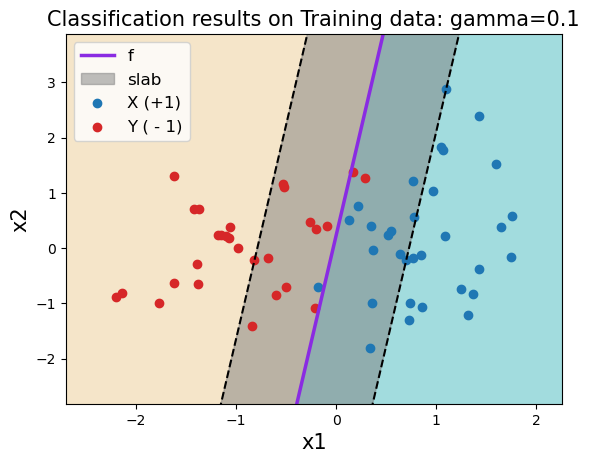

In [344]:
# define a SVM classifier, initialize with training data. 
svm_classifier = SVM(X_train=X_train_1, Y_train=Y_train_1)

# train the support vector classifier with a chosen value of gamma.
start = time.time()
svm_classifier.fit(gamma=0.1)
end = time.time()
print('Total training time of support vector classifier:', round((end-start)*1000, 2), 'ms')

# plot the training data points with the classifier f and the associated slab.
svm_classifier.plot_svm(X_train_1, Y_train_1, mode='Training')


Now that we have trained our SVM classifier, we can predict the class of an unseen data point !

For example, as we can see in the above figure, we can predict the point (1,1) which obviouly belongs to class +1 and (-2,-1) which belongs to class -1.

In [345]:
print('The class of the point(1,1) is', svm_classifier.predict(np.array([1,1])))
print('The class of the point(-2,-1) is', svm_classifier.predict(np.array([-2,-1])))

The class of the point(1,1) is 1
The class of the point(-2,-1) is -1


#### Part 2

We will use the test set to assess how good the classifier is on unseen data. To this end, we first define metrics which numerically quantifies how good or bad a classifier is. 

We want to evaluate the classifier's performance on unobserved data using the test set. To this end, we can define several metrics. The first thing that comes to mind is commonly the accuracy, which measures the percentage of correctly classified examples of all points in the test set. Nevertheless, although this might **NOT** be our case here, accuracy can be misleading if the classes are imbalanced. A case in point is that if we have a dataset where we have 98\% data in '+1' class thus only 2\% in '-1' class, a model that predicts all samples as the majority class will still have a high accuracy of 98%. This model, however, would be useless for predicting the minority group, which could be the class of interest. This model will be completely useless if we are diagnosing diseases for example. Though medical diagnoses typically have high dimensional data, we can think of it as a simple disease to classify which only needs few features and it has been processed by some dimensionality reduction techniques to 2D data. Therefore, other metrics such as precision, recall, F1-score, etc. can be used to evaluate the performance of a classifier when imbalanced data occurs.

Precision evaluates how accurately the model predicts positive samples. High precision indicates that it rarely makes false positive predictions. Recall measures how well the model identifies positive samples. High recall indicates that it rarely misses positive samples. The F1 score is a classification accuracy metric that combines precision and recall. It provides a good overall measure of a model's performance by balancing precision and recall. We can use all of these metrics to get a global, complete picture of a model's performance.

We can define the following abbreviations: 
TP: True Positive;
FP: False Positive;
TN: True Negative;
FN: False Negative;

The aforementioned metrics are defined in the following way:

$Accuracy=\frac{TN+TP}{TN+TP+FN+FP}$

$Precision=\frac{TP}{TP+FP}$

$Recall=\frac{TP}{TP+FN}$ (also known as sensitivity)

$F1\text{-}score=\frac{2(Precision\times Recall)}{Precision+Recall}$



Now that we have defined the evaluation metrics that we wish to use for all models that we will train later, it is meaningless to integrate the functions which display the confusion matrix and compute the evaluations results every time for each classifier object. We can simply define another class called **model_evaluator** as shown below that we will be using for evaluating all classifiers that we train.

In [7]:
class model_evaluator:
    
    def __init__(self, confusion_matrix):
        # Initialize with the calculated confusion matrix. 
        self.confmat = confusion_matrix

    def display_confusion_matrix(self, mode='test', classifier_name='SVM'):
        '''
        Function to show confusion matrix using only the matplotlib library.
            TN FP
            FN TP
        Arg:  mode: str, uses different color for displaying the confusion matrix on training / test set.
        '''
        # Display the confusion matrix. Use different colors for test / training set.
        plt.imshow(self.confmat, cmap=plt.cm.Blues) if mode=='test' else plt.imshow(self.confmat, cmap='OrRd')
        plt.colorbar()
        # Add labels to the plot.
        plt.xticks([0,1], ['-1', '+1'])
        plt.yticks([0,1], ['-1', '+1'])
        plt.title('Confusion Matrix of '+classifier_name+' Classifier', fontsize=15)
        plt.xlabel('Predicted class', fontsize=15)
        plt.ylabel('True class', fontsize=15)
        plt.grid(False)
        # Set the threshold value for font color to enhance visibility.
        threshold = (self.confmat.max() + self.confmat.min())/2
        # Add text to the cells
        for i in range(self.confmat.shape[0]):
            for j in range(self.confmat.shape[1]):
                # choose the right text color according to the background color.
                color = 'white' if self.confmat[i,j] > threshold else 'black'
                plt.text(j, i, self.confmat[i,j], horizontalalignment='center', verticalalignment='center', color=color, fontsize=15)
        # Show the plot
        plt.show()
    
    def eval(self, metric='accuracy', display=True):
        """
        Evaluate the performance of a classifier based on a confusion matrix and a given metric.
        Args:
            confmat: 2x2 array, the confusion matrix of the classifier
            mode: str, the metric to use, can be 'accuracy', 'precision', 'recall', or 'f1'
            display: bool, defines whether we display the results
        Output:
            The value of the selected metric.
        """
        # detect if the user entered a valid metric.
        if metric not in {'accuracy', 'precision', 'recall', 'f1'}:
            raise ValueError('Unknown metric: {}'.format(metric))
        # flatten the matrix into an array.
        tn, fp, fn, tp = self.confmat.ravel()
        # compute the result based on the selected metric.
        if metric == 'accuracy':
            result = (tp + tn) / (tp + fp + fn + tn)
        elif metric == 'precision':
            result = tp / (tp + fp)
        elif metric == 'recall':
            result = tp / (tp + fn)
        elif metric == 'f1':
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)
            result = 2 * precision * recall / (precision + recall)
        if display:
            print('{}: {:.2f}%'.format(metric.capitalize(), result * 100))
            
        return result

We can then plot the test points with the classifier and evaluate the model performance using the metrics we defined earlier.

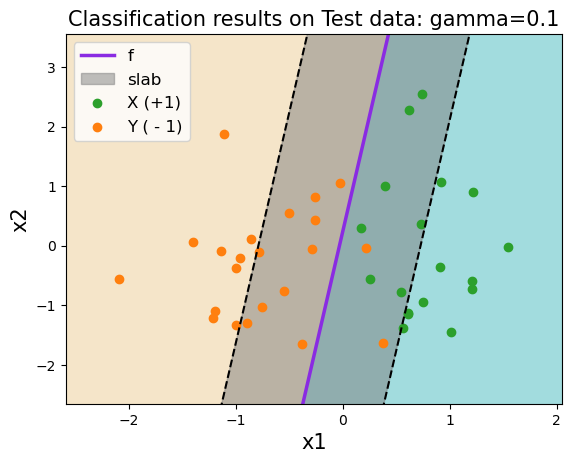

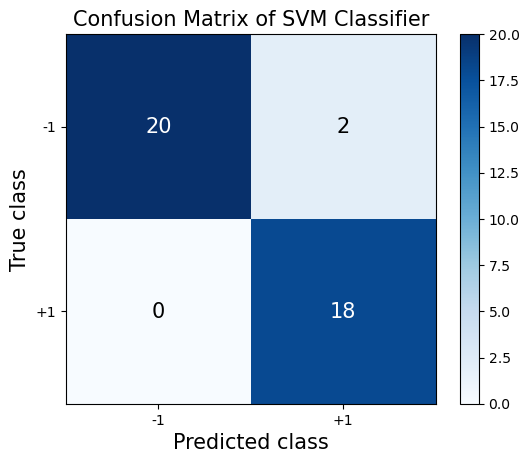

Performance evaluation results:
Accuracy: 95.00%
Precision: 90.00%
Recall: 100.00%
F1: 94.74%


In [347]:
# plot the test data points with the classifier f and the associated slab.
svm_classifier.plot_svm(X_test_1, Y_test_1, 'tab:green', 'tab:orange', mode='Test')
# (pre)evaluate the performance of the support vector classifier on the test set by generating the confusion matrix. 
pred_vals, true_vals = svm_classifier.predict_all(X_test=X_test_1, Y_test=Y_test_1)
# we can set 'show=False' since we are also displaying it in the next line of code. Nevertheless, this computes and displays the accuracy by default, if not defining other metrics.
confmat = svm_classifier.compute_confusion_matrix(true_vals, pred_vals, show=False) 

# initialize a model evaluator for the SVM classifier we just trained, using the confusion matrix obtained.
evaluator_svm = model_evaluator(confusion_matrix=confmat)
# display the confusion matrix.
evaluator_svm.display_confusion_matrix()
# choose a metric to evaluate performance.
print('Performance evaluation results:')
accuracy = evaluator_svm.eval('accuracy')
precision = evaluator_svm.eval('precision')
recall = evaluator_svm.eval('recall')
f1= evaluator_svm.eval('f1')

We observe that 95% of the predictions made by the classifier are correct, which is considered high accuracy. 

The 90% accuracy indicates that the classifier was 90% correct when predicting a positive class. The 100% recall rate means that the classifier was correct in identifying all positive classes in the data set. A high recall rate is important in situations where false negatives have a huge cost, such as in medical diagnoses, as mentioned earlier.

The F1 score of 94.7% indicates that the classifier performs well overall.

Since our dataset is fairly balanced, it is sufficient to choose accuracy as the only evaluation metric, which is also the case for the following exercises. We can also use all the other metrics mentioned above if we wish.


#### Part 3

We will discuss, with the help of figures, the role of the parameter $\gamma$ and find for which $\gamma$ (or $\gamma$'s) the classifier behaves best on the test set. 

We want to find the best $\gamma$ hyperparameter with which our model performs best. In general, we can apply K-fold cross-validation when we have a limited amount of data, but since we are only dealing with a 2D binary classification problem with a sufficient amount of data and we already have a separate training set and test set, K-fold cross-validation is not necessary and we can simply use a for loop on $\gamma$ to simplify the code and reduce runtime, otherwise we need to train the model k times on different combinations of training and validation sets by averaging the performance over the k runs in the case of K-fold cross-validation.

We can start by defining some values for gamma, for example ranging from 0.01 to 2:

In [348]:
gamma_range = np.linspace(0.01, 2, 50)

Then we can simply train a classifier on every single gamma and evaluate the performance. We directly use the given test set as the validation set for tuning. We keep track of the best gamma(s) giving the highest accuracy.

In [349]:
# Define a SVM classifier, initialize with training data. 
svm_classifier = SVM(X_train=X_train_1, Y_train=Y_train_1)

# Initialize variables to keep track of the best gamma and the highest accuracy.
best_gamma = 0
best_acc = 0
best_gamma_index = []

# Train the SVM on the training set varying gamma
start = time.time()
for i, g in enumerate(gamma_range):
    # Train
    svm_classifier.fit(gamma=g)
    # Evaluate the accuracy metric of the SVM model on the test set.
    pred_vals, true_vals = svm_classifier.predict_all(X_test=X_test_1, Y_test=Y_test_1)
    confmat = svm_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
    evaluator_svm = model_evaluator(confusion_matrix=confmat)
    acc = evaluator_svm.eval('accuracy', display=False)
    # Keep track of the best results and update the best gamma and accuracy.
    # N.B. Don't use one single >= condition otherwise the first gamma will always be appended even if it doesn't achieve highest acc.
    if acc > best_acc:
        best_gamma = g   
        best_acc = acc 
        best_gamma_index = [i]
    elif acc == best_acc:
        best_gamma_index.append(i)
end = time.time()

print('Total hyperparameter tuning time:', round((end-start)*1000, 2), 'ms \n')
print('The first gamma that achieves highest accuracy:', best_gamma, '\n')
print('Best hyperparameter gamma(s) within the defined gamma range [{} to {}]: \n'.format(gamma_range[0], gamma_range[-1]), gamma_range[best_gamma_index], '\n')
print('Highest accuracy achieved: {:.2f}%'.format(best_acc* 100))


Total hyperparameter tuning time: 292.07 ms 

The first gamma that achieves highest accuracy: 0.09122448979591836 

Best hyperparameter gamma(s) within the defined gamma range [0.01 to 2.0]: 
 [0.09122449 0.13183673 0.17244898 0.21306122 0.25367347 0.29428571
 0.33489796 0.3755102  0.41612245 0.45673469 0.49734694 0.53795918
 0.57857143 0.61918367 0.65979592 0.70040816] 

Highest accuracy achieved: 95.00%


As evidenced by the formulation of problem (1), the hyperparameter $\gamma$ controls the trade-off between the number of misclassifications and the slab width. Since we are minimizing the objective function (1), when we increase the gamma, we give more weighing to the second term which means we penalize more margin violations thus forcing the support vector classifier to have a smaller margin, where as a smaller $\gamma$ leads to a larger margin at the cost of more potential margin violations. 

From the experiment carried out above, we already know that dataset 1 can be separated using a linear classifier with a soft margin, achieving high accuracy. As long as $\gamma$ is around 0.1 to 0.7, we still get the same maximum accuracy of 95\%. Yet, we can still display the effect of $\gamma$ as shown below. 

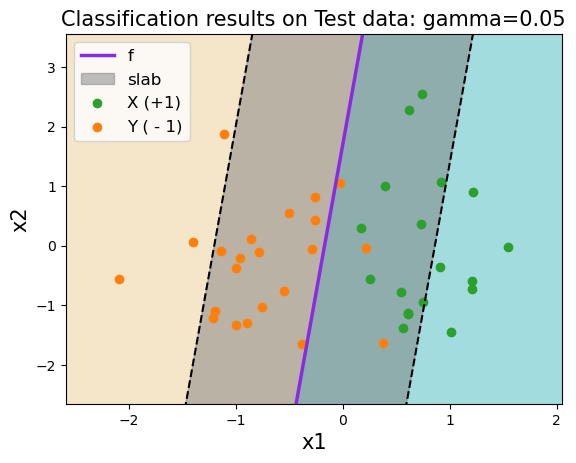

The Confusion Matrix: 
 [[19  3]
 [ 0 18]]
Accuracy = 92.50%


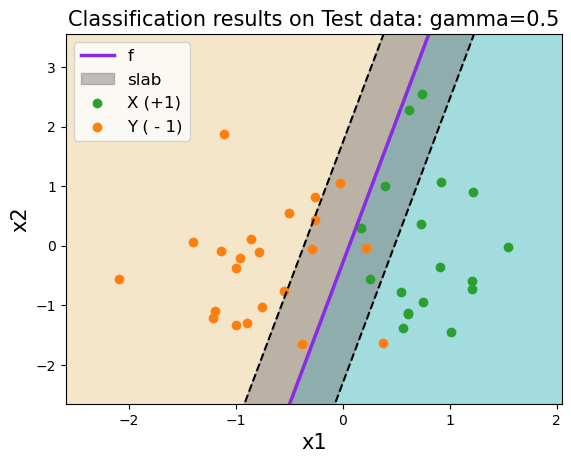

The Confusion Matrix: 
 [[20  2]
 [ 0 18]]
Accuracy = 95.00%


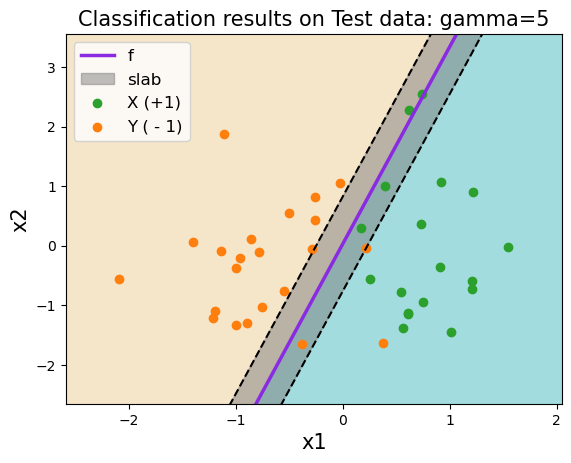

The Confusion Matrix: 
 [[19  3]
 [ 2 16]]
Accuracy = 87.50%


In [350]:
svm_classifier = SVM(X_train=X_train_1, Y_train=Y_train_1)
svm_classifier.fit(gamma=0.05)
svm_classifier.plot_svm(set_1=X_test_1, set_2=Y_test_1, colorX='tab:green', colorY='tab:orange', mode='Test')
pred_vals, true_vals = svm_classifier.predict_all(X_test=X_test_1, Y_test=Y_test_1)
# Let's just show the accuracy without bothering other metrics: set show=True.
svm_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=True)

svm_classifier.fit(gamma=0.5)
svm_classifier.plot_svm(set_1=X_test_1, set_2=Y_test_1, colorX='tab:green', colorY='tab:orange', mode='Test')
pred_vals, true_vals = svm_classifier.predict_all(X_test=X_test_1, Y_test=Y_test_1)
svm_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=True)

svm_classifier.fit(gamma=5)
svm_classifier.plot_svm(set_1=X_test_1, set_2=Y_test_1, colorX='tab:green', colorY='tab:orange', mode='Test')
pred_vals, true_vals = svm_classifier.predict_all(X_test=X_test_1, Y_test=Y_test_1)
confmat = svm_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=True);

The confusion matrix as defined earlier is in the form of $\begin{bmatrix} TN &FP \\ FN&TP \end{bmatrix}$ so we can also visually conclude that the results we are getting are correct. As we can see, when $\gamma$ is very small, e.g. 0.01,  the regularization term $\gamma(\mathbf{1}^{T}u + \mathbf{1}^{T}v)$ is less important in the objective function for the model, so the model may not be penalizing the misclassifications enough, leading to a simpler model which may not capture the complexity of the data, wider slab, and decreased accuracy.

On the contrary, when $\gamma$ = 5, the term $\gamma(\mathbf{1}^{T}u + \mathbf{1}^{T}v)$ in the objective function has dominating effect, making the classifier more sensitive to margin violations and we have a narrower slab. The model becomes prone to overfitting or being too sensitive to outliers. In this case we also have a lower test accuracy. 

By setting for example $\gamma$ = 0.5 which is in the optimal range we obtained during the hyperparameter tuning stage, the model balances the trade-off and therefore we have the highest accuracy achievable by the linear SVM classifier. 

#### Part 4

We now determine a linear classifier by approximating it via logistic modeling. We will compare and discuss the results with those obtained in parts 1. 2. and 3. 



We now determine a linear classifier by approximating it via logistic modeling. The idea is to determine the parameters $a$ and $b$ by maximum likelihood estimation. We can therefore solve the following convex optimization problem which minimizes the negative log-likelihood function $[1]$.


$$
\min_{a,b} \quad  -l(a,b) \tag{2}
$$
where
$$l(a,b) =  \sum_{i=1}^{N} (a^Tx_{i}-b) - \sum_{i=1}^{N}log(1+e^{a^Tx_{i}-b})- \sum_{i=1}^{M}log(1+e^{a^Ty_{i}-b}).$$

Like before, we implement a class called **logistic_modeling** which encapsulates all the necessary functions for training the classifier and evaluating the test performance.

In [34]:
class logistic_modeling:
    
    def __init__(self):
        # Define variables.
        self.a = cp.Variable(2)
        self.b = cp.Variable()

    def fit(self, X1_train, X2_train):
        '''
        Function to train the classifier.
        Arg     X1_train: training data belonging to class +1 
                X2_train: training data belonging to class -1 
        '''
        # Define the negative log-likelihood function.
        objective = cp.sum(-self.a @ X1_train.T + self.b) + cp.sum(cp.logistic(self.a @ X1_train.T - self.b)) \
        + cp.sum(cp.logistic((self.a @ X2_train.T) - self.b))
        # Define and solve the convex optimization problem.
        problem = cp.Problem(objective=cp.Minimize(objective), constraints=None)
        problem.solve()
    
    def predict(self, x):
        '''
        Function to predict which class a single data point x belongs to
        Arg     x: the data point to classify
        Output  the class predicted (+1 or -1)
        '''
        return np.sign(np.dot(self.a.value, x.T) - self.b.value).astype(int)
    
    def predict_all(self, X_test, Y_test):
        pred_X = np.sign(np.dot(self.a.value, X_test.T) - self.b.value).astype(int)
        pred_Y = np.sign(np.dot(self.a.value, Y_test.T) - self.b.value).astype(int)
        true_X = np.ones(X_test.shape[0]).astype(int)
        true_Y = -np.ones(Y_test.shape[0]).astype(int)
        # Concatenante two sets
        pred = np.concatenate((pred_X, pred_Y))
        true = np.concatenate((true_X, true_Y))
        # Convert '-1' to '0' for computing confusion matrix in a later stage
        pred[pred == -1] = 0
        true[true == -1] = 0
        return pred, true
    
    def plot_logistic(self, set_1, set_2, colorX='tab:blue', colorY='tab:red', mode='Training', shade=True):
        '''
        Function to plot the data points along with the trained SVM classifier with slab.
        Arg   set_1, set_2: The two sets of points to plot (training or test data).
              colorX, colorY: set the colors of the two sets to plot.
              mode: define whether it is training or testing data (for figure title).    
        '''
        # Define the range of x values
        X_set = np.concatenate((set_1, set_2))
        plt.xlim([X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5])
        plt.ylim([X_set[:, 1].min() - 1, X_set[:, 1].max() + 1])
        x = np.linspace(X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5)

        # Compute the hyperplane with slab
        y = (-self.a.value[0]/self.a.value[1]) * x + (self.b.value/self.a.value[1])
        y_up = y + 1/self.a.value[1]
        y_down = y - 1/self.a.value[1]
        # Plot the separation plane
        plt.plot(x, y, color='indigo', label='f')
        plt.plot(x, y_up, color='k', linestyle='--', linewidth=0.5)
        plt.plot(x, y_down, color='k', linestyle='--', linewidth=0.5)
        
        if shade:
            # Use two different colors to shade the area to which the two classes belong.
            # Generate grid of points and Set axis range
            h = 0.01
            xx, yy = np.meshgrid(np.arange(X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5, h), np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, h))
            Z = self.a.value[0] * xx + self.a.value[1] * yy - self.b.value
            from matplotlib.colors import ListedColormap
            light_cmap = ListedColormap(['#F5E5C9', '#A2DCDE'])
            Z[Z<=0] = -1; Z[Z>0] = 1
            plt.contourf(xx, yy, Z, levels=[-1,0,1], cmap=light_cmap)

        # Plot the slab.
        plt.fill_between(x, y_up, y_down, color='gray', alpha=0.5)
        
        # Plot the data points.
        plt.scatter(set_1[:, 0], set_1[:, 1], color=colorX, label='X (+1)')
        plt.scatter(set_2[:, 0], set_2[:, 1], color=colorY, label='Y ( - 1)')

        # Add axis labels and legend
        plt.title('Approximate linear discrimination via logistic modeling: '+mode+' set', fontsize=12)
        plt.xlabel('x1', fontsize=15)
        plt.ylabel('x2', fontsize=15)
        plt.legend(loc='best', fontsize=12)
        plt.show()

    def compute_confusion_matrix(self, true, pred, show=True):
        '''
        Function to calcualte the confusion matrix based on predictions and true labels of test data.
        arg     true, pred: test data's true and predicted labels.
        output  the confusion matrix.
        '''
        num_cls = len(np.unique(true))
        result = np.zeros((num_cls,num_cls))
        np.add.at(result, (true, pred), 1)
        confmat = result.astype('int')
        if show:
            print('The Confusion Matrix: \n', confmat)
            diagonal_sum = confmat.trace()
            sum_of_all_elements = confmat.sum()
            accuracy = diagonal_sum / sum_of_all_elements
            print('Accuracy = {:0.2f}%'.format(accuracy*100))
        return confmat

Let us first plot the training data points and the trained logistic classifier.

Total training time of logistic classifier: 14.44 ms


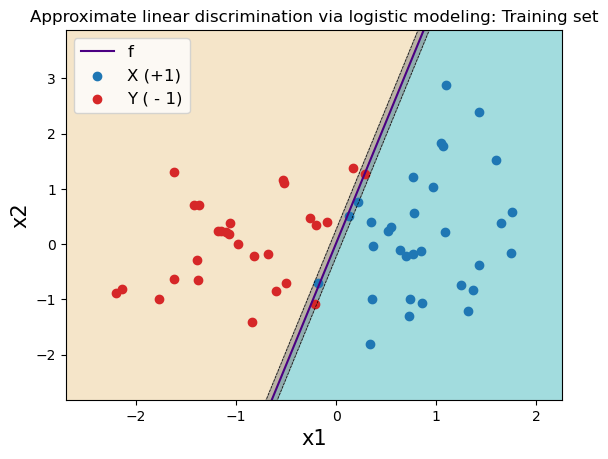

In [944]:
# Initialize a logistic classifier
logistic_classifier = logistic_modeling()

# train the classifier using our training dataset
start = time.time()
logistic_classifier.fit(X_train_1, Y_train_1)
end = time.time()
print('Total training time of logistic classifier:', round((end-start)*1000, 2), 'ms')

# plot the trained classifier along with training data points
logistic_classifier.plot_logistic(X_train_1, Y_train_1)

Then we can also predict unseen data points with the trained classifier, for example (2,3) and (0,1)

In [945]:
print('The class of the point(2,3) is', logistic_classifier.predict(np.array([2,3])))
print('The class of the point(0,1) is', logistic_classifier.predict(np.array([0,1])))

The class of the point(2,3) is 1
The class of the point(0,1) is -1


Let us now evaluate the performance of the logistic classifier based on the confusion matrix like before.

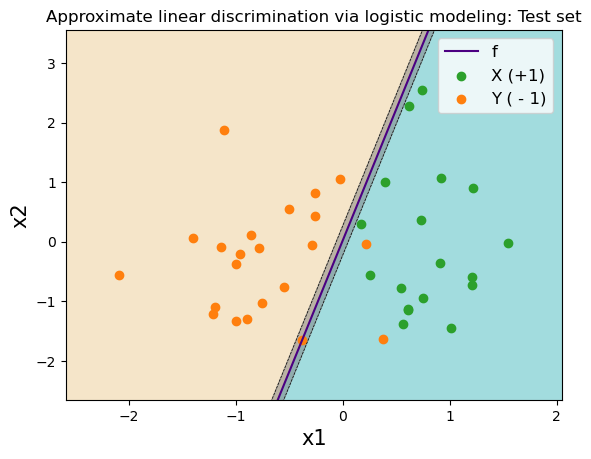

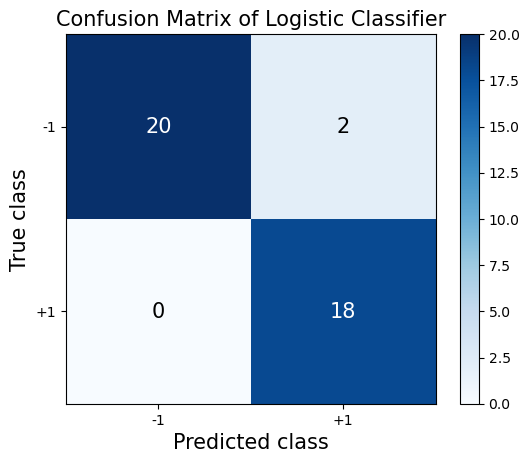

Performance evaluation results:
Accuracy: 95.00%
Precision: 90.00%
Recall: 100.00%
F1: 94.74%


In [946]:
# plot the test points with the trained classifier
logistic_classifier.plot_logistic(X_test_1, Y_test_1, colorX='tab:green', colorY='tab:orange', mode='Test')
# make predictions of all test points to generate confusion matrix
pred_vals, true_vals = logistic_classifier.predict_all(X_test=X_test_1, Y_test=Y_test_1)
confmat = logistic_classifier.compute_confusion_matrix(true_vals, pred_vals, show=False)

# define a model evaluator to evaluate classifier performance on test data.
evaluator_logistic = model_evaluator(confusion_matrix=confmat)
# display the confusion matrix.
evaluator_logistic.display_confusion_matrix(mode='test', classifier_name='Logistic')
# choose a metric to evaluate performance.
print('Performance evaluation results:')
accuracy = evaluator_logistic.eval('accuracy')
precision = evaluator_logistic.eval('precision')
recall = evaluator_logistic.eval('recall')
f1 = evaluator_logistic.eval('f1')


We observe that we obtained exactly the same performance as before, which suggests that the model with logistic modeling and the model with SVM with the optimal gamma value are comparable in terms of their predictive performance. The approach is fundamentally different: Logistic modeling is a probabilistic classification algorithm that models the probability of a binary outcome as a function of input features, whereas support vector classifier is an algorithm that is based on geometrical properties of the data and seeks the hyperplane that maximises separability between two classes.

Generally, the support vector classifier is more robust as it is less sensitive to outliers and has less risk of overfitting. We can control the trade-off between the number of misclassified points and the width of the slab with the hyperparameter $\gamma$. In addition, support vector classifier can generally handle more complex relationships between features. However, logistic modeling is more interpretable model as it is optimizing the weights $a_{0}, a_{1}$ of the classifier function e.g. $f(x) = a^{T}x-b = a_{0}x_{0} + a_{1}x_{1} - b$. The weights can be interpreted as the impact of each variable on the output. Support vector classifiers are less interpretable as we do not have a direct clear relationship between the features and the output. 

In our case, we have a low-dimensional dataset that is not imbalanced, and there is no difference in performance, especially since we are using a linear SVM without the kernel tricks used to develop non-linear SVM. Nonetheless, we printed the training time earlier: 8.72 ms for the support vector classifier and 15.57 ms for the logistic model, which could be due to the computation of exponential function or other factors. In the case of SVM, the training time is lower but we required additional steps to tune the hyperparameter $\gamma$. Based on our small dataset, it is difficult to say which model is superior, but both are performing admirably in our case.

#### Part 5

For dataset $2$, we determine a standard support vector classifier with $\gamma=0.1$. we plot the points, the classifier $f$ and the associated slab. We score the classifier on the test set using certain metrics. 


We now move on to dataset 2. We first train a standard support vector classifier with $\gamma$ = 0.1 and plot the data points, the trained classifier f and the associated slab as before.

Total training time of support vector classifier: 10.03 ms


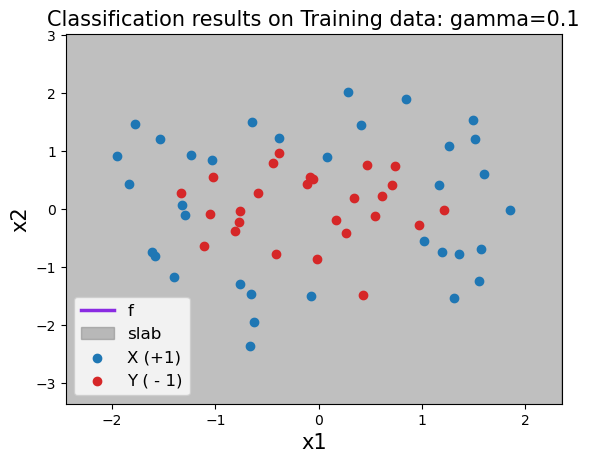

In [355]:
# Define a SVM classifier for dataset 2.
svm_classifier2 = SVM(X_train=X_train_2, Y_train=Y_train_2)
# Train the support vector classifier with gamma=0.1, as requsted.
start = time.time()
svm_classifier2.fit(gamma=0.1)
end = time.time()
print('Total training time of support vector classifier:', round((end-start)*1000, 2), 'ms')
# Plot the training data points with the classifier f and the associated slab.
svm_classifier2.plot_svm(X_train_2, Y_train_2, mode='Training', shade=False)

Then let us score our classifier on the test set.

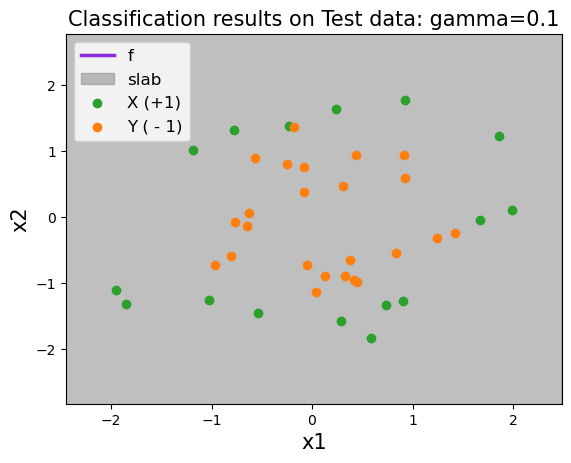

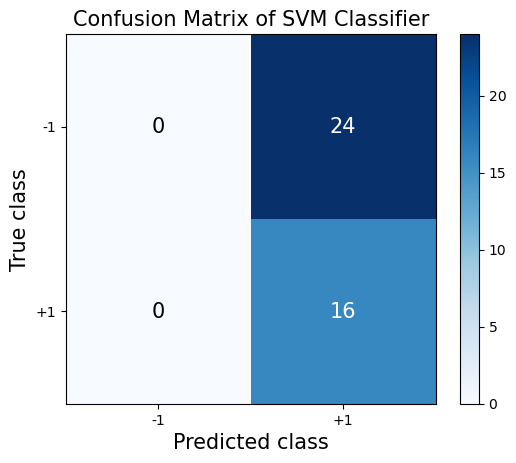

Performance evaluation results:
Accuracy: 40.00%
Precision: 40.00%
Recall: 100.00%
F1: 57.14%


In [356]:
# plot the test data points with the classifier f and the associated slab.
svm_classifier2.plot_svm(X_test_2, Y_test_2, 'tab:green', 'tab:orange', mode='Test', shade=False)
# (pre)evaluate the performance of the support vector classifier on the test set by generating the confusion matrix. 
pred_vals, true_vals = svm_classifier2.predict_all(X_test=X_test_2, Y_test=Y_test_2)
# we can set 'show=False' since we are also displaying it in the next line of code. Nevertheless, this computes and displays the accuracy by default, if not defining other metrics.
confmat2 = svm_classifier.compute_confusion_matrix(true_vals, pred_vals, show=False) 
# initialize a model evaluator for the SVM classifier we just trained, using the confusion matrix obtained.
evaluator_svm2 = model_evaluator(confusion_matrix=confmat2)
# display the confusion matrix.
evaluator_svm2.display_confusion_matrix()
# choose a metric to evaluate performance.
print('Performance evaluation results:')
accuracy = evaluator_svm2.eval('accuracy')
precision = evaluator_svm2.eval('precision')
recall = evaluator_svm2.eval('recall')
f1= evaluator_svm2.eval('f1')

We observe that the model is not able to classify the data, and that every data point in both classes is in the slab. This means that the data is not linearly separable. Unlike before, we found the possibility to separate the two classes with a soft-margin linear support vector classifier, this time the relation between the features and the classes is more complex and cannot be separated by a linear hyperplane, even with a soft-margin SVM. We require a non-linear classifier to capture the complex decision boundary for this dataset.

#### Part 6

We Implement nonlinear classifiers for dataset $2$. There are many options here. 

Since the soft-margin linear SVM did not work for dataset 2, we now implement nonlinear classifiers. Let us first discuss the approaches proposed in the textbook $[1]$: quadratic discrimination and polynomial discrimination before moving on to discussing other nonlinear approaches with more intuitions. 

***6.1. Quadratic discrimination***

We aim to find the classifier $f$: $f(x) = x^{T}Px+q^{T}x+r$ where $P \in \mathbf{S}^{n}, q \in \mathbf{R}^{n}, r \in \mathbf{R}$ thus the decision boundary is a quadratic surface, and the two regions are defined by quadratic inequalities. 

We can impose $P \prec 0 $ to have the separating surface ellipsoidal. We use homogeneity in $P$, $q$, $r$ to express the constraint $P \prec 0 $ as $P \preceq I$ and the problem can be formulated as $[1]$


$$
\begin{aligned}
\text{find} \quad & P, \ q, \ r \\
\text{s.t.} \quad & x_{i}^{T}Px_{i} + q^{T}x_{i} + r \geq 1, \quad i=1,\cdots,N \\
& y_{i}^{T}Py_{i} + q^{T}y_{i}+r \leq -1, \quad i=1,\cdots,M \\
& P \preceq I.
\end{aligned}
\tag{3}
$$

Of course the problem is not feasible as we have a non-linearly separable dataset. We can introduce a slack variable and then we can find a solution.

In [116]:
class quad_discrim():

    def __init__(self, X_train, Y_train, slack_var=3.62):
        self.X_train = X_train
        self.Y_train = Y_train
        self.slack_var = slack_var
        # Define variables and parameters
        self.P = cp.Variable((X_train.shape[1],X_train.shape[1]), symmetric=True)
        self.q = cp.Variable((X_train.shape[1]))
        self.r = cp.Variable()
    
    def fit(self):
        # Define objective function and constraints
        obj = cp.Minimize(0)
        constraints = [cp.diag(self.X_train @ self.P @ self.X_train.T) + self.q @ self.X_train.T + self.r >= 1 - self.slack_var,
                    cp.diag(self.Y_train @ self.P @ self.Y_train.T) + self.q @ self.Y_train.T + self.r <= -1 + self.slack_var,
                    self.P <= - np.eye(2)
                    ]
        # Solve problem
        prob = cp.Problem(obj, constraints)
        prob.solve()
        return self.P.value, self.q.value, self.r.value
    
    def plot_quad(self, set_1, set_2, colorX='tab:blue', colorY='tab:red', mode='Training'):
        from matplotlib.colors import ListedColormap
        light_cmap = ListedColormap(['#F5E5C9','#A2DCDE'])
        X_set = np.concatenate((set_1, set_2))
        x_lin = np.linspace(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1)
        y_lin = np.linspace(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1)
        xx, yy = np.meshgrid(x_lin, y_lin)
        X = np.vstack((xx.ravel(), yy.ravel())).T
        # Compute the value of f(x) for each point on the meshgrid
        f = -(np.diag(X @ self.P.value @ X.T) + self.q.value @ X.T + self.r.value)
        
        # Plot the points and the decision boundary
        plt.contour(xx, yy, f.reshape(xx.shape), levels=[0], colors='blueviolet')
        plt.contourf(xx, yy, f.reshape(xx.shape), levels=[-50,0,50], cmap=light_cmap)
        plt.scatter(set_1[:,0], set_1[:,1], color=colorX, label='X (+1)')
        plt.scatter(set_2[:,0], set_2[:,1], color=colorY, label='Y ( - 1)')
        plt.title('Quadratic discrimination on '+mode+' data', fontsize=15)
        plt.xlabel('x1', fontsize=15)
        plt.ylabel('x2', fontsize=15)
        plt.legend(loc='best', fontsize=12)
        plt.show()
    
    def predict(self, x):
        return -np.sign(x @ self.P.value @ x.T + self.q.value @ x.T + self.r.value)
    
    def predict_all(self, X_test, Y_test):
        # Take opposite sign for matching our convention of class +1 and -1.
        pred_X = -np.sign(np.diag(X_test @ self.P.value @ X_test.T) + self.q.value @ X_test.T + self.r.value).astype(int)
        pred_Y = -np.sign(np.diag(Y_test @ self.P.value @ Y_test.T) + self.q.value @ Y_test.T + self.r.value).astype(int)
        true_X = np.ones(X_test.shape[0]).astype(int)
        true_Y = -np.ones(Y_test.shape[0]).astype(int)
        # Concatenante two sets
        true = np.concatenate((true_X, true_Y))
        pred = np.concatenate((pred_X, pred_Y))
        # Convert '-1' to '0' for computing confusion matrix in a later stage
        pred[pred == -1] = 0
        true[true == -1] = 0
        return pred, true

    def compute_confusion_matrix(self, true, pred, show=True):
        '''
        Function to calcualte the confusion matrix based on predictions and true labels of test data.
        arg     true, pred: test data's true and predicted labels.
        output  the confusion matrix.
        '''
        num_cls = len(np.unique(true))
        result = np.zeros((num_cls,num_cls))
        np.add.at(result, (true, pred), 1)
        confmat = result.astype('int')
        if show:
            print('The Confusion Matrix: \n', confmat)
            diagonal_sum = confmat.trace()
            sum_of_all_elements = confmat.sum()
            accuracy = diagonal_sum / sum_of_all_elements
            print('Accuracy = {:0.2f}%'.format(accuracy*100))
        return confmat

We train the classifier and plot the training and test data:

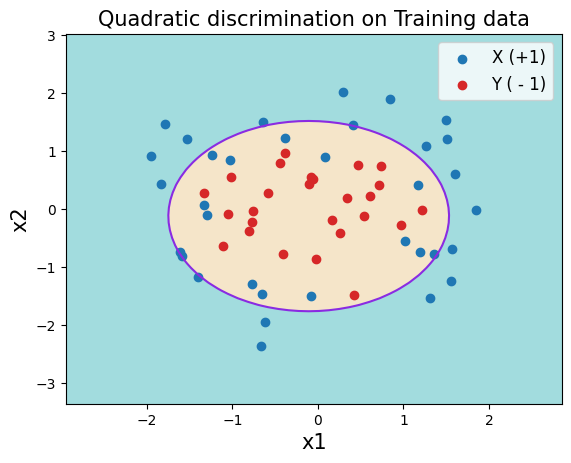

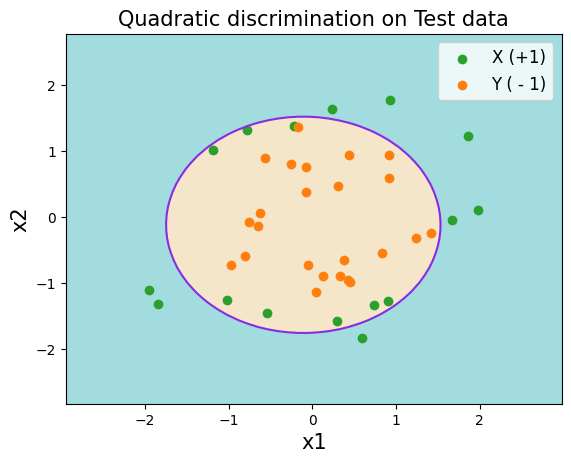

In [121]:
quad_classifier = quad_discrim(X_train=X_train_2, Y_train=Y_train_2)
quad_classifier.fit()
quad_classifier.plot_quad(set_1=X_train_2, set_2=Y_train_2)
quad_classifier.plot_quad(set_1=X_test_2, set_2=Y_test_2, colorX='tab:green', colorY='tab:orange', mode='Test')

We the evaluate the performance of the classifier using the accuracy metric:

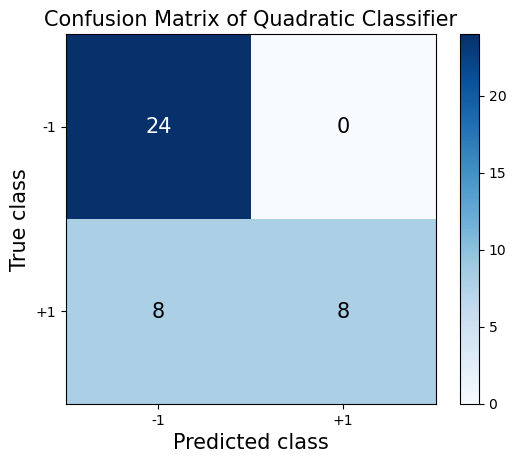

Accuracy: 80.00%


In [286]:
pred_vals, true_vals = quad_classifier.predict_all(X_test=X_test_2, Y_test=Y_test_2)
cm = quad_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
quad_evaluator = model_evaluator(confusion_matrix=cm)
quad_evaluator.display_confusion_matrix(mode='test', classifier_name='Quadratic')
accuracy = quad_evaluator.eval('accuracy');

We are now able to separate the two classes with the approach of quadratic discrimination which learned a nonlinear separating surface. However, the accuracy is only 80\% and it is relatively low, especially when compared to the previous exercises when we were dealing with dataset 1. 

The model assumes that the decision boundary is quadratic and is relatively simple since it might not capture well the nonlinearity between the features. Let us move on to polynomial discrimination which has more flexibility to fit more intricate nonlinear decision boundaries because it introduces higher order polynomial terms.  

***6.2. Polynomial discrimination***

We now consider $f(x) = \sum_{i_{1}+...+i_{n}\leq d} a_{i_{1}...i_{n}} x_{1}^{i_{1}}...x_{n}^{i_{n}}$ and determine whether two sets can be discriminated by this polynomial by solving a set of linear inequalities in  $a_{i_{1}...i_{n}}$. 

The idea is similar to performing a nonlinear transformation on the data into a new feature space where the data could become much more linearly separable, of which the intuition and concept will be explained and discussed later in this notebook.

To this end, we can first transpose the data matrices so that samples are now columns. Inspired by Joelle Skaf's matlab code on CVXR $[3]$, we can then apply polynomial transformation by constructing the Vandermonde-style monomial matrix in the following way: 
$$
\begin{bmatrix}
1 & x_{1} & x_{1}^{2} & \dots &x_{1}^{n-1} \\ 
1 & x_{2} & x_{2}^{2} & \dots &x_{2}^{n-1} \\ 
1 & x_{3} & x_{3}^{2} & \dots &x_{3}^{n-1} \\
\vdots & \vdots & \vdots &\ddots&\vdots \\ 
1 & x_{m} & x_{m}^{2} & \dots &x_{m}^{n-1}
\end{bmatrix}
\tag{4}
$$

We can then train the classifier by formulating the optimization problem as follows

$$
\begin{aligned}
\min_{} \quad & t \\
\text{s.t.} \quad & P(x_{i}) \leq t, \quad i=1,\cdots,N \\
& P(y_{i}) \geq t, \quad i=1,\cdots,M \\
\end{aligned}
\tag{5}
$$

Where $P$ is the n-order polynomial.

In [313]:
class poly_discrim():

    def __init__(self, X_train, Y_train, order):

        # First transpose the data matrices to make data samples as columns.
        self.X_train = np.transpose(X_train)
        self.Y_train = np.transpose(Y_train)

        self.order = order
        if self.order not in {2, 3, 4, 5}:
            raise ValueError('Unsupported polynomial order!')
        
        N = self.X_train.shape[1] # N is the number of data samples in class +1 
        M = self.Y_train.shape[1] # M is the number of data samples in class -1

        # Construct Vandermonde-style monomial matrices
        col_dict = {2:6, 3:10, 4:15, 5:21}
        col = col_dict.get(self.order, None) # retrive the corresponding value if self.order is valid.
        if self.order == 5:
            p1 = np.array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5]).reshape(col, 1)
            p2 = np.array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5]).reshape(col, 1) - p1
        elif self.order == 4:
            p1 = np.array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4]).reshape(col, 1)
            p2 = np.array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4]).reshape(col, 1) - p1
        elif self.order == 3:
            p1 = np.array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3]).reshape(col, 1)
            p2 = np.array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3]).reshape(col, 1) - p1
        elif self.order == 2:
            p1 = np.array([0, 0, 1, 0, 1, 2]).reshape(col, 1)
            p2 = np.array([0, 1, 1, 2, 2, 2]).reshape(col, 1) - p1

        npoly = len(p1)
        op = np.ones((npoly, 1))
        # Construct the data matrix after transformation
        Xr0 = np.repeat(self.X_train[0,:].reshape(1, N), repeats=col, axis=0)
        Xr1 = np.repeat(self.X_train[1,:].reshape(1, N), repeats=col, axis=0)
        p1xr = np.repeat(p1, repeats=N, axis=1)
        p2xr = np.repeat(p2, repeats=N, axis=1)
        self.monX = np.multiply(np.power(Xr0, p1xr), np.power(Xr1, p2xr))
        Yr0 = np.repeat(self.Y_train[0,:].reshape(1, M), repeats=col, axis=0)
        Yr1 = np.repeat(self.Y_train[1,:].reshape(1, M), repeats=col, axis=0)
        p1yr = np.repeat(p1, repeats=M, axis=1)
        p2yr = np.repeat(p2, repeats=M, axis=1)
        self.monY = np.multiply(np.power(Yr0, p1yr), np.power(Yr1, p2yr))

        # Define optimization variables.
        self.a = cp.Variable((npoly,1))
        self.t = cp.Variable()

    def fit(self, reg=0):
        '''
        Function to train the classifier.
        Arg:    reg: regularization term.
        '''
        # Define constraints.
        constr = [self.a.T @ self.monX <= self.t,
                  self.a.T @ self.monY >= -self.t,
                  cp.norm(self.a) <= 1
                  ]
        # Define the optimization problem.
        prob = cp.Problem(objective=cp.Minimize(self.t + reg*cp.norm(self.a)), constraints=constr)
        prob.solve()
        return prob.status
    
    def fit_2(self, reg=0):
        # Define constraints.
        constr = [self.a.T @ self.monX <= reg*self.t,
                  self.a.T @ self.monY >= -reg*self.t,
                  cp.norm(self.a) <= 1
                  ]
        # Define the optimization problem.
        prob = cp.Problem(objective=cp.Minimize(0), constraints=constr)
        prob.solve()
    
    def predict(self, x):
        '''
        Function to predict which class a single data point x belongs to
        (Instead of writing the function again, use the plot function to simply code.)
        Arg     x: the data point to classify
        Output  the class predicted (+1 or -1)
        '''
        return np.sign(-self.get_decision_boundary(x1=x[0], x2=x[1]))
    
    def predict_net(self, x):
        return -self.get_decision_boundary(x1=x[0], x2=x[1])
    
    def predict_all(self, X_test, Y_test):
        '''
        Function to predict all test points using the trained classifier.
        Arg:    X_test: test set which contains class +1
                Y_test: test set which contains class -1
        Output: pred: predicted values using test set
                true: the true labels of test set
        '''
        # Take opposite sign for matching our convention of class +1 and -1.
        pred_X = np.sign(-self.get_decision_boundary(x1=X_test[:, 0], x2=X_test[:, 1])).astype(int)
        pred_Y = np.sign(-self.get_decision_boundary(x1=Y_test[:, 0], x2=Y_test[:, 1])).astype(int)
        true_X = np.ones(X_test.shape[0]).astype(int)
        true_Y = -np.ones(Y_test.shape[0]).astype(int)
        # Concatenante two sets
        true = np.concatenate((true_X, true_Y))
        pred = np.concatenate((pred_X, pred_Y))
        # Convert '-1' to '0' for computing confusion matrix in a later stage
        pred[pred == -1] = 0
        true[true == -1] = 0
        return pred, true
    
    def compute_confusion_matrix(self, true, pred, show=True):
        '''
        Function to calcualte the confusion matrix based on predictions and true labels of test data.
        arg     true, pred: test data's true and predicted labels.
        output  the confusion matrix.
        '''
        num_cls = len(np.unique(true))
        result = np.zeros((num_cls,num_cls))
        np.add.at(result, (true, pred), 1)
        confmat = result.astype('int')
        if show:
            print('The Confusion Matrix: \n', confmat)
            diagonal_sum = confmat.trace()
            sum_of_all_elements = confmat.sum()
            accuracy = diagonal_sum / sum_of_all_elements
            print('Accuracy = {:0.2f}%'.format(accuracy*100))
        return confmat
    
    def get_decision_boundary(self, x1, x2):
        '''
        Function to fetch the decision boundary given data point
        Arg:    x1, x2: components of a data point x
        Output: class decision of the point.
        '''
        if self.order == 4: # DEGREE 4
            return (self.a.value[0] + self.a.value[1]*x2 + self.a.value[2]*x1 + self.a.value[3]*x2**2 + self.a.value[4]*x1*x2 + self.a.value[5]*x1**2 
                    + self.a.value[6]*x2**3 + self.a.value[7]*x2**2*x1 + self.a.value[8]*x2*x1**2 + self.a.value[9]*x1**3 
                    + self.a.value[10]*x2**4 + self.a.value[11]*x2**3*x1 + self.a.value[12]*x1**2*x2**2 + self.a.value[13]*x2*x1**3 + self.a.value[14]*x1**4)
        elif self.order == 3: # DEGREE 3
            return (self.a.value[0] + self.a.value[1]*x2 + self.a.value[2]*x1 + self.a.value[3]*x2**2 + self.a.value[4]*x1*x2 + self.a.value[5]*x1**2 
            + self.a.value[6]*x2**3 + self.a.value[7]*x2**2*x1 + self.a.value[8]*x2*x1**2 + self.a.value[9]*x1**3)
        elif self.order == 2: # DEGREE 2 
            return (self.a.value[0] + self.a.value[1]*x2 + self.a.value[2]*x1 + self.a.value[3]*x2**2 + self.a.value[4]*x1*x2 + self.a.value[5]*x1**2)
        elif self.order == 5: # DEGREE 5
            return (self.a.value[0] + self.a.value[1]*x2 + self.a.value[2]*x1 + self.a.value[3]*x2**2 + self.a.value[4]*x1*x2 + self.a.value[5]*x1**2 
            + self.a.value[6]*x2**3 + self.a.value[7]*x2**2*x1 + self.a.value[8]*x2*x1**2 + self.a.value[9]*x1**3 
            + self.a.value[10]*x2**4 + self.a.value[11]*x2**3*x1 + self.a.value[12]*x2**2*x1**2 + self.a.value[13]*x2*x1**3 + self.a.value[14]*x1**4 
            + self.a.value[15]*x2**5 + self.a.value[16]*x2**4*x1 + self.a.value[17]*x2**3*x1**2 + self.a.value[18]*x2**2*x1**3 + self.a.value[19]*x2*x1**4 + self.a.value[20]*x1**5)

    def plot_decision_boundary(self, X, Y, color='training'):
        '''
        Function to plot the data points along with the trained SVM classifier with slab.
        Arg   X, Y: The two sets of points to plot (training or test data).
              color: Differentiate colors for training and test points (also used for figure title).    
        '''
        from matplotlib.colors import ListedColormap
        light_cmap = ListedColormap(['#F5E5C9', '#A2DCDE'])
        # Generate a grid of points to plot the decision boundary
        X_concat = np.concatenate((X, Y), axis=1)
        x1_min, x1_max = X_concat[0, :].min() - 0.5, X_concat[0, :].max() + 0.5
        x2_min, x2_max = X_concat[1, :].min() - 0.5, X_concat[1, :].max() + 0.5
        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 2000), np.linspace(x2_min, x2_max, 2000))
        zz = -self.get_decision_boundary(x1=xx1.ravel(), x2=xx2.ravel())
        zz = zz.reshape(xx1.shape)
        # Plot the decision boundary
        if color not in {'training', 'Training', 'test', 'Test'}:
            raise ValueError('Unknown color: {}'.format(color))
        if color == 'training':
            plt.contour(xx1, xx2, zz, levels=[0], colors='tab:olive')
            plt.contourf(xx1, xx2, zz, levels=[-100,0,100], cmap=light_cmap)
            plt.scatter(X[0, :], X[1, :], color='tab:blue', label='X (+1)')
            plt.scatter(Y[0, :], Y[1, :], color='tab:red', label='Y ( - 1)')
        elif color == 'test':
            plt.contour(xx1, xx2, zz, levels=[0], colors='tab:pink')
            plt.contourf(xx1, xx2, zz, levels=[-100,0,100], cmap=light_cmap)
            plt.scatter(X[0, :], X[1, :], color='tab:green', label='X (+1)')
            plt.scatter(Y[0, :], Y[1, :], color='tab:orange', label='Y ( - 1)')
        plt.title('Polynomial discrimination order '+str(self.order)+' on '+color+' data', fontsize=11)
        plt.xlabel('x1', fontsize=13)
        plt.ylabel('x2', fontsize=13)
        plt.legend(loc='best', fontsize=12)
        plt.show()
        plt.show()

We just created a polynomial discriminator with different possible orders. We only included orders from 2 to 5, there is no need to go any higher as we know that it will definitely start overfitting for such a simple dataset. 

We can change the order by specifying the argument 'order' when initializing the classifier. Let us train the classifier for different polynomial orders.

Let us first pick a simpler model, e.g. 2nd order.

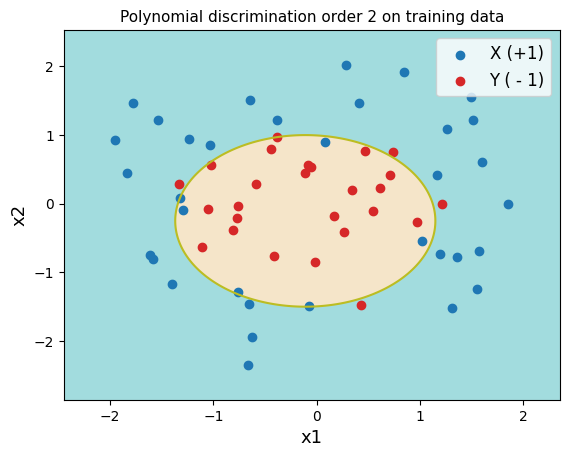

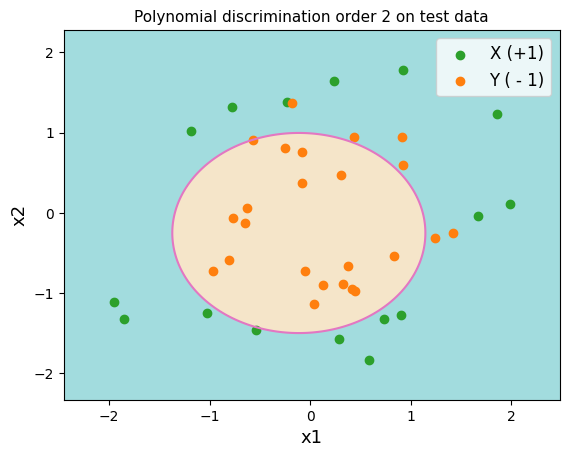

In [320]:
poly_classifier = poly_discrim(X_train=X_train_2, Y_train=Y_train_2, order=2) 
poly_classifier.fit()
poly_classifier.plot_decision_boundary(X=X_train_2.T, Y=Y_train_2.T) # Dont forget to transpose given how we wrote the poly_discrim class.
poly_classifier.plot_decision_boundary(X=X_test_2.T, Y=Y_test_2.T, color='test')

Since the polynomial discriminator is prone to overfitting as the model order gets higher, we can display both the training and test confusion matrix for all tested orders.

--------------- Eval: Training set ---------------


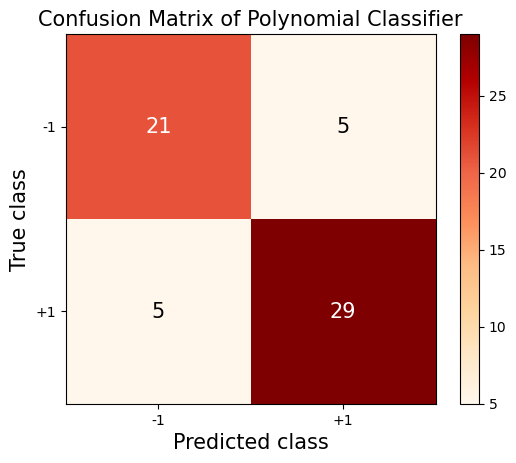

Accuracy: 83.33%
----------------- Eval: Test set -----------------


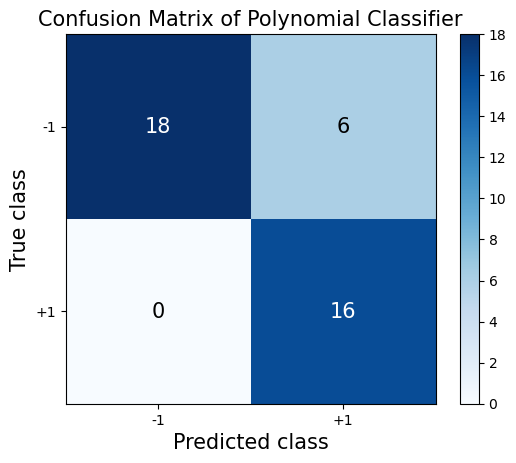

Accuracy: 85.00%


In [146]:
# Evaluation on training set
print('--------------- Eval: Training set ---------------')
pred_vals, true_vals = poly_classifier.predict_all(X_test=X_train_2, Y_test=Y_train_2)
cm = poly_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
poly_evaluator = model_evaluator(confusion_matrix=cm)
poly_evaluator.display_confusion_matrix(mode='Training', classifier_name='Polynomial')
poly_evaluator.eval('accuracy')

# Evaluation on test set
print('----------------- Eval: Test set -----------------')
pred_vals, true_vals = poly_classifier.predict_all(X_test=X_test_2, Y_test=Y_test_2)
cm = poly_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
poly_evaluator = model_evaluator(confusion_matrix=cm)
poly_evaluator.display_confusion_matrix(mode='test', classifier_name='Polynomial')
poly_evaluator.eval('accuracy');

If we pick higher order, e.g. order 4, the model starts to overfit very quickly, as shown by the figure below. There is no doubt that the training accuracy will increase (in this case from 83.33\% to 100\% !) and the test accuracy will decrease (from 85\% to 77.5\% here). Of course for even higher order models the performance will be worse because overfitting is already severe. 

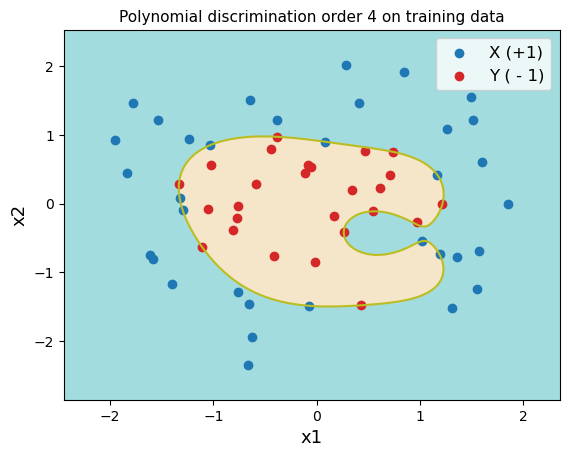

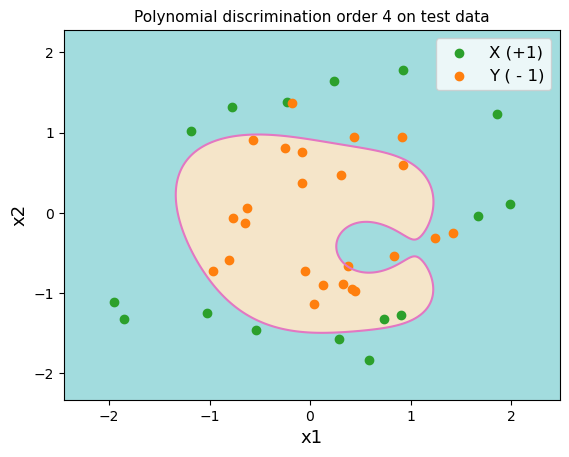

--------------- Eval: Training set ---------------


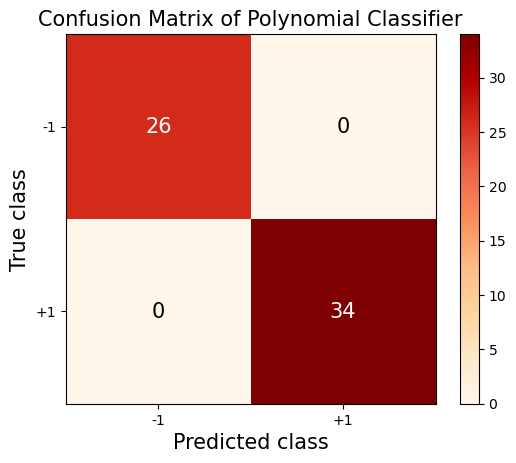

Accuracy: 100.00%
----------------- Eval: Test set -----------------


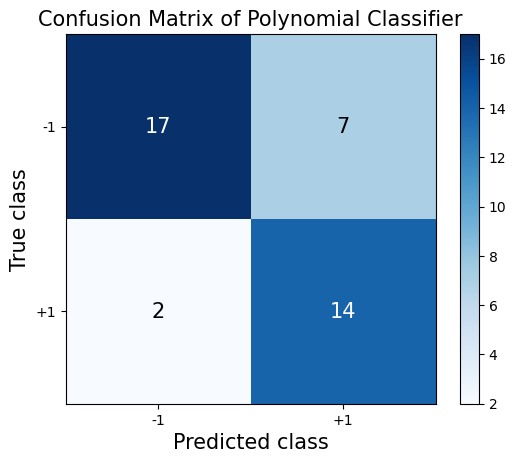

Accuracy: 77.50%


In [192]:
poly_classifier = poly_discrim(X_train=X_train_2, Y_train=Y_train_2, order=4) 
poly_classifier.fit()
poly_classifier.plot_decision_boundary(X=X_train_2.T, Y=Y_train_2.T) # Dont forget to transpose given how we wrote the poly_discrim class.
poly_classifier.plot_decision_boundary(X=X_test_2.T, Y=Y_test_2.T, color='test')
# Evaluation on training set
print('--------------- Eval: Training set ---------------')
pred_vals, true_vals = poly_classifier.predict_all(X_test=X_train_2, Y_test=Y_train_2)
cm = poly_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
poly_evaluator = model_evaluator(confusion_matrix=cm)
poly_evaluator.display_confusion_matrix(mode='Training', classifier_name='Polynomial')
poly_evaluator.eval('accuracy')
# Evaluation on test set
print('----------------- Eval: Test set -----------------')
pred_vals, true_vals = poly_classifier.predict_all(X_test=X_test_2, Y_test=Y_test_2)
cm = poly_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
poly_evaluator = model_evaluator(confusion_matrix=cm)
poly_evaluator.display_confusion_matrix(mode='test', classifier_name='Polynomial')
poly_evaluator.eval('accuracy');

To address this issue, we add a regularization term to the objective function. By keeping the order 4 and activating regularization, we can see that our model has been improved.

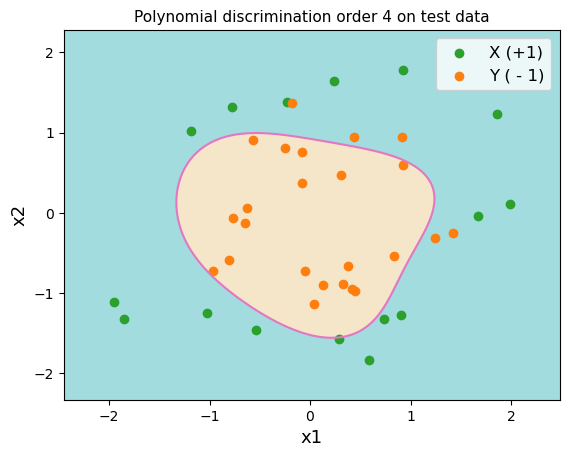

--------------- Eval: Training set ---------------


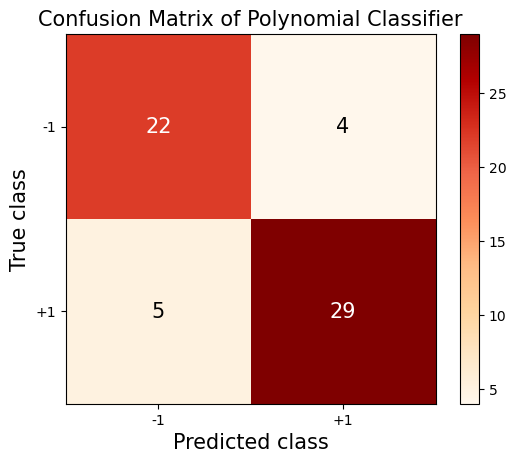

Accuracy: 85.00%
----------------- Eval: Test set -----------------


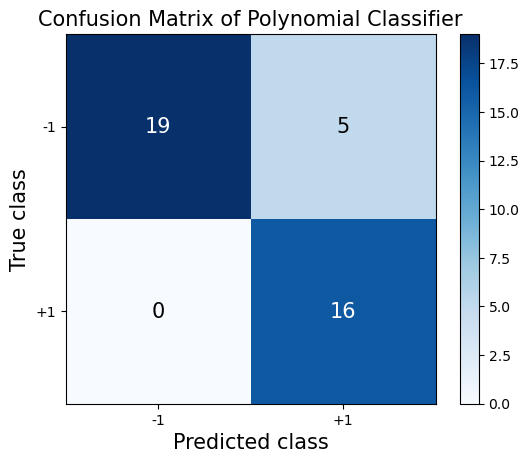

Accuracy: 87.50%


In [189]:
poly_classifier = poly_discrim(X_train=X_train_2, Y_train=Y_train_2, order=4) 
poly_classifier.fit(reg=0.18)
poly_classifier.plot_decision_boundary(X=X_test_2.T, Y=Y_test_2.T, color='test') # Dont forget to transpose given how we wrote the poly_discrim class.
# Evaluation on training set
print('--------------- Eval: Training set ---------------')
pred_vals, true_vals = poly_classifier.predict_all(X_test=X_train_2, Y_test=Y_train_2)
cm = poly_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
poly_evaluator = model_evaluator(confusion_matrix=cm)
poly_evaluator.display_confusion_matrix(mode='Training', classifier_name='Polynomial')
poly_evaluator.eval('accuracy')

# Evaluation on test set
print('----------------- Eval: Test set -----------------')
pred_vals, true_vals = poly_classifier.predict_all(X_test=X_test_2, Y_test=Y_test_2)
cm = poly_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
poly_evaluator = model_evaluator(confusion_matrix=cm)
poly_evaluator.display_confusion_matrix(mode='test', classifier_name='Polynomial')
poly_evaluator.eval('accuracy');

To know the best polynomial order and the regularization term, we can simply write two nested 'for' loops which has the same effect as grid search. 

In [178]:
best_acc = 0
best_order = None
best_reg = None

orders = [2, 3, 4, 5]
regs = np.linspace(0.01, 7, 500)

start = time.time()
for order in orders:
    for reg in regs:
        poly_classifier = poly_discrim(X_train=X_train_2, Y_train=Y_train_2, order=order) 
        poly_classifier.fit(reg=reg)

        pred_vals, true_vals = poly_classifier.predict_all(X_test=X_test_2, Y_test=Y_test_2)
        cm = poly_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
        poly_evaluator = model_evaluator(confusion_matrix=cm)
        test_acc = poly_evaluator.eval('accuracy', display=False)

        if test_acc > best_acc:
            best_acc = test_acc
            best_order = order
            best_reg = reg
end = time.time()

print(f"Hyperparameter tuning time: {end-start:.2f} s")
print(f"Best test accuracy: {best_acc:.4f}")
print(f"Best order: {best_order}")
print(f"Best regularization term: {best_reg:.4f}")

Hyperparameter tuning time: 12.96 s
Best test accuracy: 0.9250
Best order: 2
Best regularization term: 0.8505


We can also apply the bisection algorithm but it seems unnecessary since we have already obtained the best order.

In [321]:
u = 5
l = 2
while u-l > 1e-5:
    order = np.floor((u+l)/2)
    poly_classifier = poly_discrim(X_train=X_train_2, Y_train=Y_train_2, order=order) 
    status = poly_classifier.fit()
    if status == 'optimal':
      u = order 
    else: 
      l = order
print('Best order:', order)

Best order: 2.0


Now that we are aware that order 2 with regularization term equal to 0.85 yields the best test accuracy, we can pick these two values and see if it is what we anticipated.

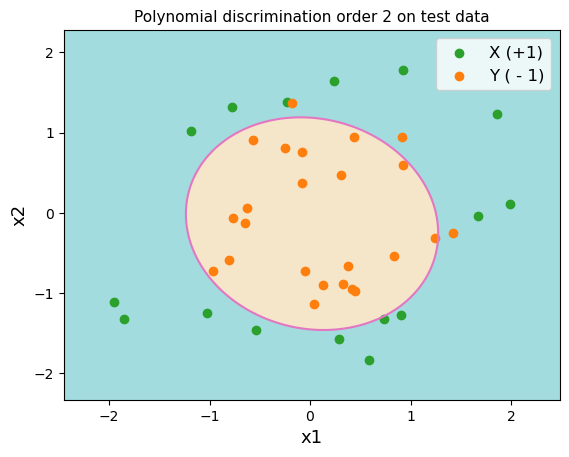

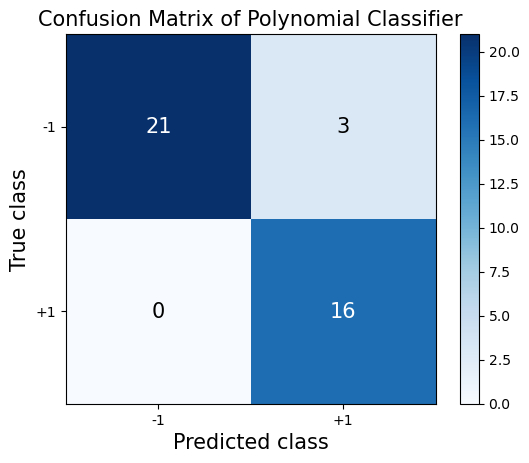

Accuracy: 92.50%


In [179]:
poly_classifier = poly_discrim(X_train=X_train_2, Y_train=Y_train_2, order=2) 
poly_classifier.fit(reg=0.85)
poly_classifier.plot_decision_boundary(X=X_test_2.T, Y=Y_test_2.T, color='test') # Dont forget to transpose given how we wrote the poly_discrim class.

pred_vals, true_vals = poly_classifier.predict_all(X_test=X_test_2, Y_test=Y_test_2)
cm = poly_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
poly_evaluator = model_evaluator(confusion_matrix=cm)
poly_evaluator.display_confusion_matrix(mode='test', classifier_name='Polynomial')
test_acc = poly_evaluator.eval('accuracy');

Apparently, by tuning and selecting the best model order and the regularization term, we have trained the best model achievable with polynomial discrimination with only 3 misclassified points, and a test accuracy of 92.5\%. 

***6.3. Other approaches***

We can now discuss other approaches to solving the problem. As before, we seek to find a nonlinear function $f$. $f$ is linear/affine in the parameters that define it, so we can also think of it as performing a nonlinear transformation on the original features into a representation/feature space where the data will become much more linearly separable in that space. The function(hyperplane) is linear in the feature space but it is obvious that the function will look nonlinear when we plot it in the original space.

For instance, consider the following transform: $(x_{1},x_{2}) \stackrel{\phi}{\longrightarrow} (x_{1}^{2}, \sqrt 2 x_{1}x_{2}, x_{2}^{2})$. We can write the following simple code just to visualize the data which is now in 3D, by applying this transformation. 


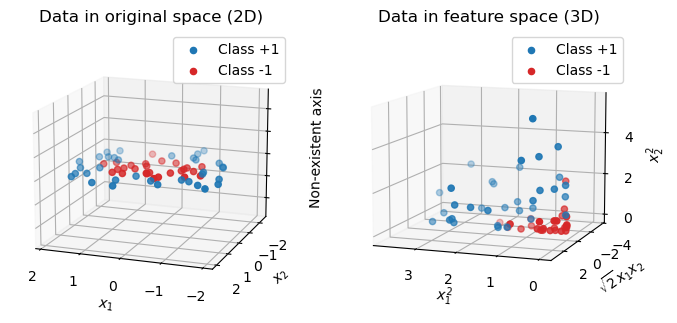

In [824]:
# Define the nonlinear transformation phi
def phi(x):
    return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])

# Apply the nonlinear transformation to the data (nl means nonlinear)
X_nl = np.apply_along_axis(phi, axis=1, arr=X_train_2)
Y_nl = np.apply_along_axis(phi, axis=1, arr=Y_train_2)

# Create a subplot 
fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw={'projection': '3d'}, figsize=(8,4))
# Plot original data in first subplot
ax1.scatter(X_train_2[:,0], X_train_2[:,1], c='tab:blue', label='Class +1')
ax1.scatter(Y_train_2[:,0], Y_train_2[:,1], c='tab:red', label='Class -1')
ax1.set_xlabel('$x_{1}$')
ax1.set_ylabel('$x_{2}$')
ax1.set_zlabel('Non-existent axis')
ax1.zaxis.set_ticklabels([])
ax1.view_init(elev=15, azim=110) # adjust view angle
ax1.set_title('Data in original space (2D)')
ax1.legend()
# Plot transformed data in second subplot
ax2.scatter(X_nl[:,0], X_nl[:,1], X_nl[:,2], c='tab:blue', label='Class +1')
ax2.scatter(Y_nl[:,0], Y_nl[:,1], Y_nl[:,2], c='tab:red', label='Class -1')
ax2.set_xlabel('$x_{1}^{2}$')
ax2.set_ylabel('$\sqrt{2} x_{1} x_{2}$')
ax2.set_zlabel('$x_{2}^{2}$')
ax2.view_init(elev=10, azim=110) # adjust view angle
ax2.set_title('Data in feature space (3D)')
ax2.legend()
plt.show()

We observe that the original data in 2D space are clearly not linearly separable. However, after applying a nonlinear transformation to our data, it is conspicuous that there has to be a linear hyperplane that can better separate the two classes, as shown in the second figure in the graph above.

Notice that we only gave the intuition of the nonlinear transformation by giving an example of transforming it into a 3D space because, as human beings, we are not able to visualize a higher dimensional space. In reality, we can apply a higher-dimensional nonlinear transformation to our data, which could ameliorate the separability, although there is a risk of overfitting if the dimension of the representation space is too high.

***6.3.1. Nonlinear transformation - Logistic modeling***

We can then modify the class **logistic_modeling** that we defined earlier to support both linear classification and nonlinear transformation and rename it to **logistic_classifier**. It is basically the same code with an extra argument to switch between the conditions so there is no point of going through all the code again. We did not integrate it earlier in **logistic_modeling** just so as not to cause confusion during the first stage. 

In [36]:
class logistic_classifier:
    
    def __init__(self, X, Y, nonlinear=False):
        
        self.nonlinear = nonlinear

        if nonlinear:
            # Define a nonlinear transformation on data.
            def phi(x):
                return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])
            self.X_train = np.apply_along_axis(phi, axis=1, arr=X)
            self.Y_train = np.apply_along_axis(phi, axis=1, arr=Y)
            self.a = cp.Variable(self.X_train.shape[1]) # Match the dimension, in this case 3-dimensional.
        else:
            self.X_train = X
            self.Y_train = Y
            self.a = cp.Variable(2) # We know that the original data is in 2D.
        self.b = cp.Variable() # Scalar


    def fit(self):
        '''
        Function to train the logistic classifier.
        No arguments: Classifier already intialzied. After initialization, call this function to start training. 
        '''
        # Define the negative log-likelihood function.
        objective = cp.sum(-self.a @ self.X_train.T + self.b) + cp.sum(cp.logistic(self.a @ self.X_train.T - self.b)) \
        + cp.sum(cp.logistic((self.a @ self.Y_train.T) - self.b))
        # Define and solve the convex optimization problem.
        problem = cp.Problem(objective=cp.Minimize(objective), constraints=None)
        problem.solve()
    
    def predict(self, x):
        '''
        Function to predict which class a single data point x belongs to
        Arg     x: the data point to classify
        Output  the class predicted (+1 or -1)
        '''
        return np.sign(np.dot(self.a.value, x.T) - self.b.value).astype(int)
    
    def predict_all(self, X_test, Y_test):
        '''
        Function to predict all test points using the trained classifier.
        Arg:    X_test: test set which contains class +1
                Y_test: test set which contains class -1
        Output: pred: predicted values using test set
                true: the true labels of test set
        '''

        # Make sure to transform also the test set into the feature space !
        if self.nonlinear:
            X_test = np.apply_along_axis(phi, axis=1, arr=X_test)
            Y_test = np.apply_along_axis(phi, axis=1, arr=Y_test)

        pred_X = np.sign(np.dot(self.a.value, X_test.T) - self.b.value).astype(int)
        pred_Y = np.sign(np.dot(self.a.value, Y_test.T) - self.b.value).astype(int)
      
        true_X = np.ones(X_test.shape[0]).astype(int)
        true_Y = -np.ones(Y_test.shape[0]).astype(int)
        # Concatenante two sets
        pred = np.concatenate((pred_X, pred_Y))
        true = np.concatenate((true_X, true_Y))
        # Convert '-1' to '0' for computing confusion matrix in a later stage
        pred[pred == -1] = 0
        true[true == -1] = 0
        return pred, true
    
    def plot_logistic(self, set_1, set_2, colorX='tab:blue', colorY='tab:red', mode='Training', shade=True):
        '''
        Function to plot the data points along with the trained SVM classifier with slab.
        Arg   set_1, set_2: The two sets of points to plot (training or test data).
              colorX, colorY: set the colors of the two sets to plot.
              mode: define whether it is training or test data (just for figure title).    
        '''

        # Define axis range
        X_set = np.concatenate((set_1, set_2))
        plt.xlim([X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5])
        plt.ylim([X_set[:, 1].min() - 1, X_set[:, 1].max() + 1])
        x = np.linspace(X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5)

        # If we did not apply nonlinear transformation,
        if not self.nonlinear:
            # Compute the hyperplane with slab.
            y = (-self.a.value[0]/self.a.value[1]) * x + (self.b.value/self.a.value[1])
            y_up = y + 1/self.a.value[1]
            y_down = y - 1/self.a.value[1]
            # Plot the separation plane.
            plt.plot(x, y, color='indigo', label='f')
            plt.plot(x, y_up, color='k', linestyle='--', linewidth=0.5)
            plt.plot(x, y_down, color='k', linestyle='--', linewidth=0.5)

        # If we applied the nonlinear transformation,
        else: 
            # Compute and plot the separating hyperplane in the original data space.
            h = 0.01
            xx, yy = np.meshgrid(np.arange(X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5, h), np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, h))
            Z = self.a.value[0]*xx**2 + self.a.value[1]*np.sqrt(2)*xx*yy + self.a.value[2]*yy**2 - self.b.value
            contour = plt.contour(xx, yy, Z, levels=[0])
            h1,_ = contour.legend_elements()
            legend_f = plt.legend([h1[0], ],['f'], loc='upper left', fontsize=12)
        
        # Just to give the two classes a color to enhance visualization. Has nothing to do with the algorithm.
        if shade:
            from matplotlib.colors import ListedColormap
            light_cmap = ListedColormap(['#F5E5C9', '#A2DCDE'])
            # Use two different colors to shade the area to which the two classes belong.
            # Generate grid of points and Set axis range
            h = 0.01
            xx, yy = np.meshgrid(np.arange(X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5, h), np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, h))
            if self.nonlinear:
                Z = self.a.value[0]*xx**2 + self.a.value[1]*np.sqrt(2)*xx*yy + self.a.value[2]*yy**2 - self.b.value
                Z[Z<=0] = -1; Z[Z>0] = 1
                plt.contourf(xx, yy, Z, levels=[-1,0,1], cmap=light_cmap)
            else: 
                Z = self.a.value[0] * xx + self.a.value[1] * yy - self.b.value
                Z[Z<=0] = -1; Z[Z>0] = 1
                plt.contourf(xx, yy, Z, levels=[-1,0,1], cmap=light_cmap)
                # Plot the slab.
                plt.fill_between(x, y_up, y_down, color='gray', alpha=0.5)  
        
        # Plot the data points.
        plt.scatter(set_1[:, 0], set_1[:, 1], color=colorX, label='X (+1)')
        plt.scatter(set_2[:, 0], set_2[:, 1], color=colorY, label='Y ( - 1)')

        # Add axis labels and legend
        plt.title('Logistic classifier: '+mode+' set', fontsize=12)
        plt.xlabel('x1', fontsize=15)
        plt.ylabel('x2', fontsize=15)
        plt.legend(loc='best', fontsize=12)
        # plt.contour does not support the argument 'label'! add the legend separately
        if self.nonlinear:
            plt.gca().add_artist(legend_f)
        plt.show()

    def compute_confusion_matrix(self, true, pred, show=True):
        '''
        Function to calcualte the confusion matrix based on predictions and true labels of test data.
        arg     true, pred: test data's true and predicted labels.
        output  the confusion matrix.
        '''
        num_cls = len(np.unique(true))
        result = np.zeros((num_cls,num_cls))
        np.add.at(result, (true, pred), 1)
        confmat = result.astype('int')
        if show:
            print('The Confusion Matrix: \n', confmat)
            diagonal_sum = confmat.trace()
            sum_of_all_elements = confmat.sum()
            accuracy = diagonal_sum / sum_of_all_elements
            print('Accuracy = {:0.2f}%'.format(accuracy*100))
        return confmat

Let us now create a new classifier object and train a logistic classifier with the same nonlinear transformation we defined in the example: 

$(x_{1},x_{2}) \stackrel{\phi}{\longrightarrow} (x_{1}^{2}, \sqrt 2 x_{1}x_{2}, x_{2}^{2})$. 

We also evaluate the performance of the new classifier with the same metrics as in the previous exercises. We can simply set the argument nonlinear to 'False' to see the results without nonlinear transformation, which is omitted here since it is not capable of learning a useful decision boundary and the performance will look the same as the case of SVM, in question 5.

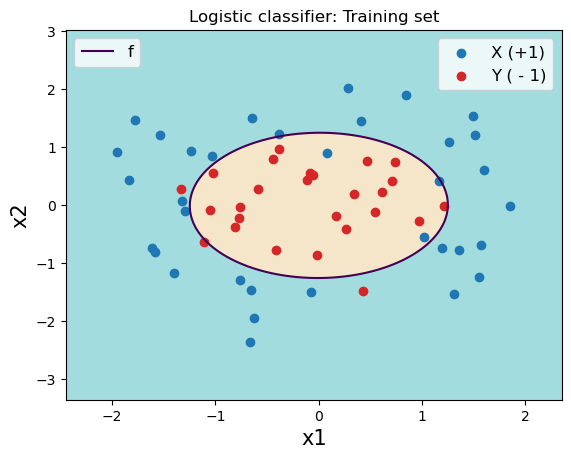

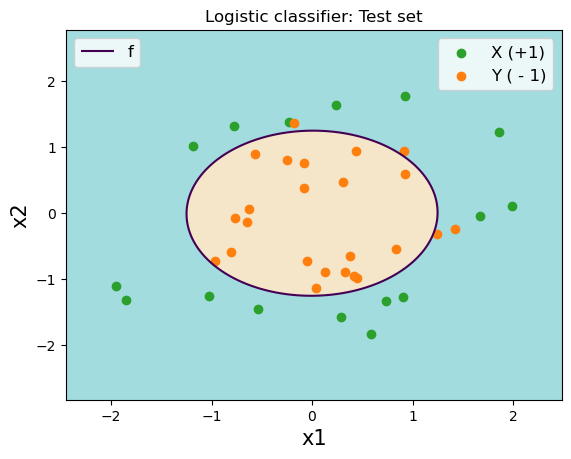

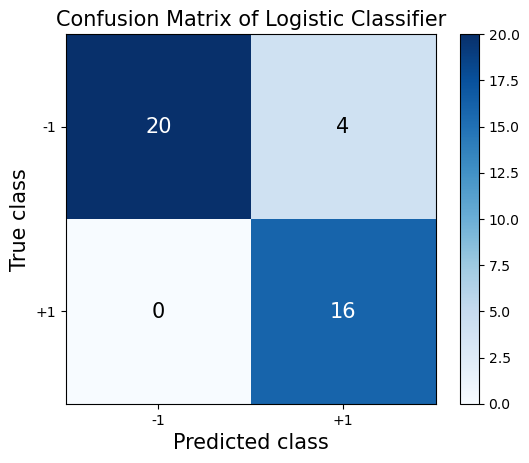

Performance evaluation results:
Accuracy: 90.00%
Precision: 80.00%
Recall: 100.00%
F1: 88.89%


In [39]:
# Train a new classifier with logistic modeling and nonlinear transformation
logistic_nl = logistic_classifier(X=X_train_2, Y=Y_train_2, nonlinear=True)
logistic_nl.fit()
# Plot the trained classifier with the training points
logistic_nl.plot_logistic(set_1=X_train_2, set_2=Y_train_2, mode='Training', shade=True)
# Also plot the trained classifier with the test set
logistic_nl.plot_logistic(set_1=X_test_2, set_2=Y_test_2, colorX='tab:green', colorY='tab:orange', mode='Test', shade=True)

# Performance Evaluation
pred, true = logistic_nl.predict_all(X_test=X_test_2, Y_test=Y_test_2) # change here if we want to evaluate on training set.
cm = logistic_nl.compute_confusion_matrix(true, pred, show=False)
evaluator_log_nl = model_evaluator(confusion_matrix=cm)
evaluator_log_nl.display_confusion_matrix(classifier_name='Logistic')   
print('Performance evaluation results:')
accuracy = evaluator_log_nl.eval('accuracy')
precision = evaluator_log_nl.eval('precision')
recall = evaluator_log_nl.eval('recall')
f1= evaluator_log_nl.eval('f1')


Et voilà! We can now see that the classifier with logistic modeling which was unable to separate the data points of dataset 2, is now capable of separating the two classes with a high accuracy of 90\%, and a nonlinear decision boundary has been learned. 

We can adopt the same idea, apply the nonlinear transformation to our data and train a support vector classifier. We can now modify the original class and update it to **SVM_v2** now!

***6.3.2. Nonlinear transformation - SVM***

Unlike logistic regression, we need to tune the hyperparameter $\gamma$ for a support vector classifier, as explained earlier. Instead of writing the code of the tuning process in a separate cell, we should take advantage of object-oriented programming and integrate it as a function in the class to make the code more compact and legible.

In [140]:
class SVM_v2:
    
    def __init__(self, X_train, Y_train, nonlinear=False):
        '''
        Initialization of the SVM classifier. Define variables and constraints.
        Arg  X_train, Y_train: training data.
             nonlinear: choose whether activating nonlinear transformation on data
        '''
        self.nonlinear = nonlinear # save as instance variable for other functions e.g. plot_svm().

        if self.nonlinear:
            # It is up to us to define the nonlinear transformation here.
            def phi(x):
                return np.array([x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2])
            self.X_train = np.apply_along_axis(phi, axis=1, arr=X_train)
            self.Y_train = np.apply_along_axis(phi, axis=1, arr=Y_train)
        else:
            self.X_train = X_train 
            self.Y_train = Y_train 

        # Define variables
        self.a = cp.Variable(self.X_train.shape[1]) # 2-dimensional data
        self.b = cp.Variable()                      # scalar
        self.u = cp.Variable(self.X_train.shape[0]) # slack variable
        self.v = cp.Variable(self.Y_train.shape[0]) # slack variable
            

        # Define constraints
        self.constraints = [
            self.a @ self.X_train.T - self.b >= 1 - self.u,
            self.a @ self.Y_train.T - self.b <= -1 + self.v,
            self.u >= 0,
            self.v >= 0
        ]
    
    def fit(self, gamma=0.1):
        '''
        Function to train the SVM classifier based on training sets.
        Arg  gamma: hyperparameter which controls the trade-off between 
                    the number of misclassified points and the width of the slab.
        '''
        self.gamma = gamma
        # Define the objective function
        objective = cp.Minimize(cp.norm(self.a) + gamma * (cp.sum(self.u) + cp.sum(self.v)))

        # Define and solve the convex optimization problem
        problem = cp.Problem(objective, self.constraints)
        problem.solve()
    
    def tune(self, lower_b=0.01, upper_b=5, pts=50, X_test=None, Y_test=None):
        '''
        Function to perform hyperparameter tuning based on the specified test set and the accuracy metric.
        Arg     lower_b: the minimum gamma value to test
                higher_b: the maximum gamma value to test
                pts: the number of points in between
                X_test: test set, class +1
                Y_test: test set, class -1
        Output  train_time: hyperparameter tuning time
                best_gamma: the first gamma that gives the highest validation accuracy
                best_acc: the highest test accuracy obtained
                gamma_range[best_gamma_index]: the best gammas in the specified range
        '''
        # Define the values for tuning.
        gamma_range = np.linspace(lower_b, upper_b, pts)
        # Initialize variables to keep track of the best gamma and the highest accuracy.
        best_gamma = 0
        best_acc = 0
        best_gamma_index = []

        # Train the SVM on the training set by varying gamma
        start = time.time()
        for i, g in enumerate(gamma_range):
            # Train
            self.fit(gamma=g)
            # Evaluate the accuracy metric of the SVM model on the test set.
            pred_vals, true_vals = self.predict_all(X_test, Y_test)
            confmat = self.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
            evaluator_svm = model_evaluator(confusion_matrix=confmat)
            acc = evaluator_svm.eval('accuracy', display=False)
            # Keep track of the best results and update the best gamma and accuracy.
            # N.B. Don't use one single >= condition otherwise the first gamma will always be appended even if it doesn't achieve highest acc.
            if acc > best_acc:
                best_gamma = g   
                best_acc = acc 
                best_gamma_index = [i]
            elif acc == best_acc:
                best_gamma_index.append(i)
        end = time.time()
        tuning_time = end - start 
        return tuning_time, best_gamma, round(best_acc*100,2), gamma_range[best_gamma_index] 

    def plot_svm(self, set_1, set_2, colorX='tab:blue', colorY='tab:red', mode='Training', shade=True, disp_slab=True):
        '''
        Function to plot the data points along with the trained SVM classifier with slab.
        Arg   set_1, set_2: The two sets of points to plot (training or test data).
              colorX, colorY: set the colors of the two sets to plot.
              mode: define whether it is training or testing data (for figure title).    
        '''

        # Define the range of x values
        X_set = np.concatenate((set_1, set_2))
        plt.xlim([X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5])
        plt.ylim([X_set[:, 1].min() - 1, X_set[:, 1].max() + 1])
        x = np.linspace(X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5)

        if not self.nonlinear:
            y = (-self.a.value[0] * x + self.b.value) / self.a.value[1]
            y_upper = -(self.a.value[0]*x - (self.b.value + 1))/self.a.value[1]
            y_lower = -(self.a.value[0]*x - (self.b.value - 1))/self.a.value[1]
            plt.plot(x, y, color='blueviolet', linewidth=2.5, linestyle='-', label='f')
            plt.plot(x, y_upper, color='black', linestyle='--')
            plt.plot(x, y_lower, color='black', linestyle='--')
        else: 
            # Compute and plot the separating hyperplane in the original data space.
            h = 0.01
            xx, yy = np.meshgrid(np.arange(X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5, h), np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, h))
            Z = self.a.value[0]*xx**2 + self.a.value[1]*np.sqrt(2)*xx*yy + self.a.value[2]*yy**2 - self.b.value
            contour = plt.contour(xx, yy, Z, levels=[0], colors='blueviolet')
            if disp_slab:
                contour_lower = plt.contour(xx, yy, Z, levels=[-1], colors='slategrey', linestyles='dashed')
                contour_upper = plt.contour(xx, yy, Z, levels=[1], colors='slategrey', linestyles='dashed')

            h1,_ = contour.legend_elements()
            legend_f = plt.legend([h1[0], ],['f'], loc='upper left', fontsize=12)

        # Just to give the two classes a color to enhance visualization. Has nothing to do with the algorithm.
        if shade:
            from matplotlib.colors import ListedColormap
            light_cmap = ListedColormap(['#F5E5C9', '#A2DCDE'])
            # Use two different colors to shade the area to which the two classes belong.
            # Generate grid of points and Set axis range
            h = 0.01
            xx, yy = np.meshgrid(np.arange(X_set[:, 0].min() - 0.5, X_set[:, 0].max() + 0.5, h), np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, h))
            if self.nonlinear:
                Z = self.a.value[0]*xx**2 + self.a.value[1]*np.sqrt(2)*xx*yy + self.a.value[2]*yy**2 - self.b.value
                contour_slab = Z.copy()
                Z[Z<=0] = -1; Z[Z>0] = 1
                plt.contourf(xx, yy, Z, levels=[-1,0,1], cmap=light_cmap)
                # Plot the slab.
                if disp_slab:
                    plt.contourf(xx, yy, contour_slab,levels=[-1,1], alpha=0.35, colors='slategray')

            else: 
                Z = self.a.value[0] * xx + self.a.value[1] * yy - self.b.value
                Z[Z<=0] = -1; Z[Z>0] = 1
                plt.contourf(xx, yy, Z, levels=[-1,0,1], cmap=light_cmap)
                # Plot the slab.
                if disp_slab:
                    plt.fill_between(x, y_upper, y_lower, color='gray', alpha=0.5, label='slab')  

        # Plot the data points.
        plt.scatter(set_1[:, 0], set_1[:, 1], color=colorX, label='X (+1)')
        plt.scatter(set_2[:, 0], set_2[:, 1], color=colorY, label='Y ( - 1)')

        # Add axis labels and legend
        plt.title('Classification results on '+mode+' data: gamma='+str(self.gamma), fontsize=15)
        plt.xlabel('x1', fontsize=15)
        plt.ylabel('x2', fontsize=15)
        plt.legend(loc='best', fontsize=12)
        # plt.contour does not support the argument 'label'! add the legend separately
        if self.nonlinear:
            plt.gca().add_artist(legend_f)
        plt.show()
    
    def predict(self, x):
        '''
        Function to predict which class a single data point x belongs to
        Arg     x: the data point to classify
        Output  the class predicted (+1 or -1)
        '''
        return np.sign( np.dot(self.a.value, x.T) - self.b.value).astype(int)

    def predict_all(self, X_test, Y_test):
        '''
        Function to make all predictions based on test data 
        (for performance evaluation purposes, not for predicting the class of a point).
        Arg     X_test, Y_test: the two sets of test points to evaluate.
        Output  pred, true: predicted labels and true labels of the test data.
        '''
        # Make sure to transform also the test set into the feature space !
        if self.nonlinear:
            X_test = np.apply_along_axis(phi, axis=1, arr=X_test)
            Y_test = np.apply_along_axis(phi, axis=1, arr=Y_test)
            
        pred_X = np.sign(np.dot(self.a.value, X_test.T) - self.b.value).astype(int)
        pred_Y = np.sign(np.dot(self.a.value, Y_test.T) - self.b.value).astype(int)
        true_X = np.ones(X_test.shape[0]).astype(int)
        true_Y = -np.ones(Y_test.shape[0]).astype(int)
        # Concatenante two sets
        pred = np.concatenate((pred_X, pred_Y))
        true = np.concatenate((true_X, true_Y))
        # Convert '-1' to '0' for computing confusion matrix in a later stage
        pred[pred == -1] = 0
        true[true == -1] = 0
        
        return pred, true
    
    def compute_confusion_matrix(self, true, pred, show=True):
        '''
        Function to calcualte the confusion matrix based on predictions and true labels of test data.
        Arg     true, pred: test data's true and predicted labels.
        output  the confusion matrix.
        '''
        num_cls = len(np.unique(true))
        result = np.zeros((num_cls,num_cls))
        # Use numpy instead of for loop to accelerate code
        np.add.at(result, (true, pred), 1)
        confmat = result.astype('int')
        if show:
            print('The Confusion Matrix: \n', confmat)
            diagonal_sum = confmat.trace()
            sum_of_all_elements = confmat.sum()
            accuracy = diagonal_sum / sum_of_all_elements
            print('Accuracy = {:0.2f}%'.format(accuracy*100))
        return confmat

Let us first tune the hyperparameter $\gamma$ so that we can pick the one that maximizes the test accuracy.

In [154]:
svm_nl = SVM_v2(X_train=X_train_2, Y_train=Y_train_2, nonlinear=True)
_, _, high_acc, best_gammas = svm_nl.tune(X_test=X_test_2, Y_test=Y_test_2, pts=100)
print(best_gammas)

[0.06040404 0.16121212 0.21161616 0.2620202  0.31242424 0.36282828
 0.41323232 0.46363636 0.5140404  0.56444444 0.61484848 0.66525253
 0.71565657]


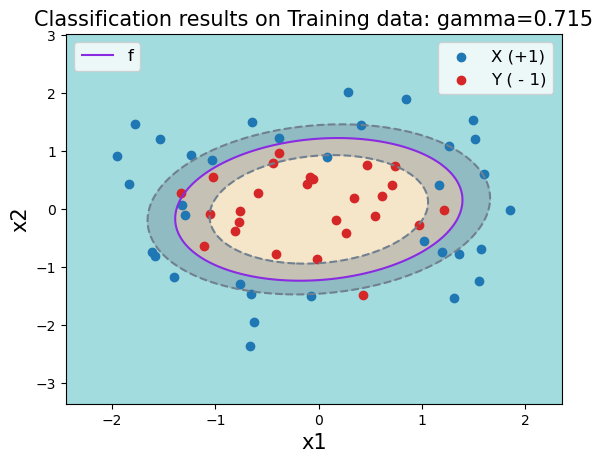

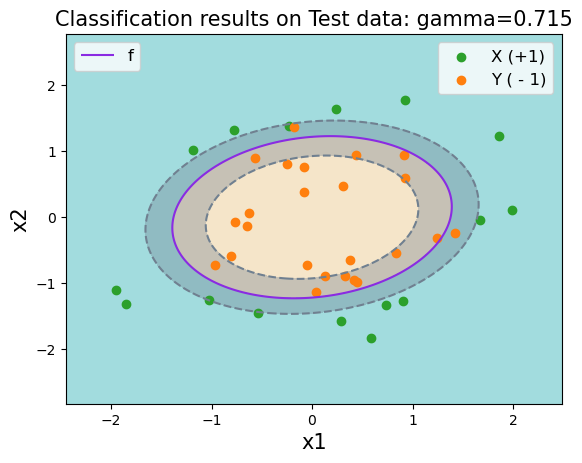

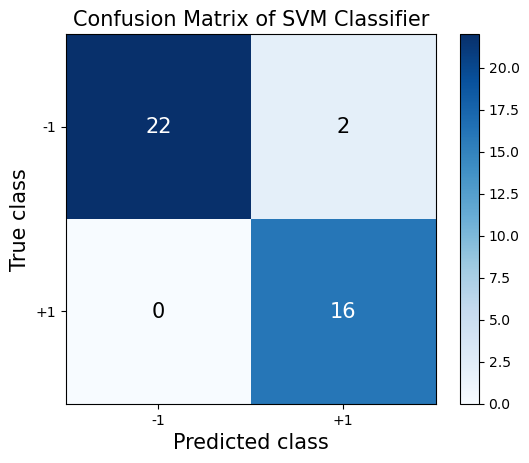

Performance evaluation results:
Accuracy: 95.00%
Precision: 88.89%
Recall: 100.00%
F1: 94.12%


In [155]:
# Train a new nonlinear SVM.
svm_nl.fit(gamma=0.715)
# Plot the decision boundary and training data.
svm_nl.plot_svm(set_1=X_train_2, set_2=Y_train_2, mode='Training', shade=True, disp_slab=True)
# Plot the decision boundary and test data.
svm_nl.plot_svm(set_1=X_test_2, set_2=Y_test_2, colorX='tab:green', colorY='tab:orange', mode='Test', shade=True, disp_slab=True)

# Evaluate classifier performance.
pred_v, true_v = svm_nl.predict_all(X_test=X_test_2, Y_test=Y_test_2)
cm = svm_nl.compute_confusion_matrix(true=true_v, pred=pred_v, show=False)
evaluator_svm_nl = model_evaluator(confusion_matrix=cm)
evaluator_svm_nl.display_confusion_matrix(classifier_name='SVM')
print('Performance evaluation results:')
accuracy = evaluator_svm_nl.eval('accuracy')
precision = evaluator_svm_nl.eval('precision')
recall = evaluator_svm_nl.eval('recall')
f1= evaluator_svm_nl.eval('f1')


The trained classifier and the evaluation results are shown above. The area between the dashed lines is the slab. We can choose to display the slab or deactivate it by specifying the argument 'disp_slab' of the function plot_svm(). So far we have trained a classifier outperforming every single method we did before (quadratic, polynomial and logistic regression), achieving a test accuracy as high as 95\%.

We have successfully improved the test accuracy (and also the other three metrics) with the same nonlinear transformation, and we can freely adjust the trade-off using $\gamma$ based on our needs so in this specific case, it is outperforming the logistic classifier. The standard for tuning $\gamma$ was based on the test accuracy and obviously not on the training accuracy, so the training accuracy could be lower as shown below. The confusion matrix based on training data can be used to identify problems such as overfitting or underfitting, which is also what we discussed earlier in polynomial discrimination. 

Notice that the dataset here is very simple so lower order polynomial discrimination or a simple nonlinear transformation with no matter which classification algorithm would yield good results. In reality, for complex datasets, a higher order nonlinear transformation is required and generally polynomial discrimination will lead to fast overfitting even if we regularize it, a lot of newly introduced dimensions may share the same information. We can probably choose Legendre polynomials which form an orthogonal basis in Hilbert space thus avoiding any linear dependency such that there is no dependent weights learning the same information as the same information will not be used in different dimensions.

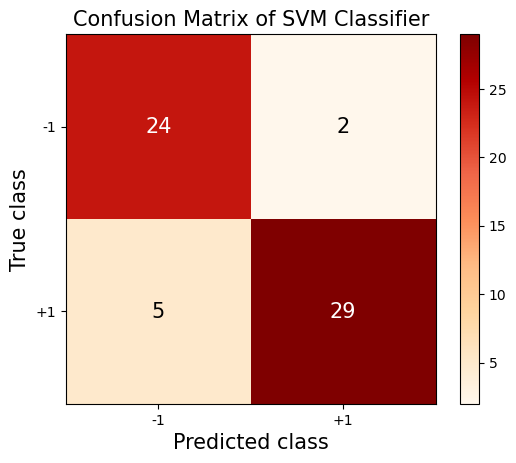

Accuracy: 88.33%


In [134]:
pred_v, true_v = svm_nl.predict_all(X_test=X_train_2, Y_test=Y_train_2)
cm = svm_nl.compute_confusion_matrix(true=true_v, pred=pred_v, show=False)
evaluator_svm_nl = model_evaluator(confusion_matrix=cm)
evaluator_svm_nl.display_confusion_matrix(classifier_name='SVM', mode='Training') # mode is just for different colors to differentiate test and train confmat.
evaluator_svm_nl.eval('accuracy');

***6.3.3. Kernelized SVM***

Actually, the specificity of support vector classifier is that instead of defining the nonlinear transform $\phi(x)$ manually, we can take advantage of the 'kernel trick' which allows the model to learn the nonlinear decision boundary more efficiently by implicitly mapping input data into a higher-dimensional feature space with a kernel which only needs the dot product/similarity between data points in the input space. 

We can implement different common types of kernels such as RBF (Radial Basis Functions), polynomial, etc. 

Let us solve the following optimization problem with kernel trick and hinge loss:

$\min\limits_{\boldsymbol{a}} \sum\limits_{i=1}^{m} \max ( 0, 1 - y_i(\mathbf{x}_i^\top\boldsymbol{a})) + \frac{1}{2}       
\left \| \boldsymbol{a} \right \| ^{2}_{2}$

Where $\boldsymbol{a}$ is the vector of weights to be learned, $\mathbf{x}_i$ is the $i$-th training sample, $y_i$ is its label, and $m$ is the number of training points.

In [6]:
X_train_2.shape, Y_train_2.shape, X_test_2.shape, Y_test_2.shape

((34, 2), (26, 2), (16, 2), (24, 2))

In [26]:
class SVM_v3:
    def __init__(self, X_train, Y_train, X_test, Y_test, C=10, features=2, sigma_sq=0.1, kernel=None, degree=3, gamma=1.0):
        
        # Copy and save dataset as instance variables for plotting decision boundary later.
        self.X_train_copy = X_train
        self.Y_train_copy = Y_train 
        self.X_test_copy = X_test 
        self.Y_test_copy = Y_test 

        true_X = np.ones(X_train.shape[0]).astype(int)
        true_Y = -np.ones(Y_train.shape[0]).astype(int)
        # Concatenante two training sets
        self.X = np.concatenate((X_train, Y_train))
        self.y = np.concatenate((true_X, true_Y))

        test_X = np.ones(X_test.shape[0]).astype(int)
        test_Y = -np.ones(Y_test.shape[0]).astype(int)
        # Concatenante two test sets
        self.X_test = np.concatenate((X_test, Y_test))
        self.y_test = np.concatenate((test_X, test_Y))

        self.C = C
        self.features = features
        self.sigma_sq = sigma_sq
        self.kernel = kernel
        self.a = np.zeros(features)
        self.b = 0.
        self.degree=degree
        self.gamma=gamma
            
    def rbf_kernel(self, x1, x2):
        sq_norm = np.sum(x1**2, axis=1, keepdims=True) + np.sum(x2**2, axis=1) - 2 * np.dot(x1, x2.T)
        return np.exp(-sq_norm / (2 * self.sigma_sq))
    
    def polynomial_kernel(self, x1, x):
        K = (1 + self.gamma * np.dot(x1, x.T)) ** self.degree
        return K

    def fit(self):
        y = self.y.copy()
        x = self.X.copy()
        self.initial = x.copy()
        
        if self.kernel == "rbf":
            x = self.rbf_kernel(x, x)
        elif self.kernel == "poly":
            x = self.polynomial_kernel(x, x)  

        # Use CVXPY to formulate and solve the optimization problem.
        a = cp.Variable(x.shape[0], nonneg=True)
        cost = cp.sum(cp.maximum(0, 1 - cp.multiply(y, x @ a))) + self.C*1/2 * cp.sum_squares(a) 
        #print(y.shape, x.shape, alpha.shape)
        prob = cp.Problem(cp.Minimize(cost))
        prob.solve()
        self.a = (a.value * y) @ x
        self.b = np.mean(y - x @ self.a)

    def evaluate(self, mode=None):
        # Detect if the user entered a valid mode.
        if mode not in {'training', 'Training', 'test', 'Test'}:
            raise ValueError('Unknown evaluation mode.')
        # Evaluate based on mode.
        if (mode == 'training') or (mode == 'Training'):
            pred = self.predict(self.X)
            pred = np.where(pred == -1, 0, 1)
            diff = np.abs(np.where(self.y == -1, 0, 1) - pred)
            return ((len(diff) - sum(diff)) / len(diff))
        elif (mode == 'test') or (mode == 'Test'):
            pred = self.predict(self.X_test)
            pred = np.where(pred == -1, 0, 1)
            diff = np.abs(np.where(self.y_test == -1, 0, 1) - pred)
            return ((len(diff) - sum(diff)) / len(diff))

    def predict(self, x):
        # Choose the specified kernel to make predictions.
        if self.kernel == "rbf":
            x = self.rbf_kernel(x, self.initial)
        elif self.kernel == "poly":
            x = self.polynomial_kernel(x, self.initial)
        return np.where(np.dot(x, self.a) + self.b > 0, 1, -1)
    
    def plot_decision_boundary(self, mode=None):
        # Function to plot the final decision boundary, just like before.
        from matplotlib.colors import ListedColormap
        light_cmap = ListedColormap(['#F5E5C9', '#A2DCDE'])

        if mode not in {'training', 'Training', 'test', 'Test'}:
            raise ValueError('Unknown evaluation mode.')
        if (mode == 'training') or (mode == 'Training'):
            X = self.X.copy()
            y = self.y.copy()
            X_data = self.X_train_copy.copy()
            Y_data = self.Y_train_copy.copy()
        elif (mode == 'test') or (mode == 'Test'):
            X = self.X_test.copy()
            y = self.y_test.copy()
            X_data = self.X_test_copy.copy()
            Y_data = self.Y_test_copy.copy()
        # Create grid.
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                            np.arange(x2_min, x2_max, 0.1))
        # Evaluate the SVM model at each point in the grid.
        Z = self.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)
        # Plot the points and the decision boundary.
        plt.contour(xx1, xx2, Z, levels=[0], colors='blueviolet')
        plt.contourf(xx1, xx2, Z, cmap=light_cmap)
        # Chosse the right data points and different colors to plot.
        if (mode == 'training') or (mode == 'Training'): 
            plt.scatter(X_data[:, 0], X_data[:, 1], color='tab:blue', label='X (+1)')
            plt.scatter(Y_data[:, 0], Y_data[:, 1], color='tab:red', label='Y ( - 1)')
        elif (mode == 'test') or (mode == 'Test'): 
            plt.scatter(X_data[:, 0], X_data[:, 1], color='tab:green', label='X (+1)')
            plt.scatter(Y_data[:, 0], Y_data[:, 1], color='tab:orange', label='Y ( - 1)')
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend(loc='best')
        plt.show()

We can select different kernels to see results. The following figure shows the best results achieved. There is no point of showing the confusion matrix every time for a simple binary classification problem. We will just display the accuracy to make the notebook more concise from now on.

Surprisingly, the accuracy on the test set is 100\% ! We conclude that for this specific dataset it is better to use the kernalized support vector classifier with the polynomial kernel. 

Accuracy (training): 85.0 %
Accuracy (test): 100.0 %


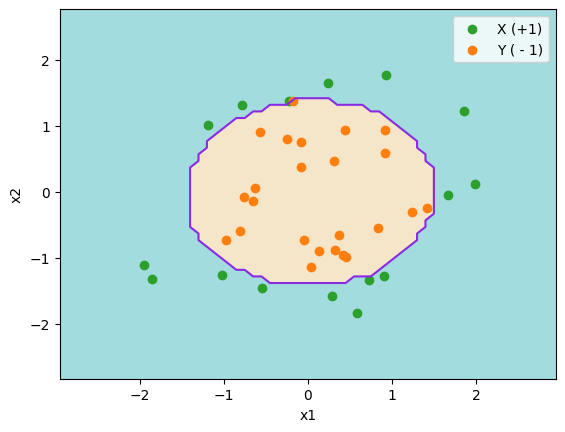

In [29]:
model = SVM_v3(X_train=X_train_2, Y_train=Y_train_2, X_test=X_test_2, Y_test=Y_test_2, degree=2, gamma=2, kernel='poly')
model.fit()
print('Accuracy (training):', model.evaluate(mode='training')*100, '%')
print('Accuracy (test):', model.evaluate(mode='test')*100, '%')
model.plot_decision_boundary(mode='test')

***6.3.4. Multilayer Perceptron (Out of scope of this course)***

Multilayer perceptron (MLP), often known as artifical neural networks, can be used for both regression and classification tasks. Typically, a MLP used consists of an input layer which has the same dimension of input data, hidden layer(s) and an output layer of which the number of neurons is equal to the number of classes in the case of classification. 

<!-- <a href="https://www.javatpoint.com/multi-layer-perceptron-in-tensorflow">
    <img src="https://static.javatpoint.com/tutorial/tensorflow/images/multi-layer-perceptron-in-tensorflow.png" alt="Multi-Layer Perceptron in TensorFlow">
</a> -->

<div style="text-align:center">
    <img src="https://static.javatpoint.com/tutorial/tensorflow/images/multi-layer-perceptron-in-tensorflow.png" alt="Multi-Layer Perceptron in TensorFlow" style="display:block; margin:auto;">
</div>

Figure source: https://www.javatpoint.com/multi-layer-perceptron-in-tensorflow 

Although the approach with MLP is not considered as convex optimziation even if the loss function is convex, the idea of training a MLP is still based on optimizing a loss function with gradient descent. It is not considered convex optimization mainly because of the nonlinear activation functions such as **ReLU** or **Sigmoid** which will provoke many saddle points instead of a unique global minimum in the case of convex optimization. 

Nevertheless, we can still build a two or three-layer MLP for fun and see if it achieves good test results on our data. Since the coursework specified that we cannot use libraries like sklearn, we are still going to follow the rule and build a MLP from scratch using only NumPy to program the forward and back propagation (code adapted and modified from $[4]$). The forward propagation is simple and only involves matrix multiplication + activation:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{6}$$

Where $l$ is the layer, $Z$ is the output of the linear forward propagation before nonlinear activation and $A$ is the output after activation. $W$ and $b$ are weights and bias to be learned.

The objective function is the cross-entropy loss in the case of binary classification:
$$\mathcal{L} = \frac{1}{m} \sum\limits_{i = 1}^{m} (-y^{(i)}\log\left(a^{[L] (i)}\right) - (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

The backpropagation formulas are actually also not hard to obtain by just computing the gradients. The deduction is omitted here and the formulas are: 

$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$

Since it is just matrix multiplication + activation + gradient descent, it is not hard to code from scratch but is indeed tedious. In addition, as it is beyond the scope of this course, the explanations of code are not provided here. We will use the fit() function to train on our different datasets. 

In [83]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def relu(z):
    return np.maximum(0,z)   

def init_param(layer_list):
    '''
    Function to initialize the parameters of the network.
    Arg      layer_list: layer structure of the 3-layer NN. 
    Output   params: the parameters initialized.
    '''
    params = {}
    for l in range(1,len(layer_list)):
        params['W' + str(l)] = np.random.randn(layer_list[l], layer_list[l-1]) / np.sqrt(layer_list[l-1])
        params['b' + str(l)] = np.zeros((layer_list[l], 1))    
    return params 

def forward_prop(X, params):
    '''
    Function to compute forward propagation.
    Arg:    X: data matrix
            params: parameters
    Output: A3: final layer after activation.
            cache: cache information of previous layers.
    '''
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]
    # ReLU activations for the first 2 layers and sigmoid activation for output layer.
    Z1 = np.dot(W1, X) + b1     # WX+b    Layer 1
    A1 = relu(Z1)               # phi(WX+b) activation
    Z2 = np.dot(W2, A1) + b2    # WX+b    Layer 2
    A2 = relu(Z2)               # phi(WX+b) activation
    Z3 = np.dot(W3, A2) + b3    # WX+b    Layer 3
    A3 = sigmoid(Z3)            # phi(WX+b) activation 
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)  
    return A3, cache

def backprop(X, Y, cache):
    '''
    Function to compute backpropagation.
    Arg:    X : data matrix
            Y : ground truth labels of data
            cache: info from forward prop.
    Output: grads: gradients w.r.t. each param.
    '''
    nb_pts = X.shape[1]    # number of points
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    dZ3 = A3 - Y
    dW3 = 1./nb_pts * dZ3 @ A2.T    
    db3 = 1./nb_pts * np.sum(dZ3, axis=1, keepdims = True) 
    dA2 = W3.T @ dZ3
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./nb_pts * dZ2 @ A1.T
    db2 = 1./nb_pts * np.sum(dZ2, axis=1, keepdims = True)  
    dA1 = W2.T @ dZ2
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./nb_pts * dZ1 @ X.T
    db1 = 1./nb_pts * np.sum(dZ1, axis=1, keepdims = True) 
    grads = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}   
    return grads

def gradient_descent(params, grads, lr):
    '''
    Function to perform gradient descent to learn the model.
    Arg:     params: current parameters
             grads: gradients
             lr: learning rate
    Output:  params: updated parameters
    '''
    for k in range(len(params) // 2): # Nb of layers in the NN.
        params["W" + str(k+1)] = params["W" + str(k+1)] - lr * grads["dW" + str(k+1)]
        params["b" + str(k+1)] = params["b" + str(k+1)] - lr * grads["db" + str(k+1)]   
    return params

def predict(X, y, params):
    '''
    Function to make predictions 
    Arg:   X: data that we wish to predict the corresponding class
           y: true label
           params: learned/trained parameters 
    '''   
    proba = np.zeros((1,X.shape[1]), dtype = int)  
    # Forward propagation
    a3, caches = forward_prop(X, params)  
    # convert probability
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            proba[0,i] = 1
        else:
            proba[0,i] = 0
    print("Accuracy: "  + str(np.mean((proba[0,:] == y[0,:]))))   
    return proba

def get_cost(a3, Y):
    '''
    Function to compute cost function. 
    Arg:    a3: activated output from forward prop
            Y: ground truth labels
    Output: The cost.
    '''
    ce = np.multiply(-np.log(a3+ 1e-10),Y) + np.multiply(-np.log(1 - a3+ 1e-10), 1 - Y)    
    return 1./Y.shape[1] * np.nansum(ce)

def predict_dec(params, X):
    '''
    Function for plotting decision boundary.
    Arg:    params: parameters
            X : data matrix 
    Output: pred: predictions vector
    '''
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_prop(X, params)
    pred = (a3>0.5)
    return pred

def plot_decision_boundary(model, X, y, mode=None):
    if mode not in {'training', 'Training', 'test', 'Test'}:
        raise ValueError('Unknown evaluation mode.')
    # Generate grid of points and Set axis range
    h = 0.01
    xx, yy = np.meshgrid(np.arange(X[0, :].min() - 1, X[0, :].max() + 1, h), np.arange(X[1, :].min() - 1, X[1, :].max() + 1, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    from matplotlib.colors import ListedColormap
    light_cmap = ListedColormap(['#A2DCDE', '#F5E5C9'])
    plt.contourf(xx, yy, Z, cmap=light_cmap)
    plt.contour(xx, yy, Z, colors='blueviolet')
    plt.ylabel('x2')
    plt.xlabel('x1')

    # Since we combined dataset, we need to retrieve the class using the label vector y.
    # This is just for plotting points and legends with the same colors we defined earlier
    is_classneg = np.squeeze(y) == 0
    is_classpos = np.squeeze(y) == 1

    if (mode == 'training') or (mode == 'Training'):
        plt.title('Training')
        plt.scatter(X[0, is_classneg], X[1, is_classneg], c='tab:blue', label='X (+1)')
        plt.scatter(X[0, is_classpos], X[1, is_classpos], c='tab:red', label='Y ( - 1)')

    elif (mode == 'test') or (mode == 'Test'):
        plt.title('Test')
        plt.scatter(X[0, is_classneg], X[1, is_classneg], c='tab:green', label='X (+1)')
        plt.scatter(X[0, is_classpos], X[1, is_classpos], c='tab:orange', label='Y ( - 1)')
    plt.legend(loc='best')
    plt.show()

def get_cost_reg(A3, Y, params, lambd):
    '''
    Function to get the cost with regularization.
    Arg:   A3: activated output
           Y: ground truth labels
           params: parameters
           lambd: regularization hyperparameter
    Output: the cost.
    '''
    W1 = params["W1"]
    W2 = params["W2"]
    W3 = params["W3"]
    # Get the cross entropy part of loss 
    ce_cost = get_cost(A3, Y) 
    # Get the regularization part of loss (L2)
    reg_cost_L2 = (lambd/(2*Y.shape[1])) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    return ce_cost + reg_cost_L2
    
def backprop_reg(X, Y, cache, lambd):
    '''
    FUNCTION FOR BACKPROPAGATION
    '''
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    dW3 = 1./X.shape[1] * dZ3 @ A2.T + (lambd/X.shape[1]) * W3
    db3 = 1./X.shape[1] * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = W3.T @ dZ3 
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./X.shape[1] * dZ2 @ A1.T + (lambd/X.shape[1]) * W2
    db2 = 1./X.shape[1] * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = W2.T @ dZ2 
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./X.shape[1] * dZ1 @ X.T + (lambd/X.shape[1]) * W1
    db1 = 1./X.shape[1] * np.sum(dZ1, axis=1, keepdims = True)
    
    grads = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return grads

def forward_prop_dropout(X, params, hold_rate = 0.5):
    '''
    FUNCTION FOR FORWARD PROP WITH DROPOUT
    '''
    np.random.seed(1)
    # retrieve parameters
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]

    Z1 = W1 @ X + b1
    A1 = relu(Z1)                                                         
    D1 = np.random.rand(A1.shape[0], A1.shape[1])                                        
    D1 = (D1 < hold_rate).astype(int) # convert to 0 or 1 
    A1 = A1 * D1                      # shut down some neurons of A1
    A1 = A1 / hold_rate               # scale the value of neurons that haven't been shut down
    Z2 = W2 @ A1 + b2
    A2 = relu(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])                                         
    D2 = (D2 < hold_rate).astype(int)                                        
    A2 = A2 * D2                                         
    A2 = A2 / hold_rate                                         
    Z3 = W3 @ A2 + b3
    A3 = sigmoid(Z3)  
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    return A3, cache

def backprop_dropout(X, Y, cache, hold_rate):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./X.shape[1] * dZ3 @ A2.T 
    db3 = 1./X.shape[1] * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = W3.T @ dZ3

    dA2 = dA2 * D2              # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2 / hold_rate       # Step 2: Scale the value of neurons that haven't been shut down

    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./X.shape[1] * dZ2 @ A1.T
    db2 = 1./X.shape[1] * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = W2.T @ dZ2 

    dA1 = dA1 * D1              # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1 / hold_rate             # Step 2: Scale the value of neurons that haven't been shut down

    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./X.shape[1] * dZ1 @ X.T
    db1 = 1./X.shape[1] * np.sum(dZ1, axis=1, keepdims = True)
    
    grads = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return grads

def fit(X, Y, lr = 0.3, n_iter = 30000, print_cost = True, display_cost = True, lambd = 0, hold_rate = 1, layerstruct=None):
    '''
    Function to train a 3-layer MLP.
    Arg:
        X: training data 
        Y: groud truth label of data  
        lr: learning rate
        n_iters: number of iterations
        print_cost: decide whether to print the cost every 10k iters
        lambd -- regularization hyperparameter
        hold_rate - dropout hyperparameter
    Output:
    paramss -- Parameters learned
    '''
        
    grads = {}
    costs = []                              # get the whole sequence of cost.
    if layerstruct != None:                 # we can pass in the layer structure we want.
        layer_list = layerstruct
    else: 
        layer_list = [X.shape[0], 6, 3, 1]  # if no arg passed then use the default layer structure.
    
    # Init params.
    params = init_param(layer_list)

    # Use gradient descent to optimize the loss function / to learn parameters. 

    for i in range(0, n_iter):

        # Forward propagation.
        if hold_rate < 1:
            a3, cache = forward_prop_dropout(X, params, hold_rate)
        elif hold_rate == 1: 
            a3, cache = forward_prop(X, params)
        
        # Loss function.
        if lambd == 0:
            cost = get_cost(a3, Y)
        else:
            cost = get_cost_reg(a3, Y, params, lambd)
            
        # Backward propagation.
        assert(lambd==0 or hold_rate==1)    # We only use L2 reg or dropout, not the two at the same time.
                                            
        if lambd == 0 and hold_rate == 1:
            grads = backprop(X, Y, cache)
        elif lambd != 0:
            grads = backprop_reg(X, Y, cache, lambd)
        elif hold_rate < 1:
            grads = backprop_dropout(X, Y, cache, hold_rate)
        
        # Updata weights
        params = gradient_descent(params, grads, lr)
        # Print the cost every 10k iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)

    if display_cost:    
         
        # plot the cost
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (x1,000)')
        plt.title("Learning rate =" + str(lr))
        plt.show()
    
    return params
    

We need to first combine our training data into a single data matrix X_train and label them automatically with their corresponding class to Y_train. We do the same thing for X_test and Y_test. Note that here Y is no longer the data that belongs to the other class but instead the ground truth labels for our data.

In [31]:
def generate_dataset_mlp(X, Y, X_tst, Y_tst):
    # Create the training data X 
    X_train = np.concatenate((X.T, Y.T), axis=1)
    # Generate the corresponding labels Y 
    Y_train = np.concatenate((np.zeros(X.T.shape[1]), np.ones(Y.T.shape[1]))).reshape(1,X_train.shape[1])
    # Idem for test set data X
    X_test = np.concatenate((X_tst.T, Y_tst.T), axis=1)
    # Idem for test set labels Y
    Y_test = np.concatenate((np.zeros(X_tst.T.shape[1]), np.ones(Y_tst.T.shape[1]))).reshape(1,X_test.shape[1])
    return X_train, Y_train, X_test, Y_test 

X_train, Y_train, X_test, Y_test = generate_dataset_mlp(X=X_train_2, Y=Y_train_2, X_tst=X_test_2, Y_tst=Y_test_2)

We can then train the MLP on our data:

Cost after iteration 0: 0.6905029841311928
Cost after iteration 10000: 0.00105509165782441
Cost after iteration 20000: 0.000415451261355394
--------------- Accuracy (training) ---------------:
Accuracy: 1.0
----------------- Accuracy (test) -----------------:
Accuracy: 0.825


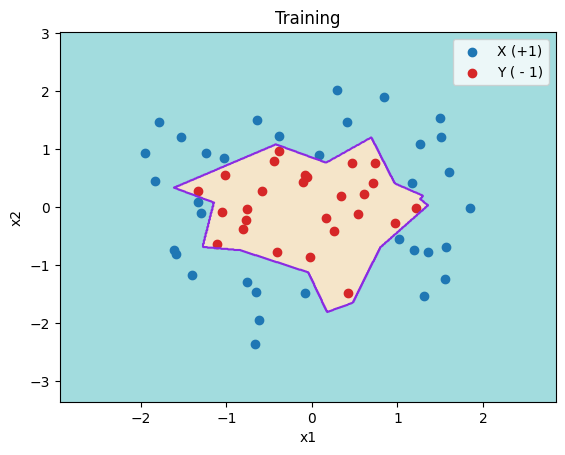

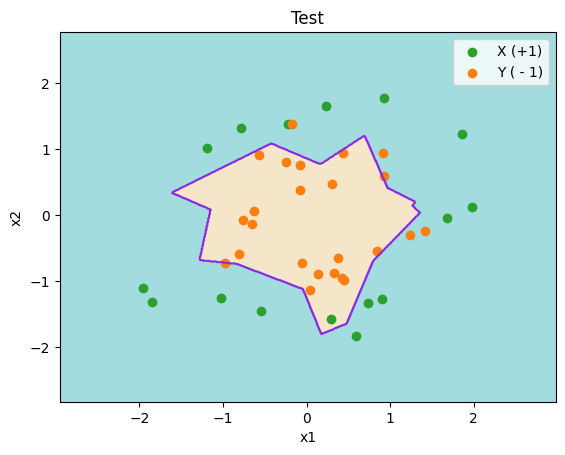

In [64]:
params = fit(X_train, Y_train, display_cost=False)
print ("--------------- Accuracy (training) ---------------:")
predictions_train = predict(X_train, Y_train, params)
print ("----------------- Accuracy (test) -----------------:")
predictions_test = predict(X_test, Y_test, params)
plt.title("MLP Model without regularization")
axes = plt.gca()
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, Y_train, mode='training')
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_test, Y_test, mode='test')

Obviously, the model is overfitting and learned a decision boundary to perfectly separte our training data, and the test accuracy is not high enough (low bias but high variance). It is predictable since our dataset is very simple but we are using a relatively complex MLP architecture with three hidden layers which is too expressive and have too much capacity to fit the training data. In this case it has memorized the training set at the expense of poor generalization to unseen test data, it tried to fit the noise in the data rather than the underlying patterns. 

This is why we also wrote functions to train the MLP with regularization earlier. We can apply L2 regularization (aka Ridge regression) by adding an extra penalty term to constrain the model's weights and add to the objective function. 

$$\tilde{J} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{11}$$

We can also apply Dropout which randomly deactivates some neurons during training to force the MLP to learn more robust features and the model will be less sensitive to specific weights. It is also controlled by a hyperparameter. During inference the whole network is used. 

Cost after iteration 0: 0.7910594500318102
Cost after iteration 10000: 0.4348753242096717
Cost after iteration 20000: 0.43477205547156794
--------------- Accuracy (training) ---------------:
Accuracy: 0.9333333333333333
----------------- Accuracy (test) -----------------:
Accuracy: 0.9


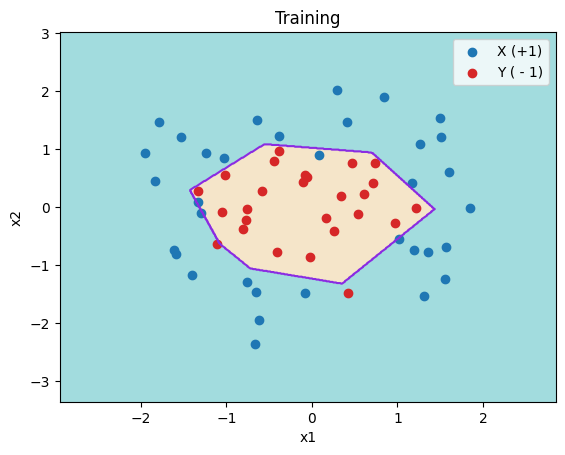

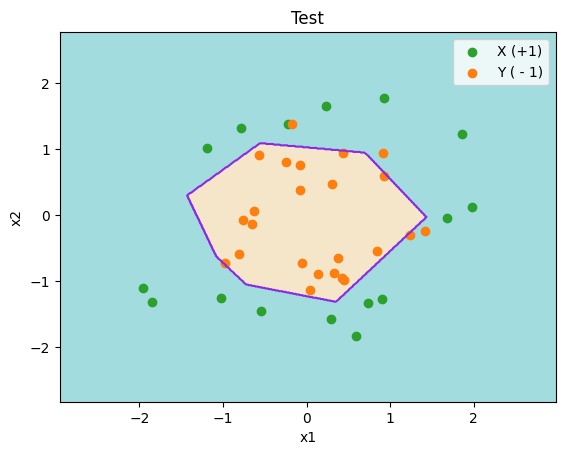

In [68]:
params = fit(X_train, Y_train, lambd = 1.4, display_cost=False)
print ("--------------- Accuracy (training) ---------------:")
predictions_train = predict(X_train, Y_train, params)
print ("----------------- Accuracy (test) -----------------:")
predictions_test = predict(X_test, Y_test, params)
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, Y_train, mode='training')
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_test, Y_test, mode='test')

We just applied L2 regularization. As we can see, the test accuracy has been improved from 82.5 \% to 90 \%.

It is also possible to do regularization with Dropout, as mentioned earlier.

Cost after iteration 0: 0.8179230392387156
Cost after iteration 10000: 0.0005370910180418145
Cost after iteration 20000: 0.0002478314043033347
--------------- Accuracy (training) ---------------:
Accuracy: 0.9666666666666667
----------------- Accuracy (test) -----------------:
Accuracy: 0.9


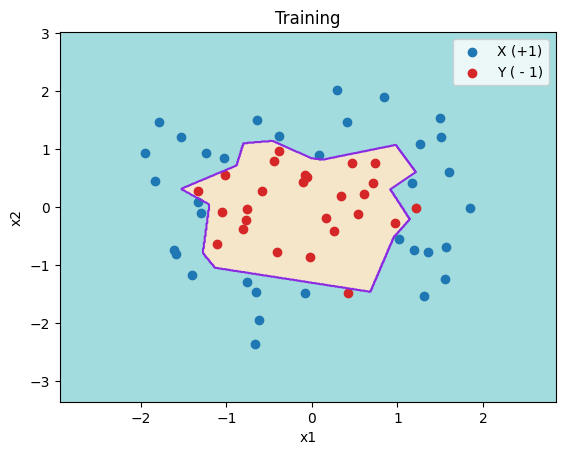

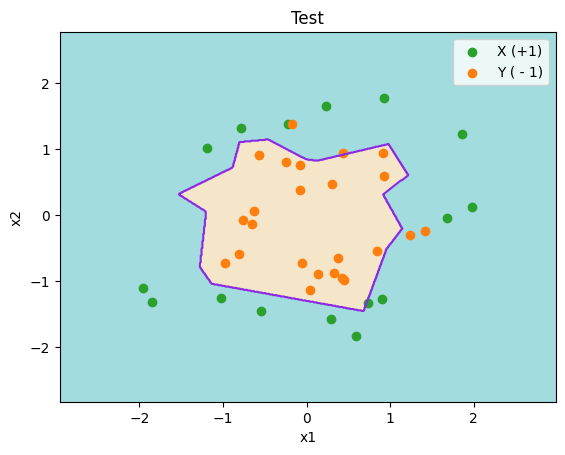

In [79]:
params = fit(X_train, Y_train, hold_rate = 0.96, lr = 0.3, display_cost=False)
print ("--------------- Accuracy (training) ---------------:")
predictions_train = predict(X_train, Y_train, params)
print ("----------------- Accuracy (test) -----------------:")
predictions_test = predict(X_test, Y_test, params)
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, Y_train, mode='training')
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_test, Y_test, mode='test')

We also have the same accuracy of 90 \%.

In fact, we have written the fit() function so that we can freely enter the dimensions of the layers instead of using the predefined structure. So for example we can have 20 neurons for the first hidden layers and 3 neurons for the second. By tweaking the layer structure and the regularization hyperparameter, we can possibly achieve better results. For example, the following model with Dropout regularization achieves a test accuracy of 92.5 \%. Therefore we improved from 85 \% (initial model) to 90 \% (L2 regularization) to 92.5 \% (Dropout). 

Cost after iteration 0: 0.691401426579916
Cost after iteration 10000: 0.11226492993379342
Cost after iteration 20000: 0.11221037914661179
--------------- Accuracy (training) ---------------:
Accuracy: 0.9166666666666666
----------------- Accuracy (test) -----------------:
Accuracy: 0.925


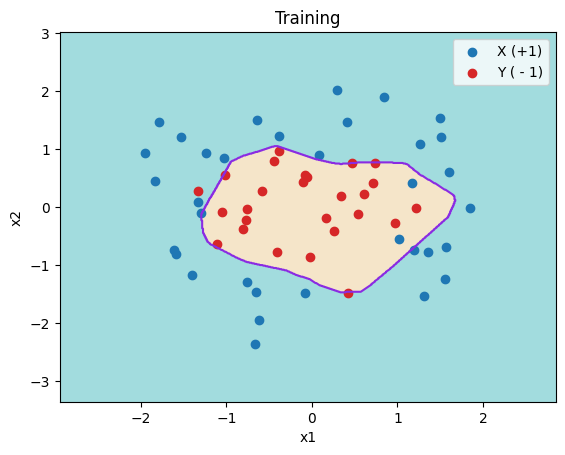

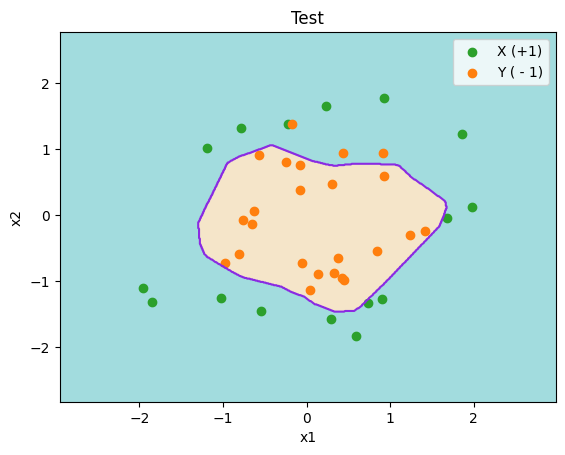

In [92]:
params = fit(X_train, Y_train, hold_rate = 0.82, lr = 0.3, display_cost=False, layerstruct=[X_train.shape[0], 20, 3, 1])
print ("--------------- Accuracy (training) ---------------:")
predictions_train = predict(X_train, Y_train, params)
print ("----------------- Accuracy (test) -----------------:")
predictions_test = predict(X_test, Y_test, params)
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, Y_train, mode='training')
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_test, Y_test, mode='test')

Nevertheless, even though MLP provides another interesting approach, we have already obtained excellent results with the kernelized support vector classifier. The choice of model depends on the characteristics of the specific data set and the problem. We may want to penalize one term more than the other depending on our optimization goal which can vary widely for real world problems. For the same problem, we need to explore and test different models before choosing the best one for our task (in this case kernelized SVM, for binary classification on dataset 2).

#### Part 7

We now repeat the above experiments (parts 5. and 6.) on dataset 3.

***7.1. Standard support vector classifier with $\gamma$ = 0.1***

Total training time of support vector classifier: 15.0 ms


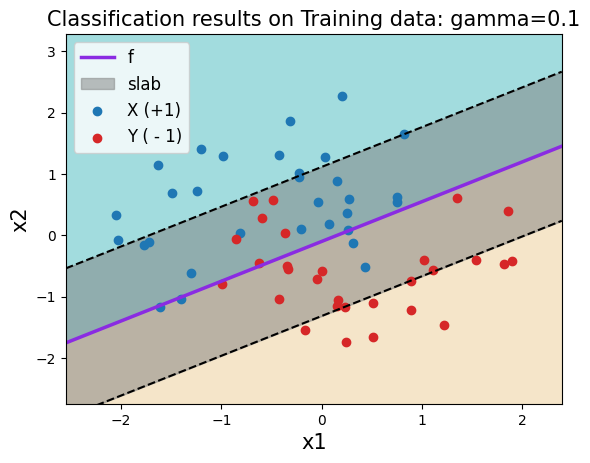

In [101]:
# Define a SVM classifier for dataset 3.
svm_classifier3 = SVM(X_train=X_train_3, Y_train=Y_train_3)
# Train the support vector classifier with gamma=0.1, as requsted.
start = time.time()
svm_classifier3.fit(gamma=0.1)
end = time.time()
print('Total training time of support vector classifier:', round((end-start)*1000, 2), 'ms')
# Plot the training data points with the classifier f and the associated slab.
svm_classifier3.plot_svm(X_train_3, Y_train_3, mode='Training', shade=True)

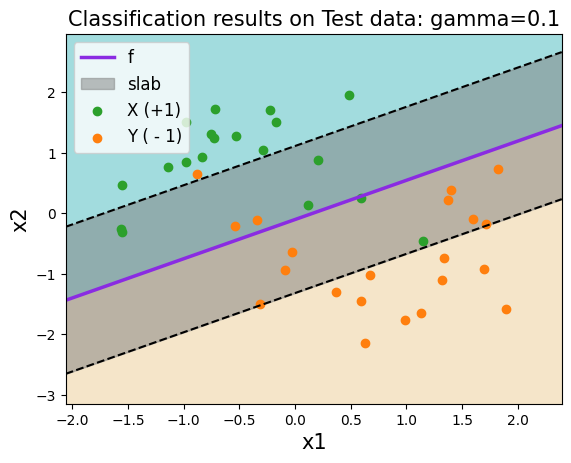

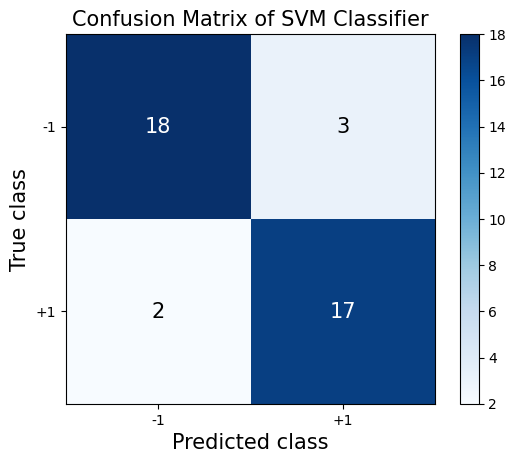

Performance evaluation results:
Accuracy: 87.50%
Precision: 85.00%
Recall: 89.47%
F1: 87.18%


In [102]:
# plot the test data points with the classifier f and the associated slab.
svm_classifier3.plot_svm(X_test_3, Y_test_3, 'tab:green', 'tab:orange', mode='Test', shade=True)
# (pre)evaluate the performance of the support vector classifier on the test set by generating the confusion matrix. 
pred_vals, true_vals = svm_classifier3.predict_all(X_test=X_test_3, Y_test=Y_test_3)
# we can set 'show=False' since we are also displaying it in the next line of code. Nevertheless, this computes and displays the accuracy by default, if not defining other metrics.
confmat3 = svm_classifier3.compute_confusion_matrix(true_vals, pred_vals, show=False) 
# initialize a model evaluator for the SVM classifier we just trained, using the confusion matrix obtained.
evaluator_svm3 = model_evaluator(confusion_matrix=confmat3)
# display the confusion matrix.
evaluator_svm3.display_confusion_matrix()
# choose a metric to evaluate performance.
print('Performance evaluation results:')
accuracy = evaluator_svm3.eval('accuracy')
precision = evaluator_svm3.eval('precision')
recall = evaluator_svm3.eval('recall')
f1= evaluator_svm3.eval('f1')

We observe that although dataset 3 is not linearly separable, the standard SVM found a decision boundary that has a good test accuracy of 87.5%, but it is obviously improvable using non-linear techniques.

***7.2. Quadratic discrimination***

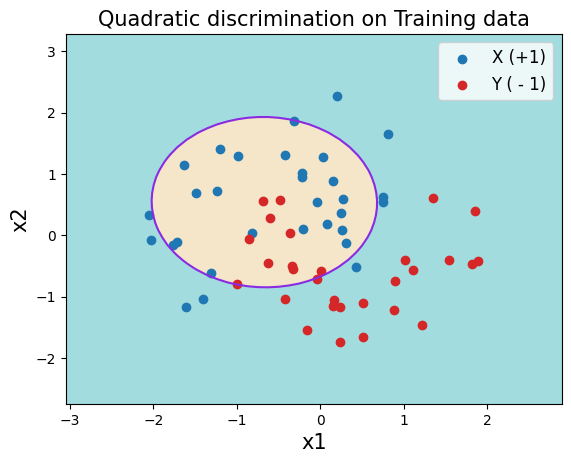

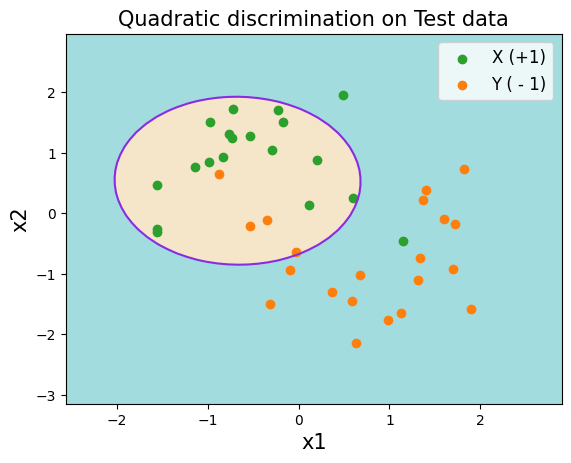

In [123]:
quad_classifier3 = quad_discrim(X_train=X_train_3, Y_train=Y_train_3, slack_var=3)
quad_classifier3.fit()
quad_classifier3.plot_quad(set_1=X_train_3, set_2=Y_train_3)
quad_classifier3.plot_quad(set_1=X_test_3, set_2=Y_test_3, colorX='tab:green', colorY='tab:orange', mode='Test')

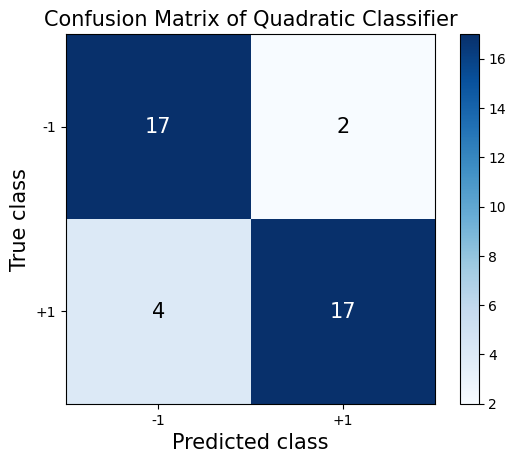

Accuracy: 85.00%


In [124]:
pred_vals, true_vals = quad_classifier3.predict_all(X_test=X_test_3, Y_test=Y_test_3)
true_vals = np.where(true_vals==1, 0, 1)
cm = quad_classifier3.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
quad_evaluator3 = model_evaluator(confusion_matrix=cm)
quad_evaluator3.display_confusion_matrix(mode='test', classifier_name='Quadratic')
accuracy = quad_evaluator3.eval('accuracy');

The test accuracy is not bad but the decision boundary is an ellipsoid because we assumed it in the case of quadratic discrimination. There is obviously a better nonlinear decision boundary other than an ellipsoid.

***7.3. Polynomial discrimination***

As before, we first adjust both hyperparameters at the same time to find the best order and regularization term.

In [125]:
best_acc = 0
best_order = None
best_reg = None

orders = [2, 3, 4, 5]
regs = np.linspace(0.01, 7, 500)

start = time.time()
for order in orders:
    for reg in regs:
        poly_classifier = poly_discrim(X_train=X_train_3, Y_train=Y_train_3, order=order) 
        poly_classifier.fit(reg=reg)

        pred_vals, true_vals = poly_classifier.predict_all(X_test=X_test_3, Y_test=Y_test_3)
        cm = poly_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
        poly_evaluator = model_evaluator(confusion_matrix=cm)
        test_acc = poly_evaluator.eval('accuracy', display=False)

        if test_acc > best_acc:
            best_acc = test_acc
            best_order = order
            best_reg = reg
end = time.time()

print(f"Hyperparameter tuning time: {end-start:.2f} s")
print(f"Best test accuracy: {best_acc:.4f}")
print(f"Best order: {best_order}")
print(f"Best regularization term: {best_reg:.4f}")

Hyperparameter tuning time: 12.29 s
Best test accuracy: 0.9750
Best order: 3
Best regularization term: 0.0520


Let us now apply a polynomial discrimination of order 3 and a regularization term equal to 0.052.

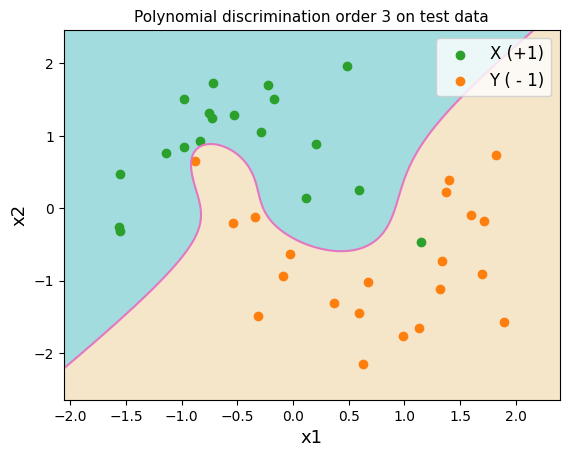

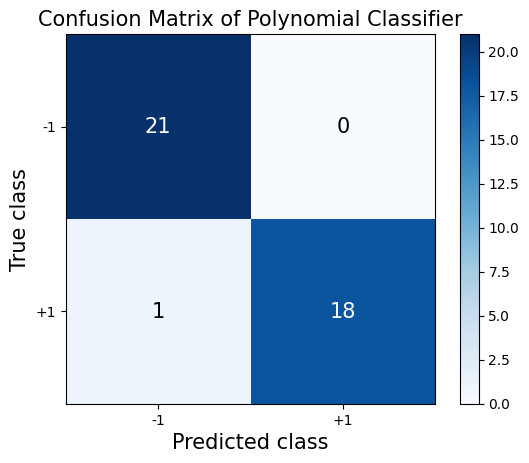

Accuracy: 97.50%


In [126]:
poly_classifier = poly_discrim(X_train=X_train_3, Y_train=Y_train_3, order=3) 
poly_classifier.fit(reg=0.052)
poly_classifier.plot_decision_boundary(X=X_test_3.T, Y=Y_test_3.T, color='test') # Dont forget to transpose given how we wrote the poly_discrim class.

pred_vals, true_vals = poly_classifier.predict_all(X_test=X_test_3, Y_test=Y_test_3)
cm = poly_classifier.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=False)
poly_evaluator = model_evaluator(confusion_matrix=cm)
poly_evaluator.display_confusion_matrix(mode='test', classifier_name='Polynomial')
test_acc = poly_evaluator.eval('accuracy');

We achived excellent accuracy on our test set with only one misclassified point.

***7.4. Other approaches***

Applying polynomial discrimination using the explicit polynomial function already yields good nonlinear decision boundaries with high accuracy. If we want to perform a nonlinear transformation on the data and apply a linear classifier like logistic regression or SVM is more complicated in this case. It was easy with dataset 2 because we know that the decision boundary would look like a circle so we can use the equation of a circle to do nonlinear transformation on the data. Here finding such a function for dataset 3 manually is complicated. We can try kernelized SVM though:

In [127]:
# Define the range of values for C and sigma to be tuned
C_values = np.linspace(0.1, 2, 50)
sigma_values = np.linspace(0.01, 2, 80)

# Initialize the best accuracy and best hyperparameters
best_acc = 0
best_C = None
best_sigma = None

# Nested for loops to iterate over all possible combinations of C and sigma
for C in C_values:
    for sigma in sigma_values:
        # Train the model using the current hyperparameters
        model = SVM_v3(X_train=X_train_3, Y_train=Y_train_3, X_test=X_test_3, Y_test=Y_test_3, C=C, sigma_sq=sigma, kernel='rbf')
        model.fit()
        # Evaluate the model on the test set
        acc = model.evaluate(mode='test')
        # Update the best accuracy and best hyperparameters if necessary
        if acc > best_acc:
            best_acc = acc
            best_C = C
            best_sigma = sigma

# Print the best accuracy and best hyperparameters
print("Best accuracy:", best_acc)
print("Best C:", best_C)
print("Best sigma:", best_sigma)

Best accuracy: 0.925
Best C: 0.5265306122448979
Best sigma: 0.11075949367088607


Accuracy (training): 88.33333333333333 %
Accuracy (test): 92.5 %


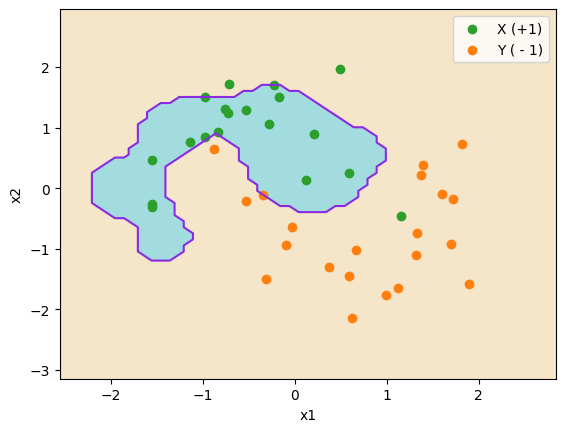

In [128]:
model = SVM_v3(X_train=X_train_3, Y_train=Y_train_3, X_test=X_test_3, Y_test=Y_test_3, C=0.5265, sigma_sq=0.11, kernel='rbf')
model.fit()
print('Accuracy (training):', model.evaluate(mode='training')*100, '%')
print('Accuracy (test):', model.evaluate(mode='test')*100, '%')
model.plot_decision_boundary(mode='test')

We observe that although the kernelized SVM achieved a good test accuracy of 92.5 \% which is higher than the standard SVM (87.5 \%) and the quadratic discriminator (85 \%), it is lower than the model with polynomial discrimination (97.5 \%), so polynomial discrimination is more adapted to dataset 3 in this case! 

We can also train a MLP model if we wish. We also obtained excellent test accuracy with MLP.

In [129]:
X_train, Y_train, X_test, Y_test = generate_dataset_mlp(X=X_train_3, Y=Y_train_3, X_tst=X_test_3, Y_tst=Y_test_3)

Cost after iteration 0: 1.0226400540278715
Cost after iteration 10000: 0.2725486935709382
Cost after iteration 20000: 0.27238407238695506
--------------- Accuracy (training) ---------------:
Accuracy: 0.9833333333333333
----------------- Accuracy (test) -----------------:
Accuracy: 0.95


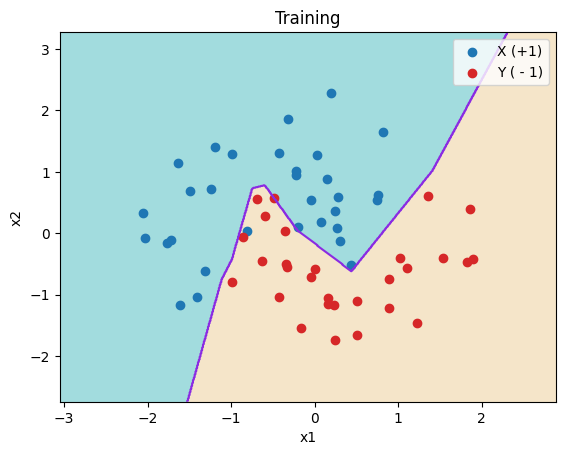

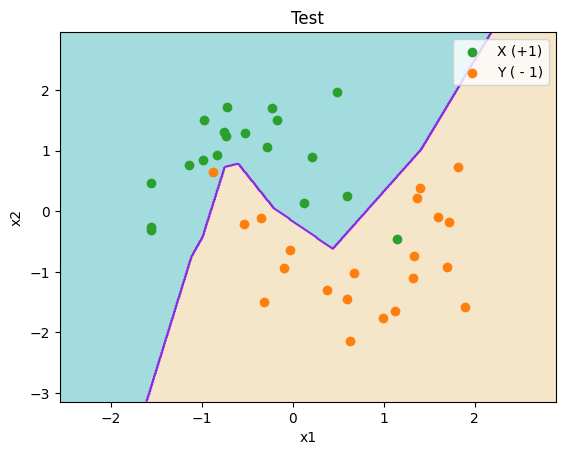

In [133]:
params = fit(X_train, Y_train, lambd = 0.7, display_cost=False)
print ("--------------- Accuracy (training) ---------------:")
predictions_train = predict(X_train, Y_train, params)
print ("----------------- Accuracy (test) -----------------:")
predictions_test = predict(X_test, Y_test, params)
plt.title("MLP Model without regularization")
axes = plt.gca()
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, Y_train, mode='training')
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_test, Y_test, mode='test')

#### Part 8

Dataset $4$ consists of three sets of points corresponding to three classes instead of two. We explain we would go about finding a classifier for this case. We try to find a classifier and plot the points and the classifiers and describe the results. 

We now turn our attention to dataset 4, which contains three sets of points, so the problem becomes a multiclass classification problem. Of course, all of the algorithms presented earlier are only suitable for binary classification problems (with the exception of MLP). Nonetheless, we can use the one-vs-all principal to train a classifier which separates X from Y and Z, another classifier which separates Y form X and Z, and the last one which separates Z from X and Y.

In [53]:
# Generate training data.
# X_4 vs. (Y4 & Z4)
X_train_a = X_4.copy()
Y_train_a = np.concatenate((Y_4, Z_4), axis=0)
# Y_4 vs. (X4 & Z4)
X_train_b = Y_4.copy()
Y_train_b = np.concatenate((X_4, Z_4), axis=0)
# Z_4 vs. (X4 & Y4)
X_train_c = Z_4.copy()
Y_train_c = np.concatenate((X_4, Y_4), axis=0)

We tune the hyperparameter $\gamma$ since we are using the support vector classifier approach.

In [50]:
svm_model = SVM(X_train=X_train_a, Y_train=Y_train_a)
_, _, high_acc, best_gammas = svm_model.tune(X_test=X_train_a, Y_test=Y_train_a, lower_b=0.01, upper_b=5, pts=20)
print(best_gammas)

[0.27263158 0.53526316 0.79789474 1.06052632 1.32315789 1.58578947
 1.84842105 2.11105263 2.37368421 2.63631579 2.89894737 3.16157895
 3.42421053 3.68684211 3.94947368 4.21210526 4.47473684 4.73736842
 5.        ]


Then we train the three classifiers.

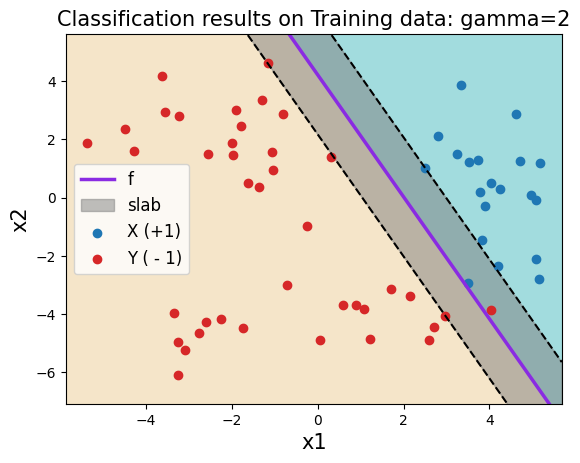

The Confusion Matrix: 
 [[39  1]
 [ 0 20]]
Accuracy = 98.33%


In [143]:
# define a SVM classifier, initialize with training data. 
svm_a = SVM(X_train=X_train_a, Y_train=Y_train_a)

# train the support vector classifier with a chosen value of gamma.
svm_a.fit(gamma=2)

# plot the training data points with the classifier f and the associated slab.
svm_a.plot_svm(X_train_a, Y_train_a, mode='Training')

pred_vals, true_vals = svm_a.predict_all(X_test=X_train_a, Y_test=Y_train_a)
confmat = svm_model.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=True)

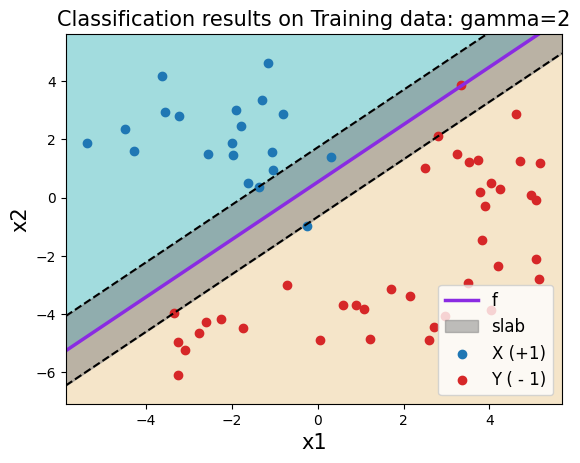

The Confusion Matrix: 
 [[39  1]
 [ 1 19]]
Accuracy = 96.67%


In [144]:
svm_b = SVM(X_train=X_train_b, Y_train=Y_train_b)
svm_b.fit(gamma=2)
# plot the training data points with the classifier f and the associated slab.
svm_b.plot_svm(X_train_b, Y_train_b, mode='Training')

pred_vals, true_vals = svm_b.predict_all(X_test=X_train_b, Y_test=Y_train_b)
confmat = svm_model.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=True)

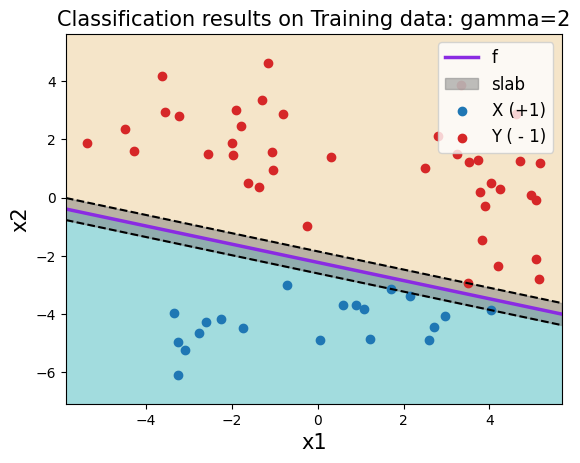

The Confusion Matrix: 
 [[40  0]
 [ 0 20]]
Accuracy = 100.00%


In [145]:
svm_c = SVM(X_train=X_train_c, Y_train=Y_train_c)
svm_c.fit(gamma=2)
# plot the training data points with the classifier f and the associated slab.
svm_c.plot_svm(X_train_c, Y_train_c, mode='Training')

pred_vals, true_vals = svm_c.predict_all(X_test=X_train_c, Y_test=Y_train_c)
confmat = svm_model.compute_confusion_matrix(true=true_vals, pred=pred_vals, show=True)

To predict which class a point belongs to, it suffices to calculate the highest probability among the results of three classifiers. We can just use the simple function defined below.

In [304]:
def predict_mult(x):
    prob_a = svm_a.predict_net(x)
    prob_b = svm_b.predict_net(x)
    prob_c = svm_c.predict_net(x)
    return np.argmax([prob_a, prob_b, prob_c])

Let us first plot the three decision boundaries of the three classifiers we just trained.

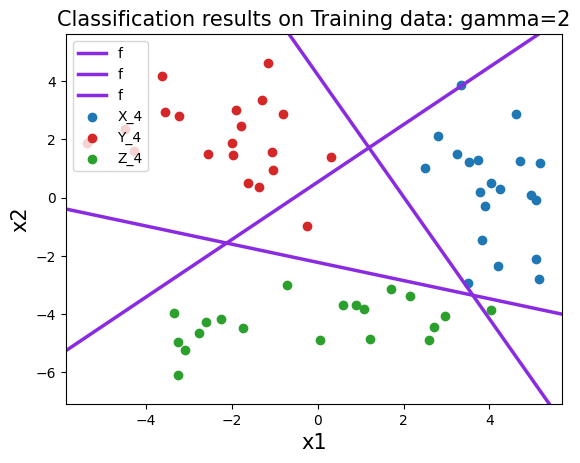

In [146]:
X = np.concatenate((X_4, Y_train_a),axis=0)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

svm_a.plot_svm(set_1=X_train_a, set_2=Y_train_a, shade=False, deactivate_plot=True, slab=False, data_pts=False)
svm_b.plot_svm(set_1=X_train_b, set_2=Y_train_b, shade=False, deactivate_plot=True, slab=False, data_pts=False)
svm_c.plot_svm(set_1=X_train_c, set_2=Y_train_c, shade=False, deactivate_plot=True, slab=False, data_pts=False)

plt.scatter(X_4[:,0], X_4[:,1], color='tab:blue', label='X_4')
plt.scatter(Y_4[:,0], Y_4[:,1], color='tab:red', label='Y_4')
plt.scatter(Z_4[:,0], Z_4[:,1], color='tab:green', label='Z_4')
plt.legend(loc='best')

Let us then visualize the confusion matrix.

In [257]:
# Create an empty array to store the predicted class labels
y_pred = np.empty(X.shape[0], dtype=int)

# Loop over all points in X_test and predict their class labels using predict_mult
for i, x in enumerate(X):
    y_pred[i] = predict_mult(x)

# Get the true labels.
y_true = np.array([0]*X_4.shape[0] + [1]*Y_4.shape[0] + [2]*Z_4.shape[0])

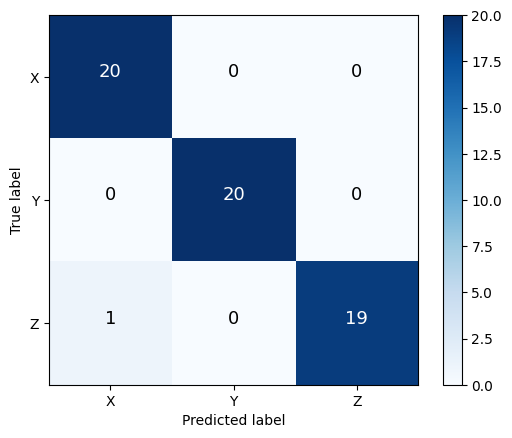

Accuracy:  98.33 %


In [261]:
def confusionMatrix(y_pred, y_true):
    # Initialize a confusion matrix.
    confusion_matrix = np.zeros((3, 3))
    # Fill the confusion matrix
    for i in range(len(y_true)):
        true_label = y_true[i]
        pred_label = y_pred[i]
        confusion_matrix[true_label][pred_label] += 1
    # Plot the confusion matrix
    plt.imshow(confusion_matrix, cmap='Blues')
    plt.colorbar()
    # Add ticks and labels
    classes = ['X', 'Y', 'Z']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    # Add values to the plot
    thresh = confusion_matrix.max() / 2.
    for i in range(3):
        for j in range(3):
            plt.text(j, i, int(confusion_matrix[i, j]),
                    horizontalalignment="center",
                    color="white" if confusion_matrix[i, j] > thresh else "black",
                    fontsize=13)
    plt.show()

    accuracy = confusion_matrix.trace() / confusion_matrix.sum()
    return accuracy 

accuracy = confusionMatrix(y_pred, y_true)
print('Accuracy: ', np.round(accuracy * 100, 2),'%')

To see the boundaries using the three trained classifiers, we can predict the class of every single point on the grid to see what class all possible points will be classified into.

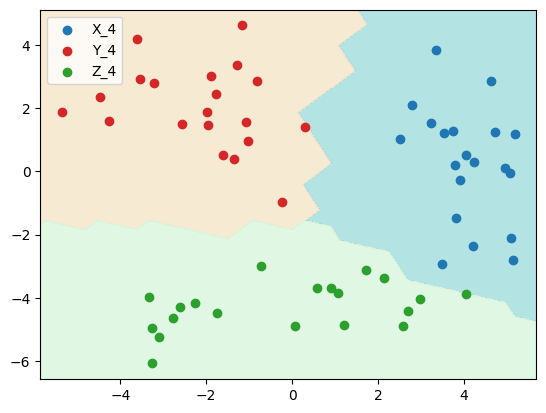

In [256]:
from matplotlib.colors import ListedColormap
light_cmap = ListedColormap(['#A2DCDE', '#F5E5C9', '#D7F5DD'])
# Concatenate all three sets.
YZ = np.concatenate((Y_4, Z_4), axis=0)
XYZ = np.concatenate((X_4, YZ), axis=0)
x1_min, x1_max = XYZ[:, 0].min() - 0.5, XYZ[:, 0].max() + 0.5
x2_min, x2_max = XYZ[:, 1].min() - 0.5, XYZ[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))

# Predict the class for each point in the grid
Z = np.zeros(xx1.shape)
for i in range(xx1.shape[0]):
    for j in range(xx1.shape[1]):
        point = np.array([xx1[i][j], xx2[i][j]])
        Z[i][j] = predict_mult(point)

# Plot the decision boundaries
plt.contourf(xx1, xx2, Z, cmap=light_cmap, alpha=0.8)

plt.scatter(X_4[:,0], X_4[:,1], color='tab:blue', label='X_4')
plt.scatter(Y_4[:,0], Y_4[:,1], color='tab:red', label='Y_4')
plt.scatter(Z_4[:,0], Z_4[:,1], color='tab:green', label='Z_4')
plt.legend(loc='best')
plt.show()

The model with SVM classifier cannot guarantee 100\% accuracy since it is a linear classifier, so is logistic modeling. In addition, we observe that the boundaries are not smooth. We already studied polynomial discrimination earlier, so we can apply it instead. 

Let us first train three classifiers based on the one-vs-all principal.

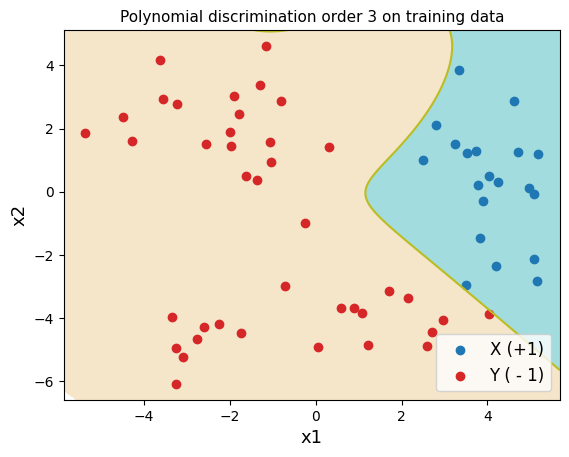

In [262]:
# X vs (Y & Z)
poly_a = poly_discrim(X_train=X_train_a, Y_train=Y_train_a, order=3) 
poly_a.fit()
poly_a.plot_decision_boundary(X=X_train_a.T, Y=Y_train_a.T) 

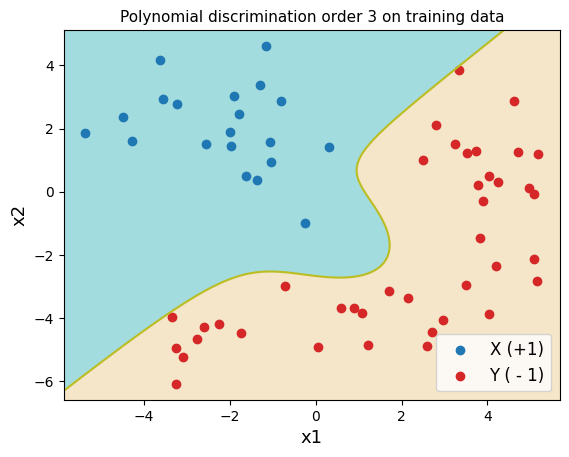

In [263]:
# Y vs (X & Z)
poly_b = poly_discrim(X_train=X_train_b, Y_train=Y_train_b, order=3) 
poly_b.fit()
poly_b.plot_decision_boundary(X=X_train_b.T, Y=Y_train_b.T) 

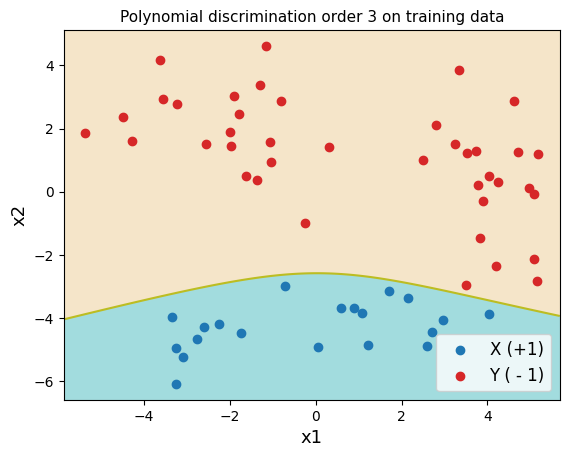

In [264]:
# Z vs (X & Y)
poly_c = poly_discrim(X_train=X_train_c, Y_train=Y_train_c, order=3) 
poly_c.fit()
poly_c.plot_decision_boundary(X=X_train_c.T, Y=Y_train_c.T) 

Of course we use the same way to predict the class of a point based on the highest probability:

In [266]:
def predict_poly(x):
    prob_a = poly_a.predict_net(x)
    prob_b = poly_b.predict_net(x)
    prob_c = poly_c.predict_net(x)
    return np.argmax([prob_a, prob_b, prob_c])

We can now visualize all three decision boundaries.

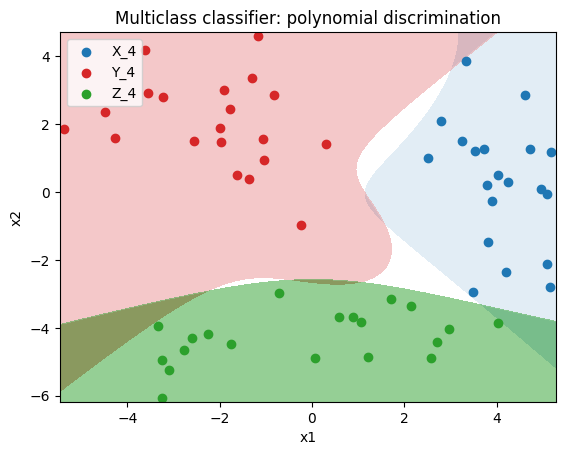

In [265]:
from matplotlib.colors import ListedColormap
# Concatenate all three sets.
YZ = np.concatenate((Y_4, Z_4), axis=0)
XYZ = np.concatenate((X_4, YZ), axis=0)
# Then use the combined set to set axis range.
x1_min, x1_max = XYZ[:, 0].min() - 0.1, XYZ[:, 0].max() + 0.1
x2_min, x2_max = XYZ[:, 1].min() - 0.1, XYZ[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 2000), np.linspace(x2_min, x2_max, 2000))
# Get the decision boundaries.
zz_a = -poly_a.get_decision_boundary(x1=xx1.ravel(), x2=xx2.ravel())
zz_a = zz_a.reshape(xx1.shape)
zz_b = -poly_b.get_decision_boundary(x1=xx1.ravel(), x2=xx2.ravel())
zz_b = zz_b.reshape(xx1.shape)
zz_c = -poly_c.get_decision_boundary(x1=xx1.ravel(), x2=xx2.ravel())
zz_c = zz_c.reshape(xx1.shape)
# Plot all three decision boundaries
plt.contourf(xx1,xx2,zz_a, levels=[-100,0,100], alpha=0.5, cmap=ListedColormap(['white', 'tab:blue']))
plt.contourf(xx1,xx2,zz_b, levels=[-100,0,100], alpha=0.5, cmap=ListedColormap(['white', 'tab:red']))
plt.contourf(xx1,xx2,zz_c, levels=[-100,0,100], alpha=0.5, cmap=ListedColormap(['white', 'tab:green']))
plt.scatter(X_4[:, 0], X_4[:, 1], color='tab:blue', label='X_4')
plt.scatter(Y_4[:, 0], Y_4[:, 1], color='tab:red', label='Y_4')
plt.scatter(Z_4[:, 0], Z_4[:, 1], color='tab:green', label='Z_4')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Multiclass classifier: polynomial discrimination')
plt.legend(loc='best')
plt.show()

In [269]:
# Create an empty array to store the predicted class labels
y_pred = np.empty(X.shape[0], dtype=int)

# Loop over all points in X_test and predict their class labels using predict_mult
for i, x in enumerate(X):
    y_pred[i] = predict_poly(x)

# Get the true labels.
y_true = np.array([0]*X_4.shape[0] + [1]*Y_4.shape[0] + [2]*Z_4.shape[0])

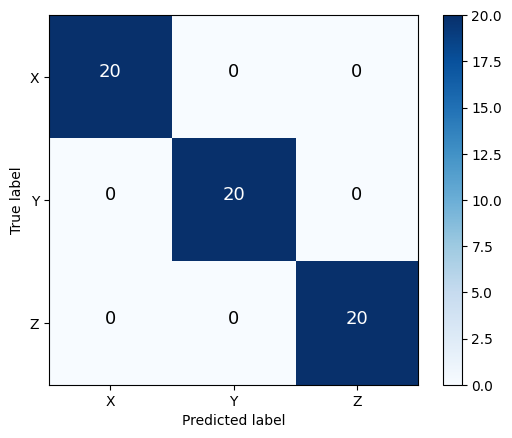

Accuracy:  100.0 %


In [270]:
accuracy_poly = confusionMatrix(y_pred, y_true)
print('Accuracy: ', np.round(accuracy_poly * 100, 2),'%')

Of course, the accuracy is 100 \% as we have already seen.

To see the boundaries using the three trained classifiers, we can predict the class of every single point on the grid to see what class all possible points will be classified into.

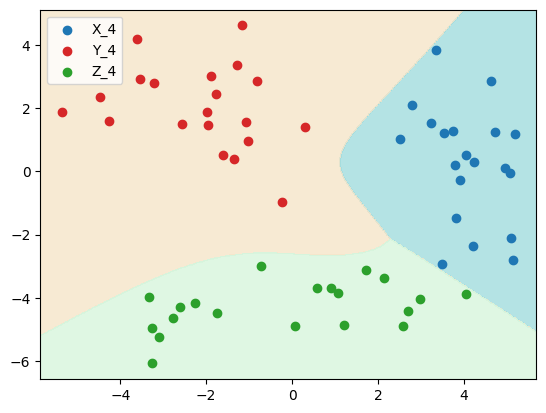

In [268]:
from matplotlib.colors import ListedColormap
light_cmap = ListedColormap(['#A2DCDE', '#F5E5C9', '#D7F5DD'])
x1_min, x1_max = XYZ[:, 0].min() - 0.5, XYZ[:, 0].max() + 0.5
x2_min, x2_max = XYZ[:, 1].min() - 0.5, XYZ[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))

# Predict the class for each point in the grid
Z = np.zeros(xx1.shape)
for i in range(xx1.shape[0]):
    for j in range(xx1.shape[1]):
        point = np.array([xx1[i][j], xx2[i][j]])
        Z[i][j] = predict_poly(point)

# Plot the decision boundaries
plt.contourf(xx1, xx2, Z, cmap=light_cmap, alpha=0.8)

plt.scatter(X_4[:,0], X_4[:,1], color='tab:blue', label='X_4')
plt.scatter(Y_4[:,0], Y_4[:,1], color='tab:red', label='Y_4')
plt.scatter(Z_4[:,0], Z_4[:,1], color='tab:green', label='Z_4')
plt.legend(loc='best')
plt.show()

As we can see, we have successfully trained a multiclass classifier which can perfectly separate three sets.

------------------------------------------------------------------------------------------------------------------------

**Extra**: We know that we do not have a test set in this case. Although not explicitly asked in the exercise, we can partition 30% of the training set into a validation set to see how the model is actually performing on unseen data. For simplicity, we can just get the last 6 points from each set.

In [303]:
# Split the data and labels into three sets
y_1 = np.array([0]*X_4.shape[0])  # label
set1_train = X_4[:14]             # X training data 
set1_test = X_4[14:20]            # test data 
set1_train_labels = y_1[:14]
set1_test_labels = y_1[14:20]

y_2 = np.array([1]*Y_4.shape[0])
set2_train = Y_4[:14]
set2_test = Y_4[14:]
set2_train_labels = y_2[:14]
set2_test_labels = y_2[14:]

y_3 = np.array([2]*Z_4.shape[0])
set3_train = Z_4[:14]
set3_test = Z_4[14:]
set3_train_labels = y_3[:14]
set3_test_labels = y_3[14:]

# Get the ground truth labels of training data.
y_true_test = np.concatenate((set1_test_labels, set2_test_labels, set3_test_labels))

# Get the training data for one-vs-all classifiers.
X_train_a = set1_train.copy()
Y_train_a = np.concatenate((set2_train, set3_train), axis=0)

X_train_b = set2_train.copy()
Y_train_b = np.concatenate((set1_train, set3_train), axis=0)

X_train_c = set3_train.copy()
Y_train_c = np.concatenate((set1_train, set2_train), axis=0)


In [279]:
# Train on training data
poly_a = poly_discrim(X_train=X_train_a, Y_train=Y_train_a, order=3) 
poly_a.fit()
poly_b = poly_discrim(X_train=X_train_b, Y_train=Y_train_b, order=3) 
poly_b.fit()
poly_c = poly_discrim(X_train=X_train_c, Y_train=Y_train_c, order=3) 
poly_c.fit()

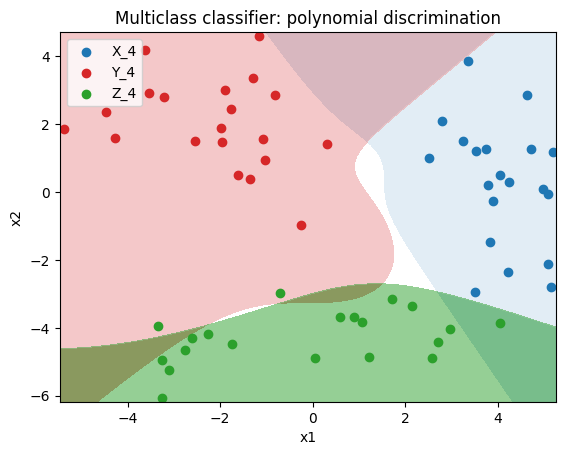

In [280]:
from matplotlib.colors import ListedColormap
# Concatenate all three sets.
YZ = np.concatenate((set2_train, set3_train), axis=0)
XYZ = np.concatenate((set1_train, YZ), axis=0)
# Then use the combined set to set axis range.
x1_min, x1_max = XYZ[:, 0].min() - 0.1, XYZ[:, 0].max() + 0.1
x2_min, x2_max = XYZ[:, 1].min() - 0.1, XYZ[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 2000), np.linspace(x2_min, x2_max, 2000))
# Get the decision boundaries.
zz_a = -poly_a.get_decision_boundary(x1=xx1.ravel(), x2=xx2.ravel())
zz_a = zz_a.reshape(xx1.shape)
zz_b = -poly_b.get_decision_boundary(x1=xx1.ravel(), x2=xx2.ravel())
zz_b = zz_b.reshape(xx1.shape)
zz_c = -poly_c.get_decision_boundary(x1=xx1.ravel(), x2=xx2.ravel())
zz_c = zz_c.reshape(xx1.shape)
# Plot all three decision boundaries
plt.contourf(xx1,xx2,zz_a, levels=[-100,0,100], alpha=0.5, cmap=ListedColormap(['white', 'tab:blue']))
plt.contourf(xx1,xx2,zz_b, levels=[-100,0,100], alpha=0.5, cmap=ListedColormap(['white', 'tab:red']))
plt.contourf(xx1,xx2,zz_c, levels=[-100,0,100], alpha=0.5, cmap=ListedColormap(['white', 'tab:green']))
plt.scatter(X_4[:, 0], X_4[:, 1], color='tab:blue', label='X_4')
plt.scatter(Y_4[:, 0], Y_4[:, 1], color='tab:red', label='Y_4')
plt.scatter(Z_4[:, 0], Z_4[:, 1], color='tab:green', label='Z_4')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Multiclass classifier: polynomial discrimination')
plt.legend(loc='best')
plt.show()

In [281]:
def predict_poly(X):
    # X: a set of points to be tested (each row represents a point)
    # Returns: an array of predicted labels for each point in X
    
    # Initialize an empty array to store the predicted labels
    y_pred = np.zeros(X.shape[0])
    
    # Loop over all points in X and predict the label for each point
    for i in range(X.shape[0]):
        x = X[i]
        prob_a = poly_a.predict_net(x)
        prob_b = poly_b.predict_net(x)
        prob_c = poly_c.predict_net(x)
        y_pred[i] = np.argmax([prob_a, prob_b, prob_c])
        
    return y_pred

In [299]:
# Get prediction results based on TEST data.
set1_test_pred = (predict_poly(set1_test)).astype(int)
set2_test_pred = (predict_poly(set2_test)).astype(int)
set3_test_pred = (predict_poly(set3_test)).astype(int)
y_pred_test = np.concatenate((set1_test_pred, set2_test_pred, set3_test_pred))

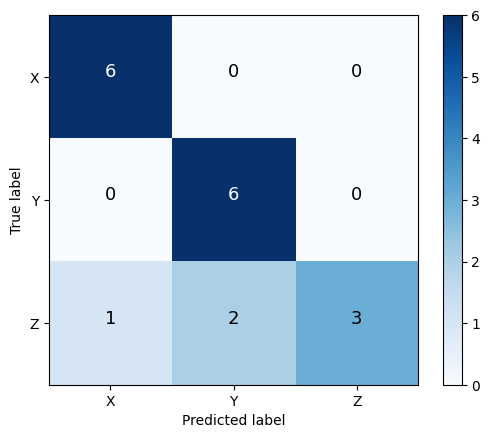

Accuracy:  83.33 %


In [302]:
accuracy_test = confusionMatrix(y_pred=y_pred_test, y_true=y_true_test)
print('Accuracy: ', np.round(accuracy_test * 100, 2),'%')

Although we only have limited training and test data, the model still achieved acceptable test accuracy. Obviously, if we had more data, the model would have been much better.

------------------------------------------------------------------------------------------------------------------------

As mentioned earlier, we can use MLP for classification tasks. Unlike some other classifiers we've trained before, MLP naturally supports multiclass classification. In this case, the output layer would have 3 neurons, each corresponding to a class. The softmax activation function squashes the output of each neuron into a probability distribution over the classes. The decision is based on the highest output probability. 

Softmax activation: 
$$\tilde{y}_{k} = \frac{e^{W_{k}x_{k}+b}}{\sum_{i} e^{W_{k}x_{k}+b}}, \qquad y_{k} \in  \lbrace 0,1 \rbrace \tag{12}$$ 
Where $\tilde{y} \in \mathbb{R}$ is the prediction and $y$ is the ground truth label.

Loss function (Categorical cross entropy):
$$l = -y_{k} \log(\tilde{y_{k}}) \tag{13}$$

(In fact we use one-hot encoding to encode the target variable when using the categorical cross-entropy to represent the true probability distribution as a vector of zero's and one's and it makes the neural network more efficient.)


Of course we can build the MLP from scratch like before, by changing the loss function and the network architecture. Since it is already out of scope of this course, let us just import **Keras**, a deep learning framework (of course we can also use **Torch**) to classify the 3 sets **directly** and test if the results are what we expected. 

In [54]:
from keras.utils import to_categorical

def generate_dataset_mlp_3cls(X, Y, Z):
    # Create the training data X 
    X_train = np.concatenate((X.T, Y.T, Z.T), axis=1)
    # Generate the corresponding labels Y 
    Y_train = np.concatenate((np.zeros(X.T.shape[1]), np.ones(Y.T.shape[1]), 2*np.ones(Z.T.shape[1])))
    Y_train = to_categorical(Y_train, num_classes=3)
    return X_train, Y_train

X_train, Y_train = generate_dataset_mlp_3cls(X=X_4, Y=Y_4, Z=Z_4)

2023-03-24 16:48:05.743027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[0], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train.T, Y_train, epochs=100, batch_size=32)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 1.2293 - accuracy: 0.1833
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 1.0824 - accuracy: 0.4167
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9787 - accuracy: 0.6500
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9001 - accuracy: 0.8333
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8275 - accuracy: 0.9500
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7567 - accuracy: 0.9667
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.9500
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.9500
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.5633 - accuracy: 0.9500
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.9500
Epoch 11/100
2/2 [===========

313/313 [==============================] - 0s 519us/step


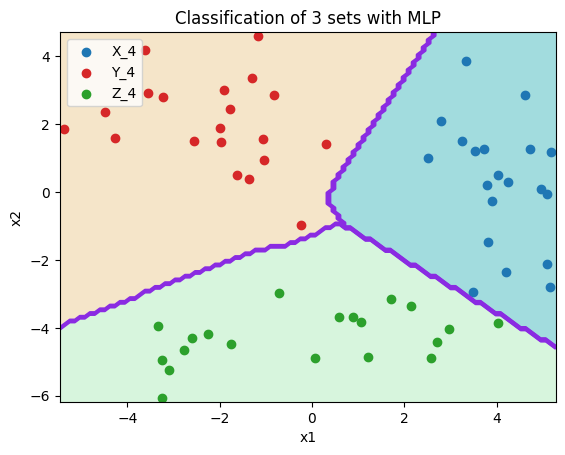

In [93]:
from matplotlib.colors import ListedColormap
light_cmap = ListedColormap(['#A2DCDE', '#F5E5C9', '#D7F5DD'])
# Create a meshgrid of points that span the range of your data
x_min, x_max = X_train.T[:, 0].min() - 0.1, X_train.T[:, 0].max() + 0.1
y_min, y_max = X_train.T[:, 1].min() - 0.1, X_train.T[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Use the trained model to make predictions for each point on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
# Plot the predictions as a contour plot or a scatter plot with different colors for each class
plt.contourf(xx, yy, Z, cmap=light_cmap)
plt.contour(xx, yy, Z, colors='blueviolet')
#plt.scatter(X_train.T[:, 0], X_train.T[:, 1], c=np.argmax(Y_train, axis=1), s=50)
y = np.argmax(Y_train, axis=1)
X = X_train.T[y == 0]
Y = X_train.T[y == 1]
Z = X_train.T[y == 2]
plt.title('Classification of 3 sets with MLP')
plt.scatter(X[:,0], X[:,1], color='tab:blue', label='X_4')
plt.scatter(Y[:,0], Y[:,1], color='tab:red', label='Y_4')
plt.scatter(Z[:,0], Z[:,1], color='tab:green', label='Z_4')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Of course, MLP can directly separate the three sets with 100\% accuracy on the training data, if we don't care about the test accuracy.

#### Bibliography

$[1]$ Stephen Boyd and Lieven Vandenberghe. Convex optimization. Cambridge university press.


$[2]$ Steven Diamond and Stephen Boyd. “CVXPY: A Python-embedded modeling language for
convex optimization”. In: Journal of Machine Learning Research 17.83 (2016), pp. 1–5.

$[3]$ Vandenberghe, L. (n.d.). Polynomial discrimination [CVXR Examples]. Adapted by Skaf, J. Retrieved from http://web.cvxr.com/cvx/examples/cvxbook/Ch08_geometric_probs/html/poly3_discr.html#plots

$[4]$ Ng, A. Deep Learning Specialization [Online course]. Coursera. https://www.coursera.org/specializations/deep-learning
